# General Imports

In [23]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3
import re
import math
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon, Patch
import matplotlib.image as mpimg
from matplotlib.ticker import ScalarFormatter
import matplotlib.dates as mdates

# Colors and Text Size

In [24]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

color = tableau20

plt.rcParams.update({'font.size': 26})

# Importing Data

In [25]:
# allFiles = glob.glob(os.path.join("..","interpolatedData","*","*.csv"))

# df = {}
# for x in allFiles:
#     name = '_'.join(x.split(os.path.sep)[1:]).split('.')[0]
#     df[name] = pd.read_csv(x,parse_dates=[0])
mergedDataFilesDp03 = glob.glob(os.path.join("..","..","mergedData","Dp03","*.csv"))
mergedDataDp03 = {(route.split("Data_")[1].split(".")[0]):pd.read_csv(route,parse_dates=[0]) for route in mergedDataFilesDp03}
mergedDataFilesPM25 = glob.glob(os.path.join("..","..","mergedData","PM25_Std","*.csv"))
mergedDataPM25 = {(route.split("Data_")[1].split(".")[0]):pd.read_csv(route,parse_dates=[0]) for route in mergedDataFilesPM25}

In [26]:
mergedDataDp03['4-13-22'].max()
newdp03frame = mergedDataDp03['4-13-22'].set_index("Date_Time").rolling(60*5, center = True).mean().dropna()
newdp03frame.max()

A16          171.265000
A7            73.989000
A8            45.442667
Average       57.088333
Variance    5297.458000
dtype: float64

In [27]:
dp03frame = mergedDataDp03['4-13-22'].set_index("Date_Time").rolling(60*5, center = True).mean().dropna()
sensors = ['A7','A8','A16']
for sensor in sensors:
    print(dp03frame[sensor])

Date_Time
2022-04-13 08:02:30    0.0
2022-04-13 08:02:31    0.0
2022-04-13 08:02:32    0.0
2022-04-13 08:02:33    0.0
2022-04-13 08:02:34    0.0
                      ... 
2022-04-13 19:57:17    0.0
2022-04-13 19:57:18    0.0
2022-04-13 19:57:19    0.0
2022-04-13 19:57:20    0.0
2022-04-13 19:57:21    0.0
Name: A7, Length: 42892, dtype: float64
Date_Time
2022-04-13 08:02:30    0.0
2022-04-13 08:02:31    0.0
2022-04-13 08:02:32    0.0
2022-04-13 08:02:33    0.0
2022-04-13 08:02:34    0.0
                      ... 
2022-04-13 19:57:17    0.0
2022-04-13 19:57:18    0.0
2022-04-13 19:57:19    0.0
2022-04-13 19:57:20    0.0
2022-04-13 19:57:21    0.0
Name: A8, Length: 42892, dtype: float64
Date_Time
2022-04-13 08:02:30      0.000
2022-04-13 08:02:31      0.000
2022-04-13 08:02:32      0.000
2022-04-13 08:02:33      0.000
2022-04-13 08:02:34      0.000
                        ...   
2022-04-13 19:57:17    128.675
2022-04-13 19:57:18    128.820
2022-04-13 19:57:19    128.980
2022-04-13 19:57:

# Graphing all sensor data for Dp>0.3 and PM2.5

C:\Users\RobertRochlin\AppData\Local\Temp\ipykernel_27756\3309804856.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig1 = plt.figure(figsize=(36,30))


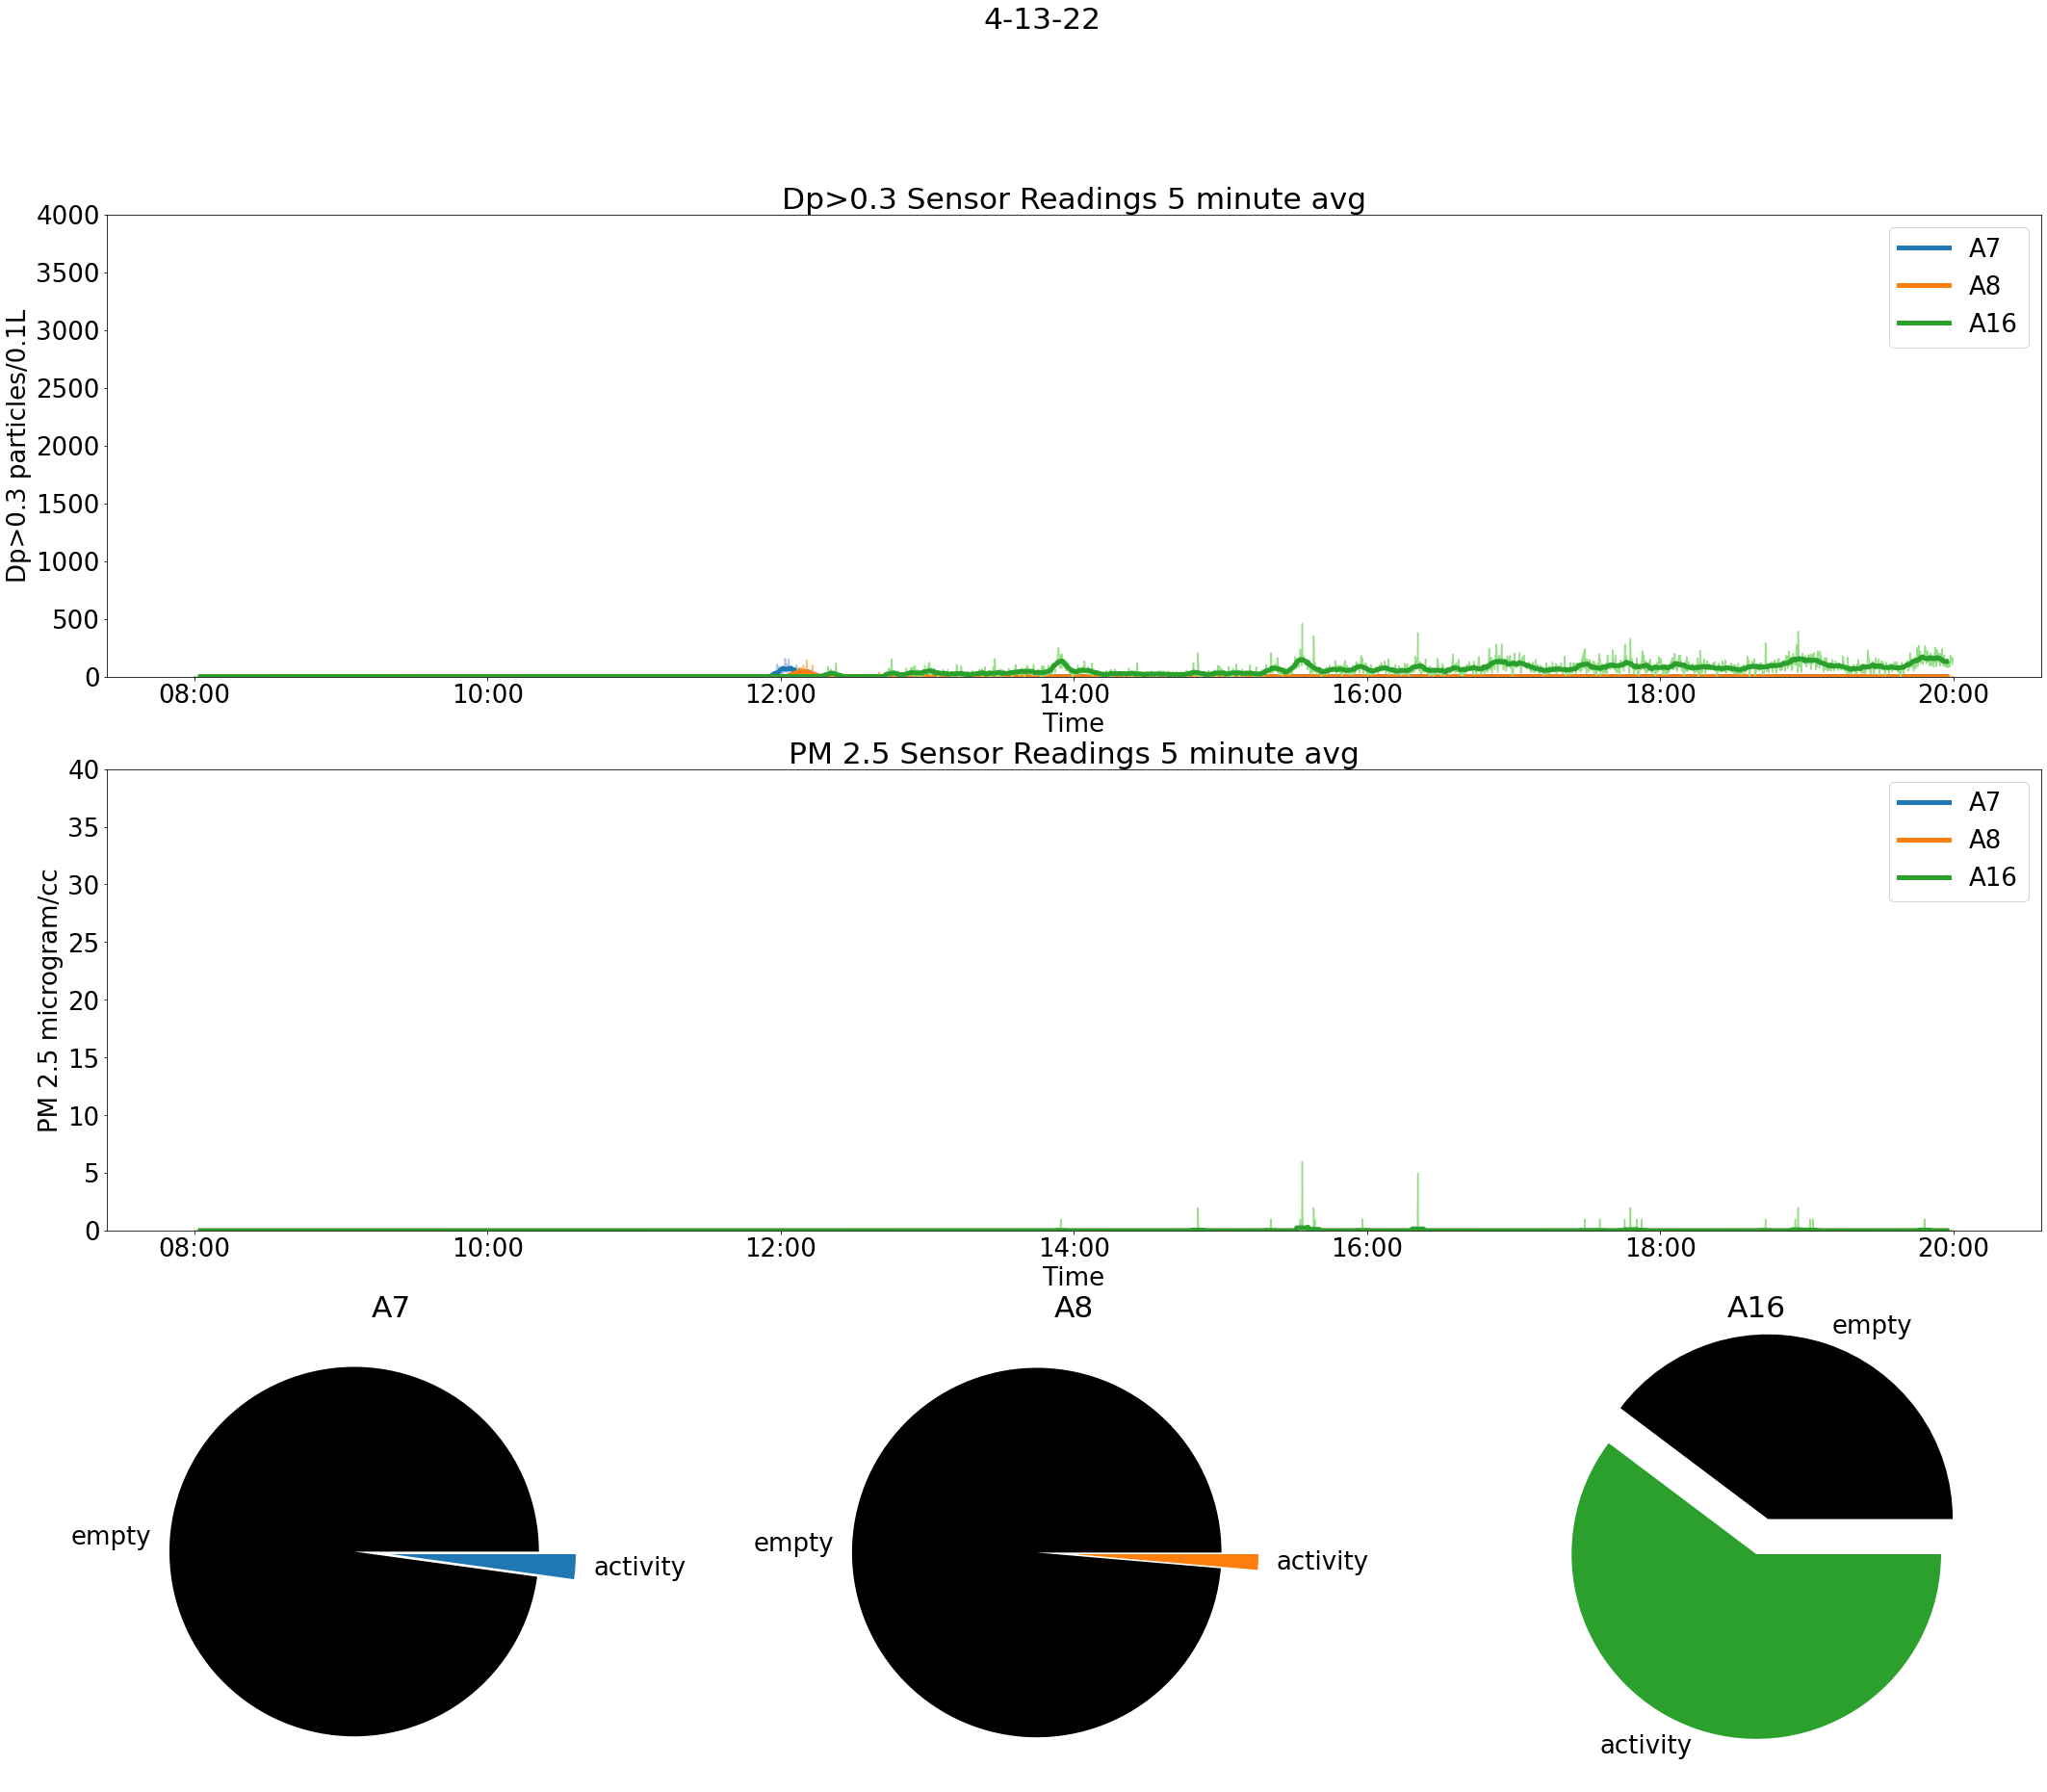

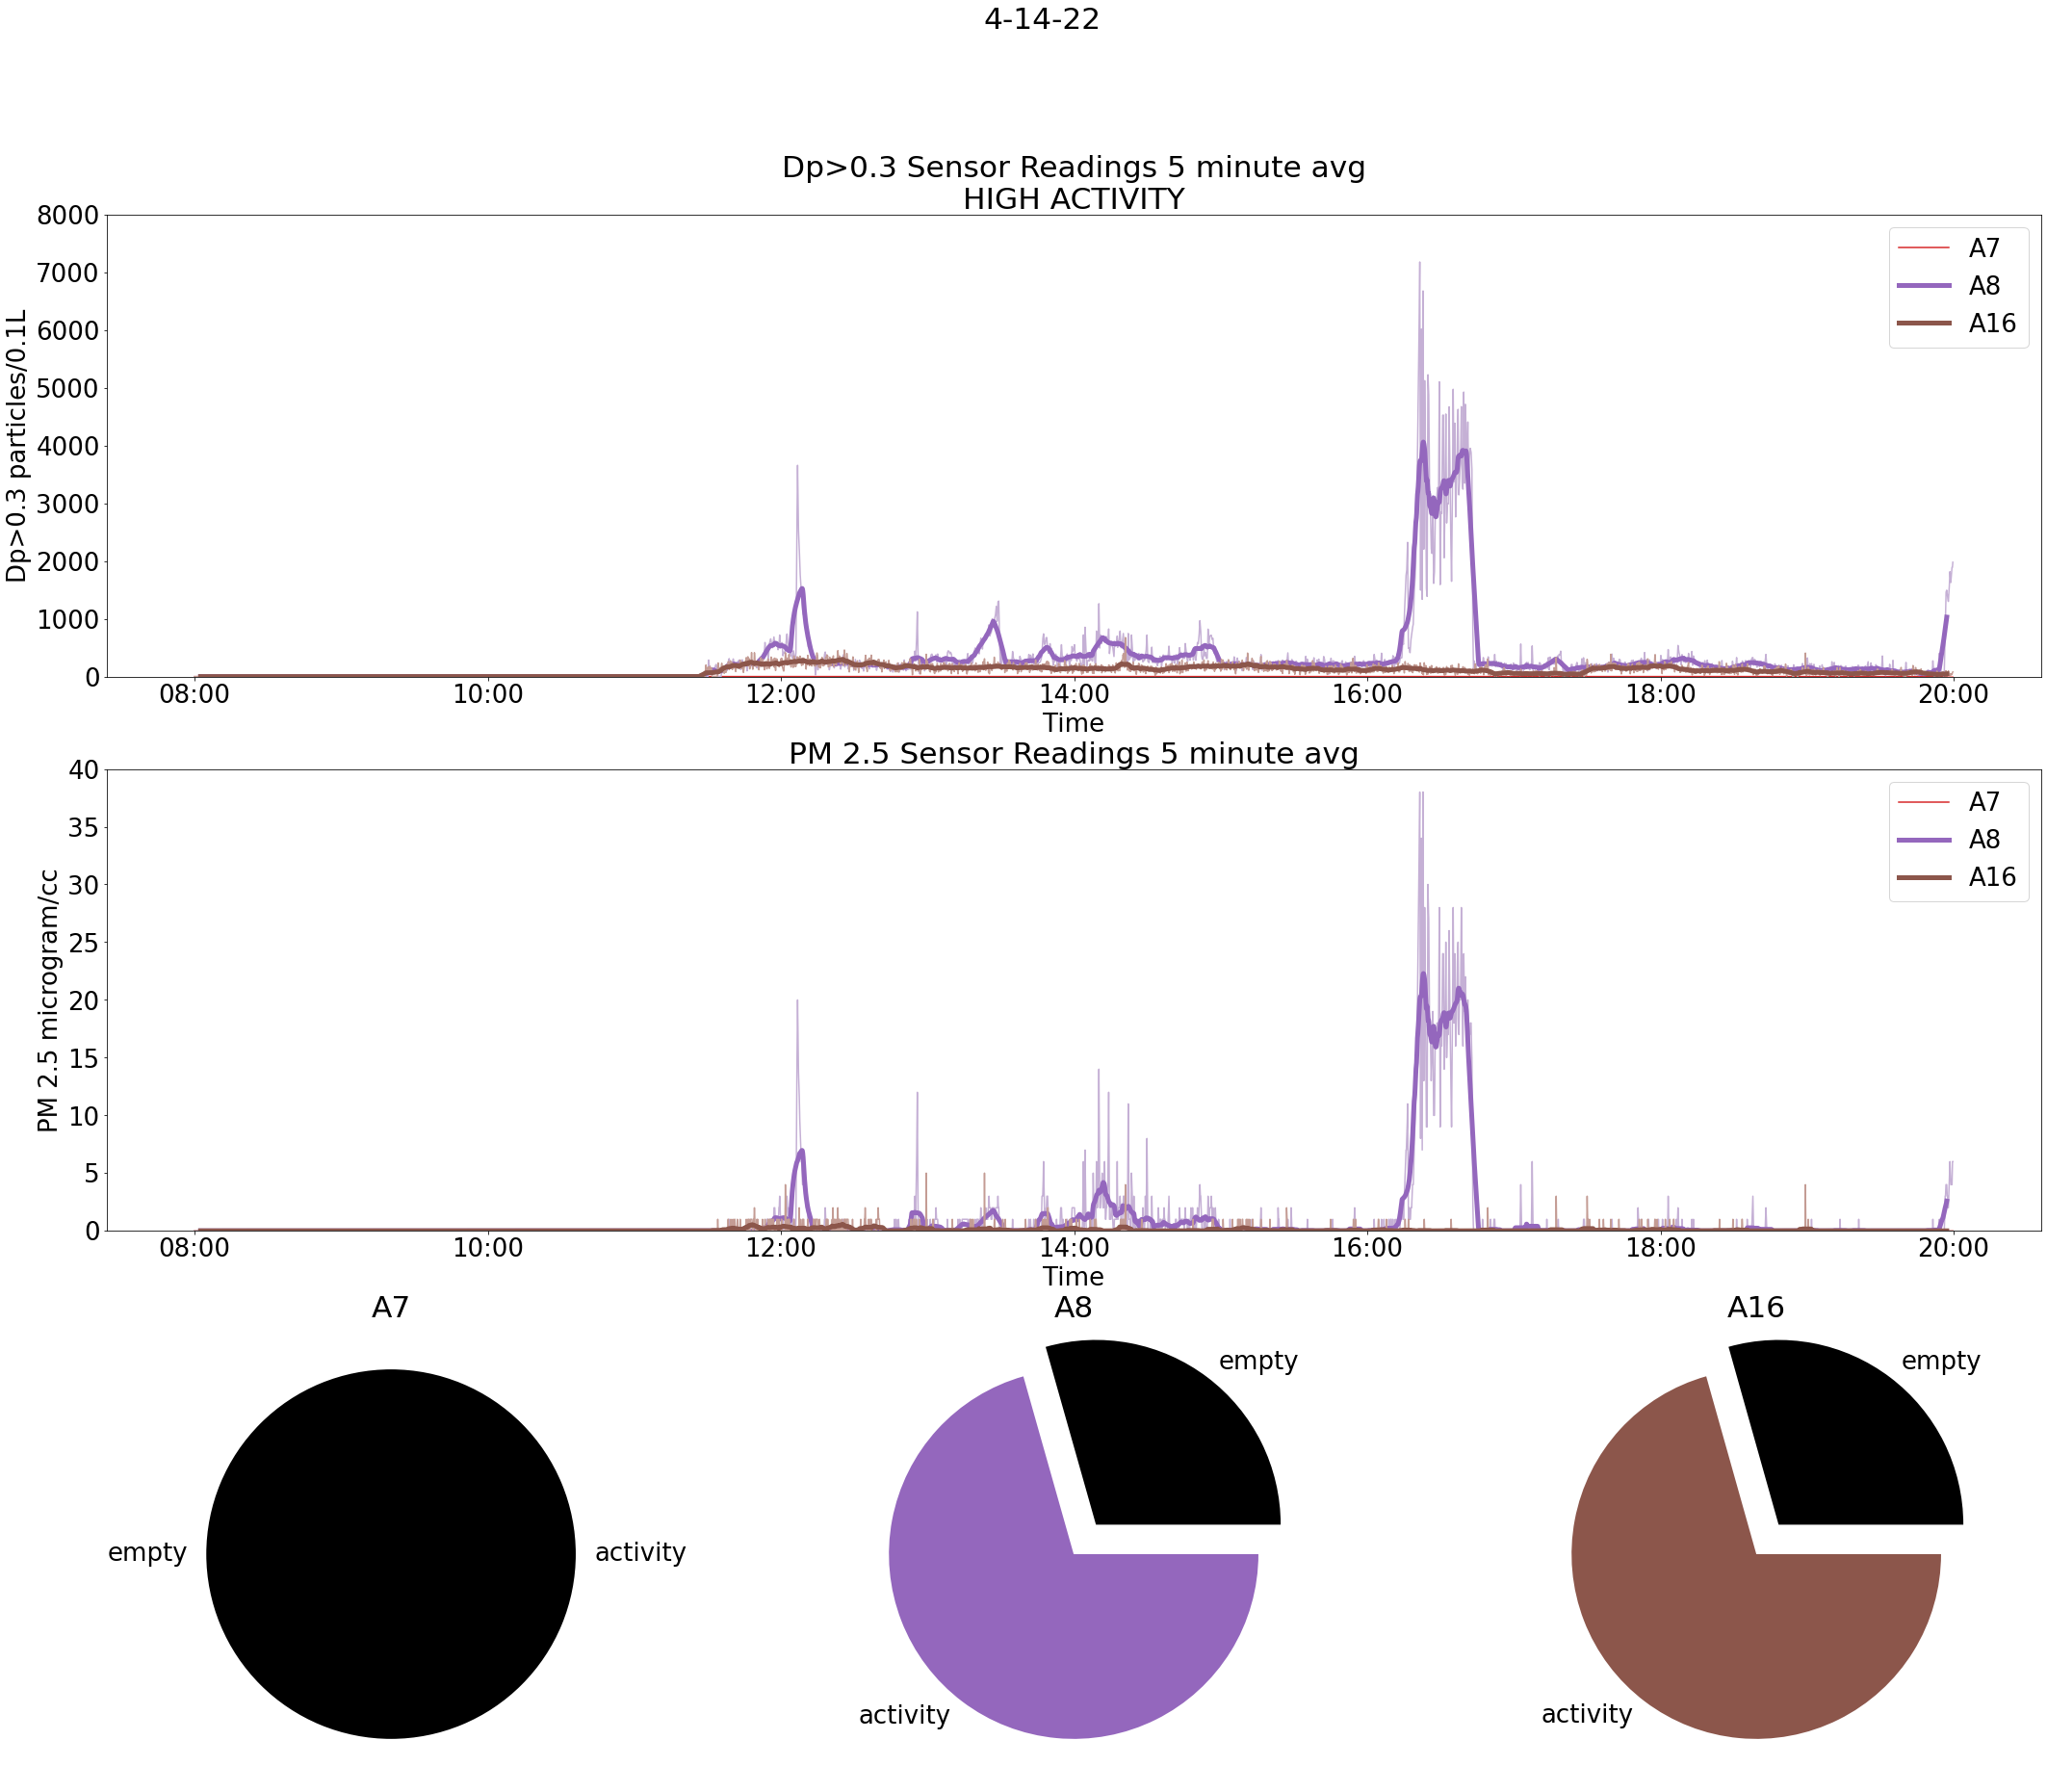

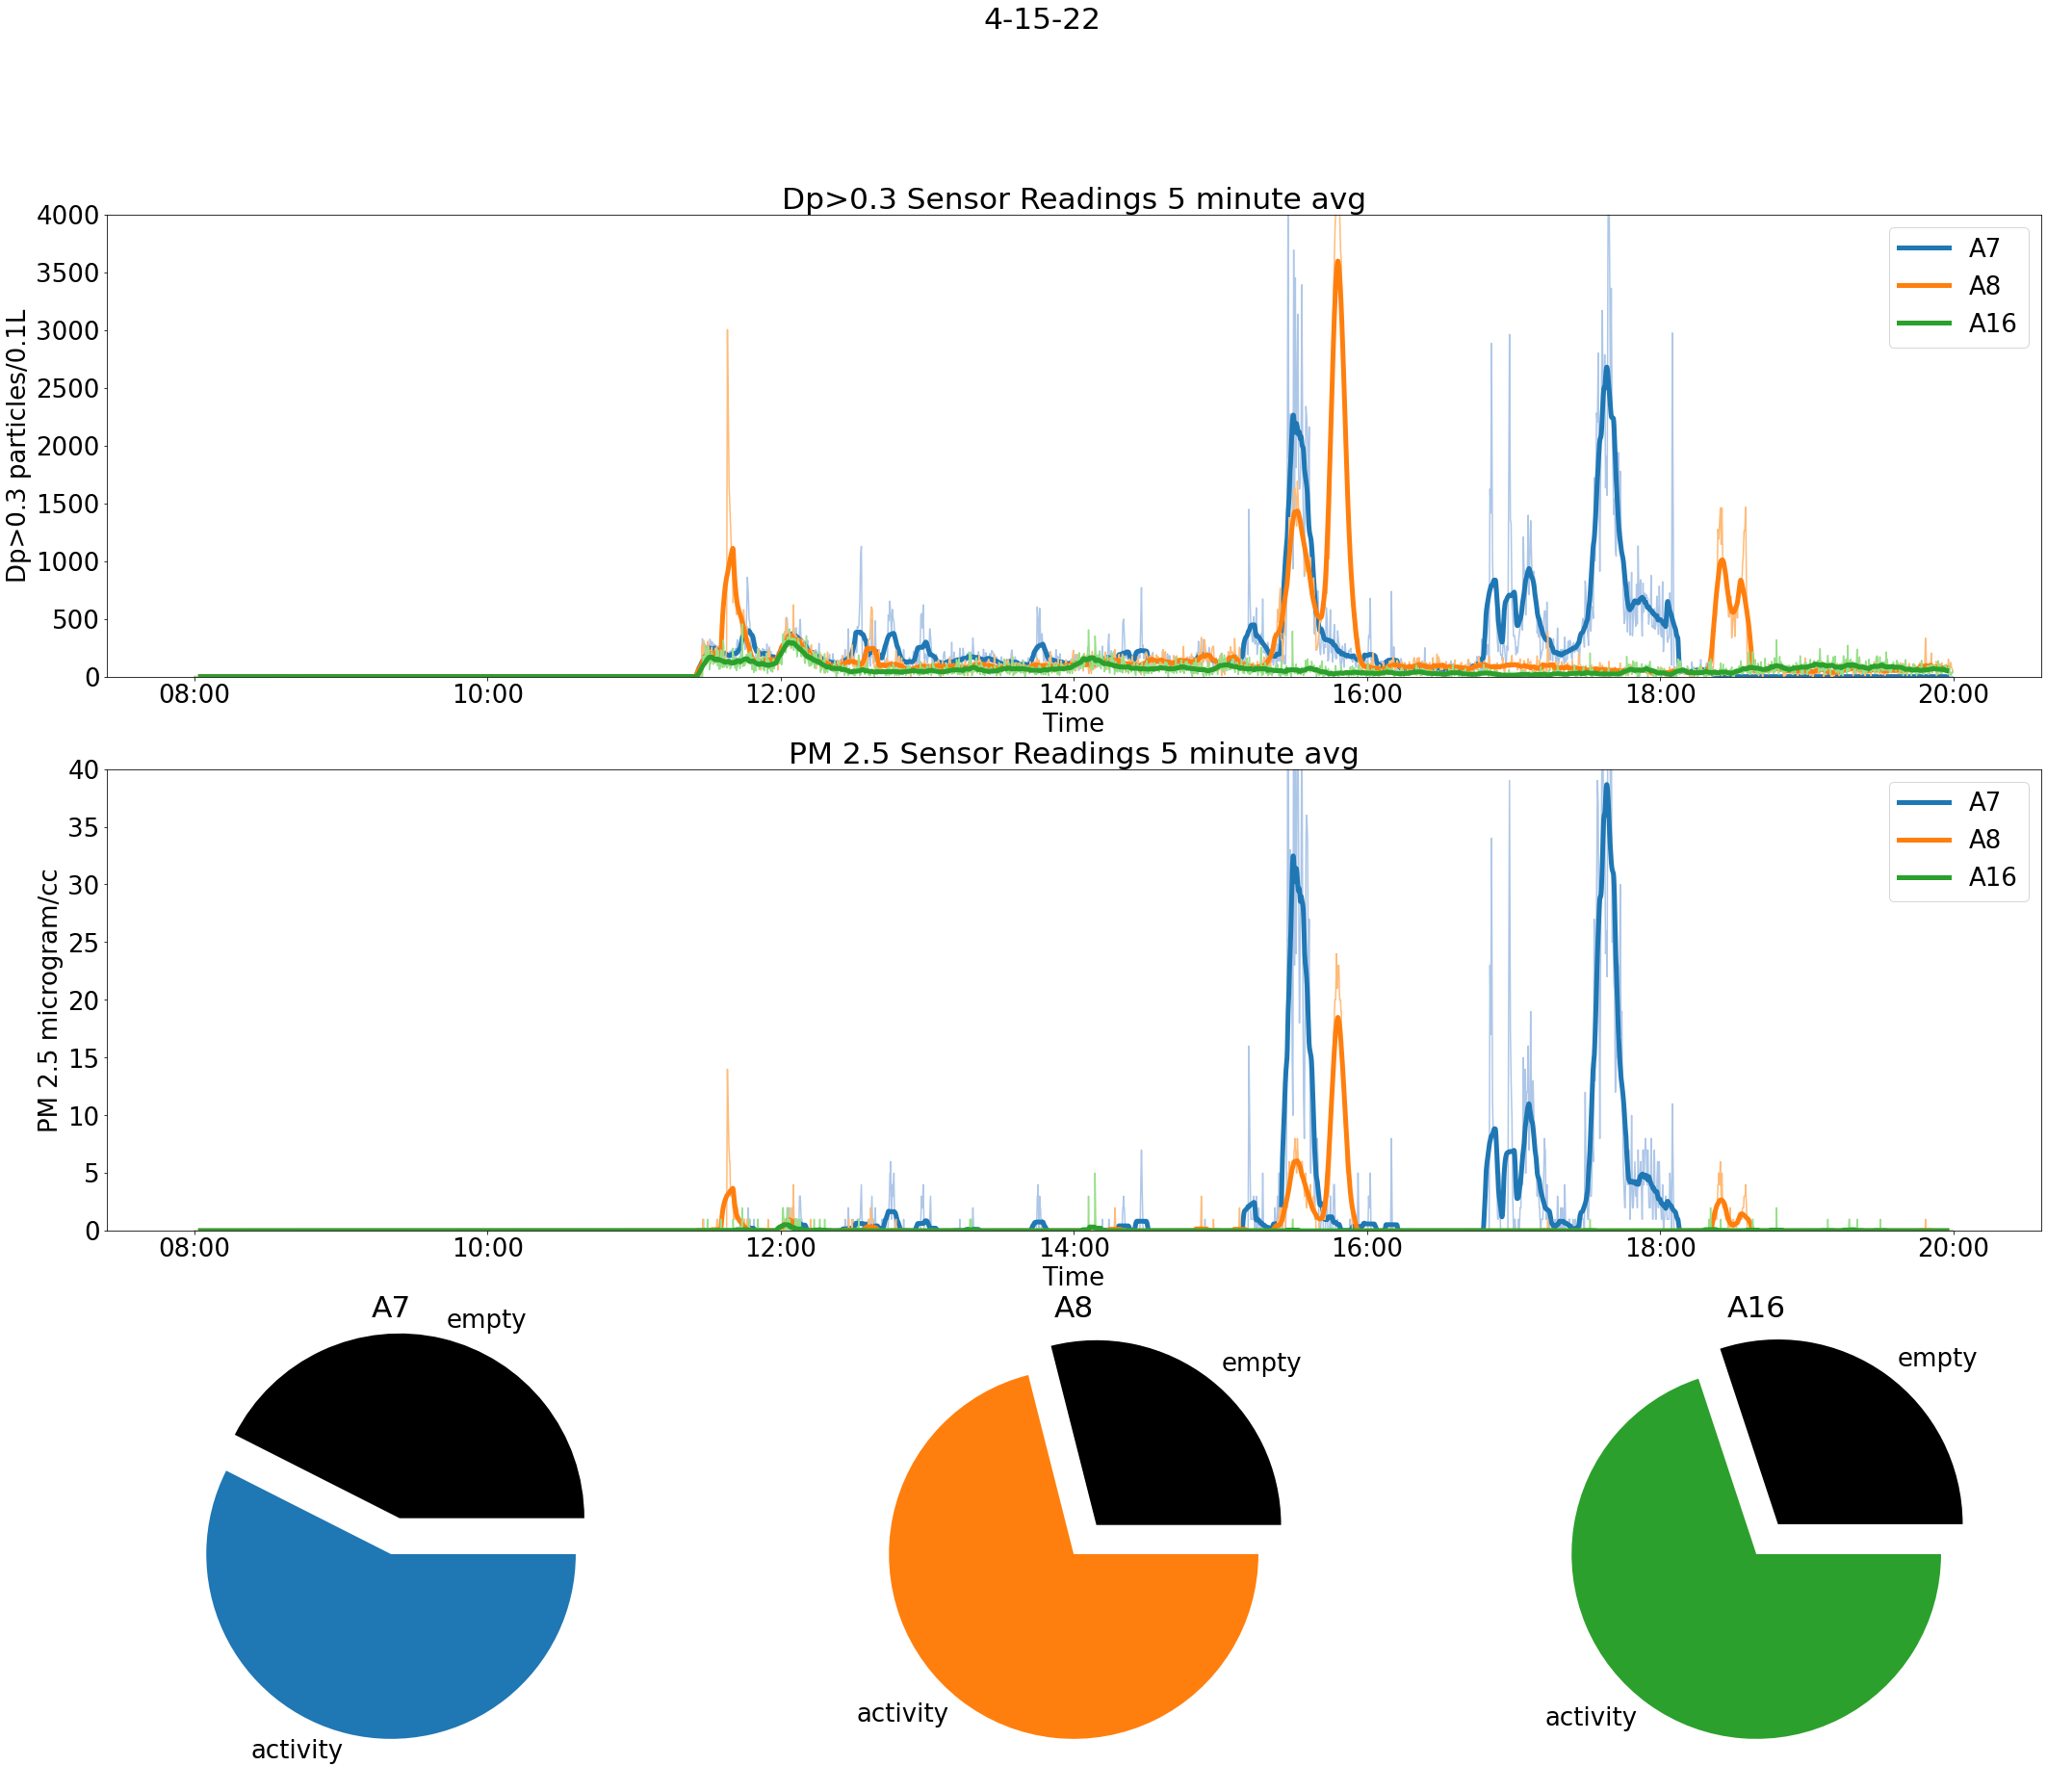

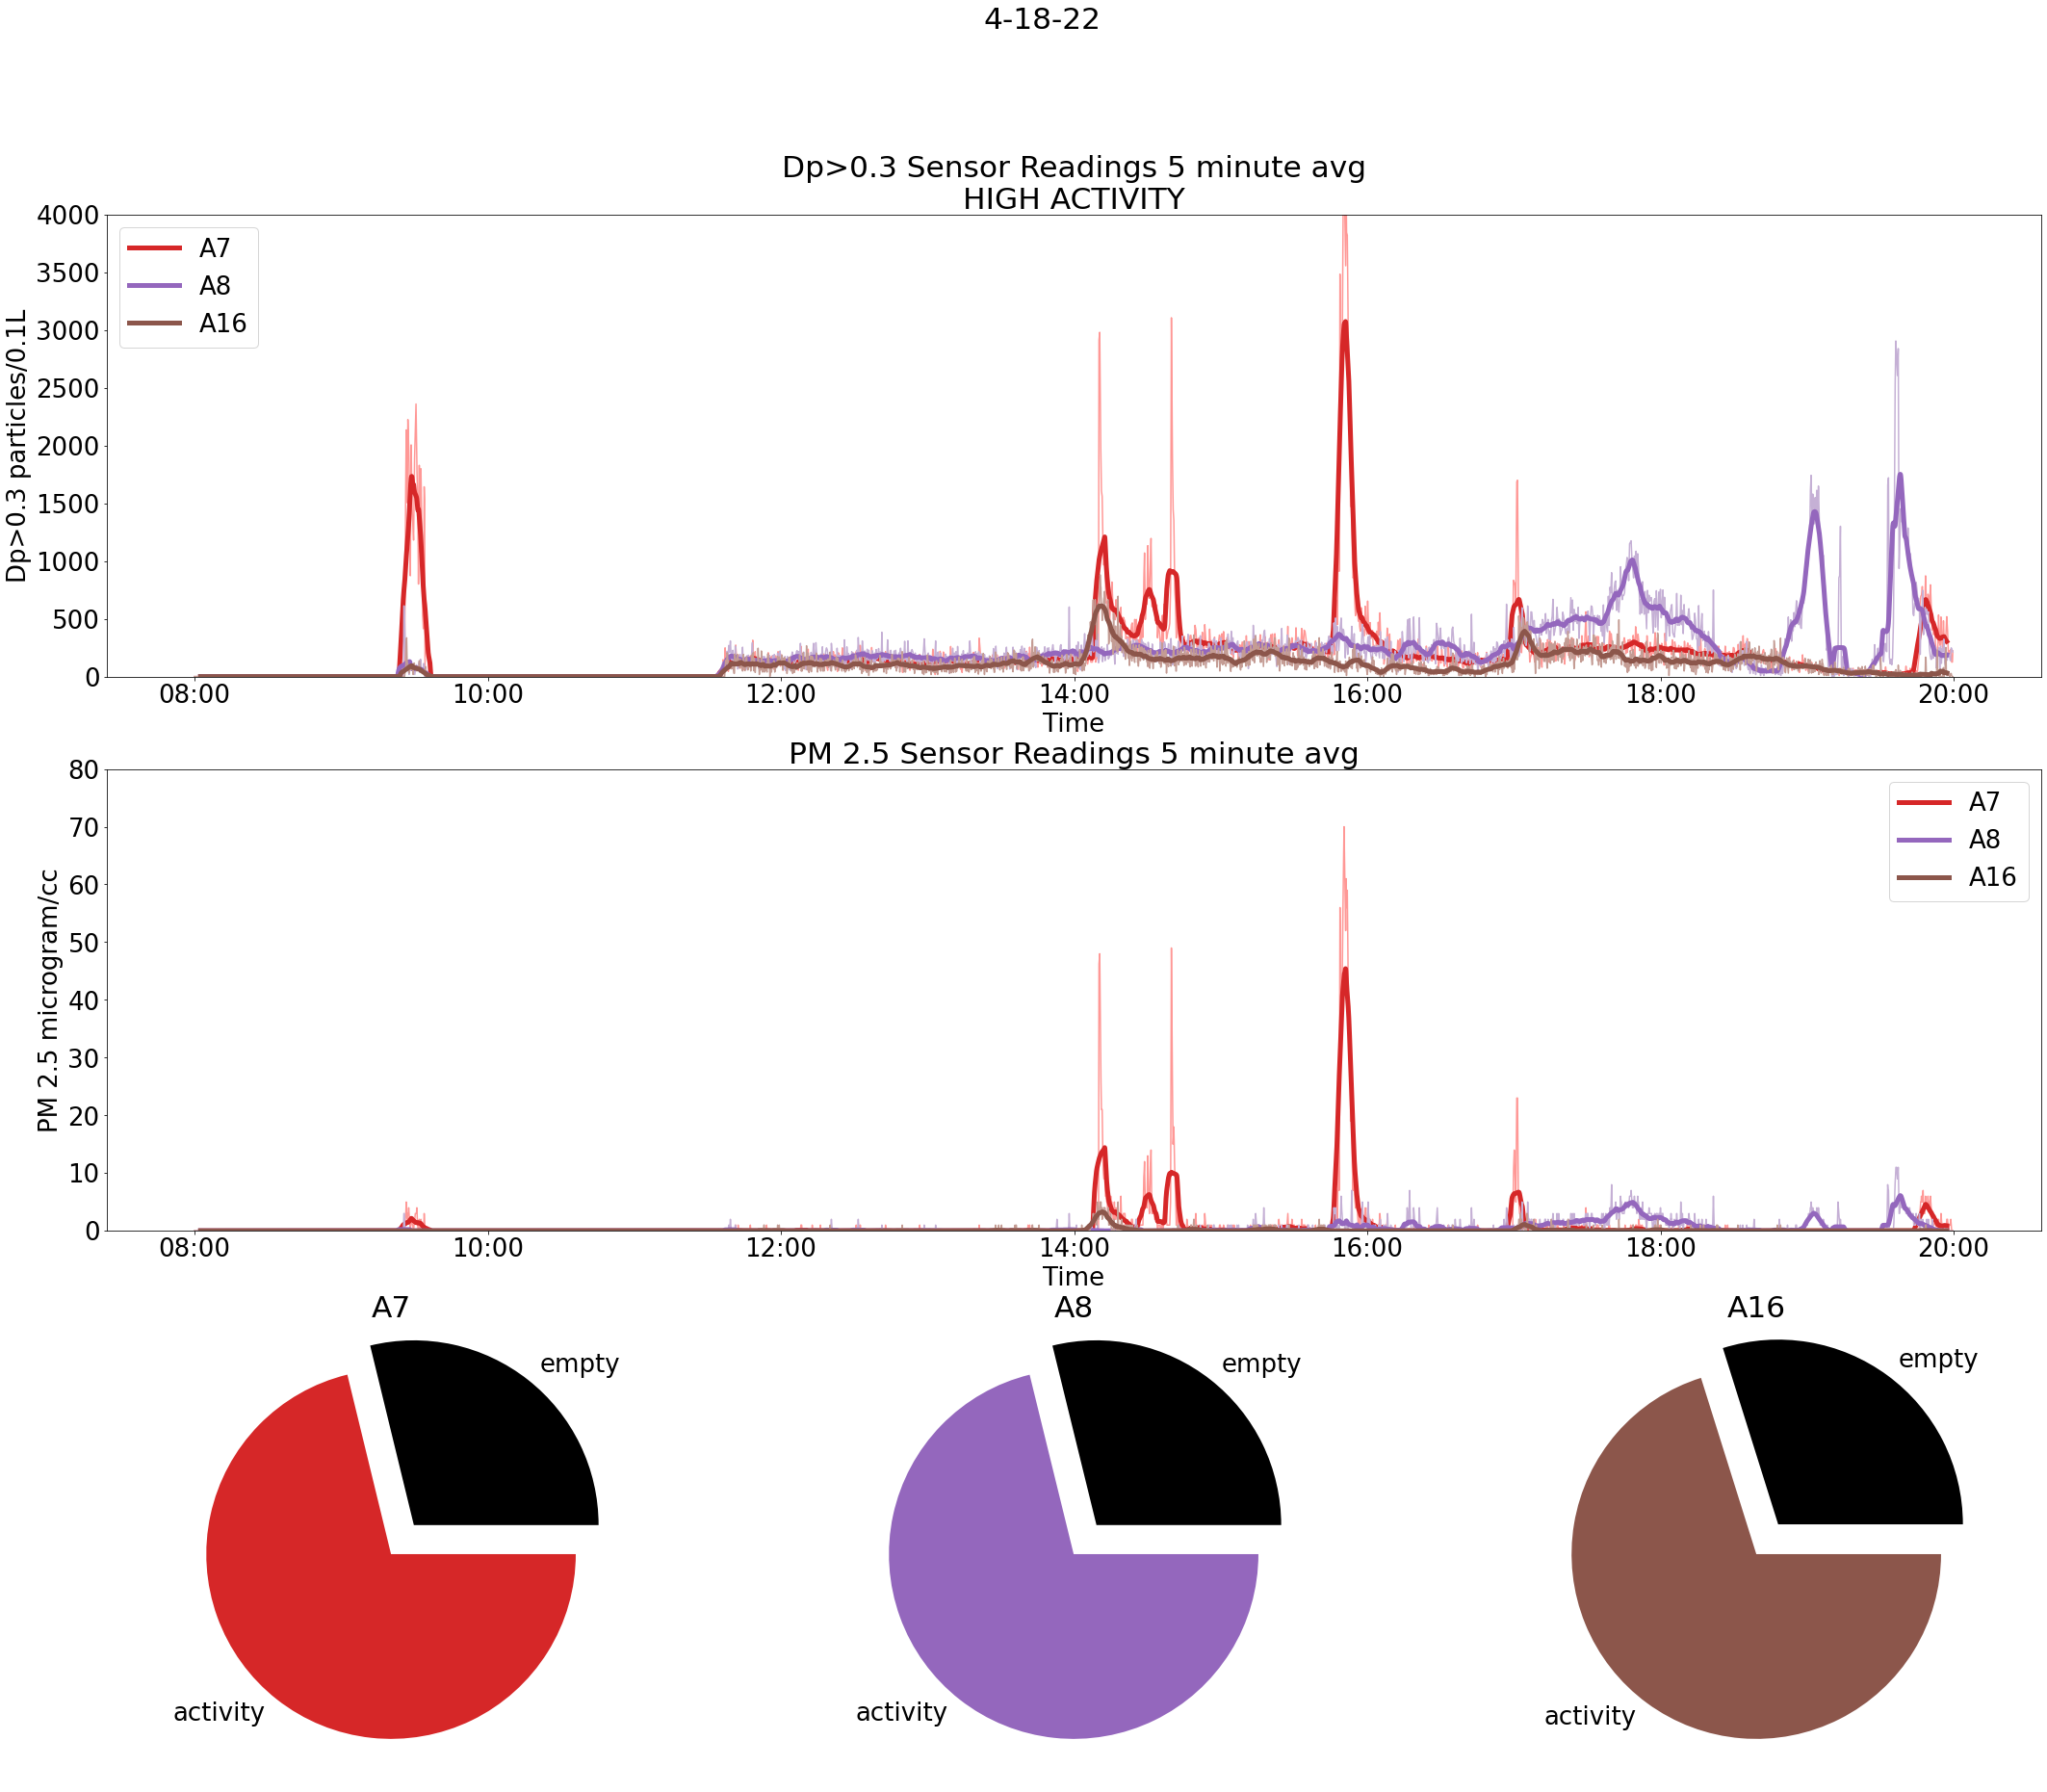

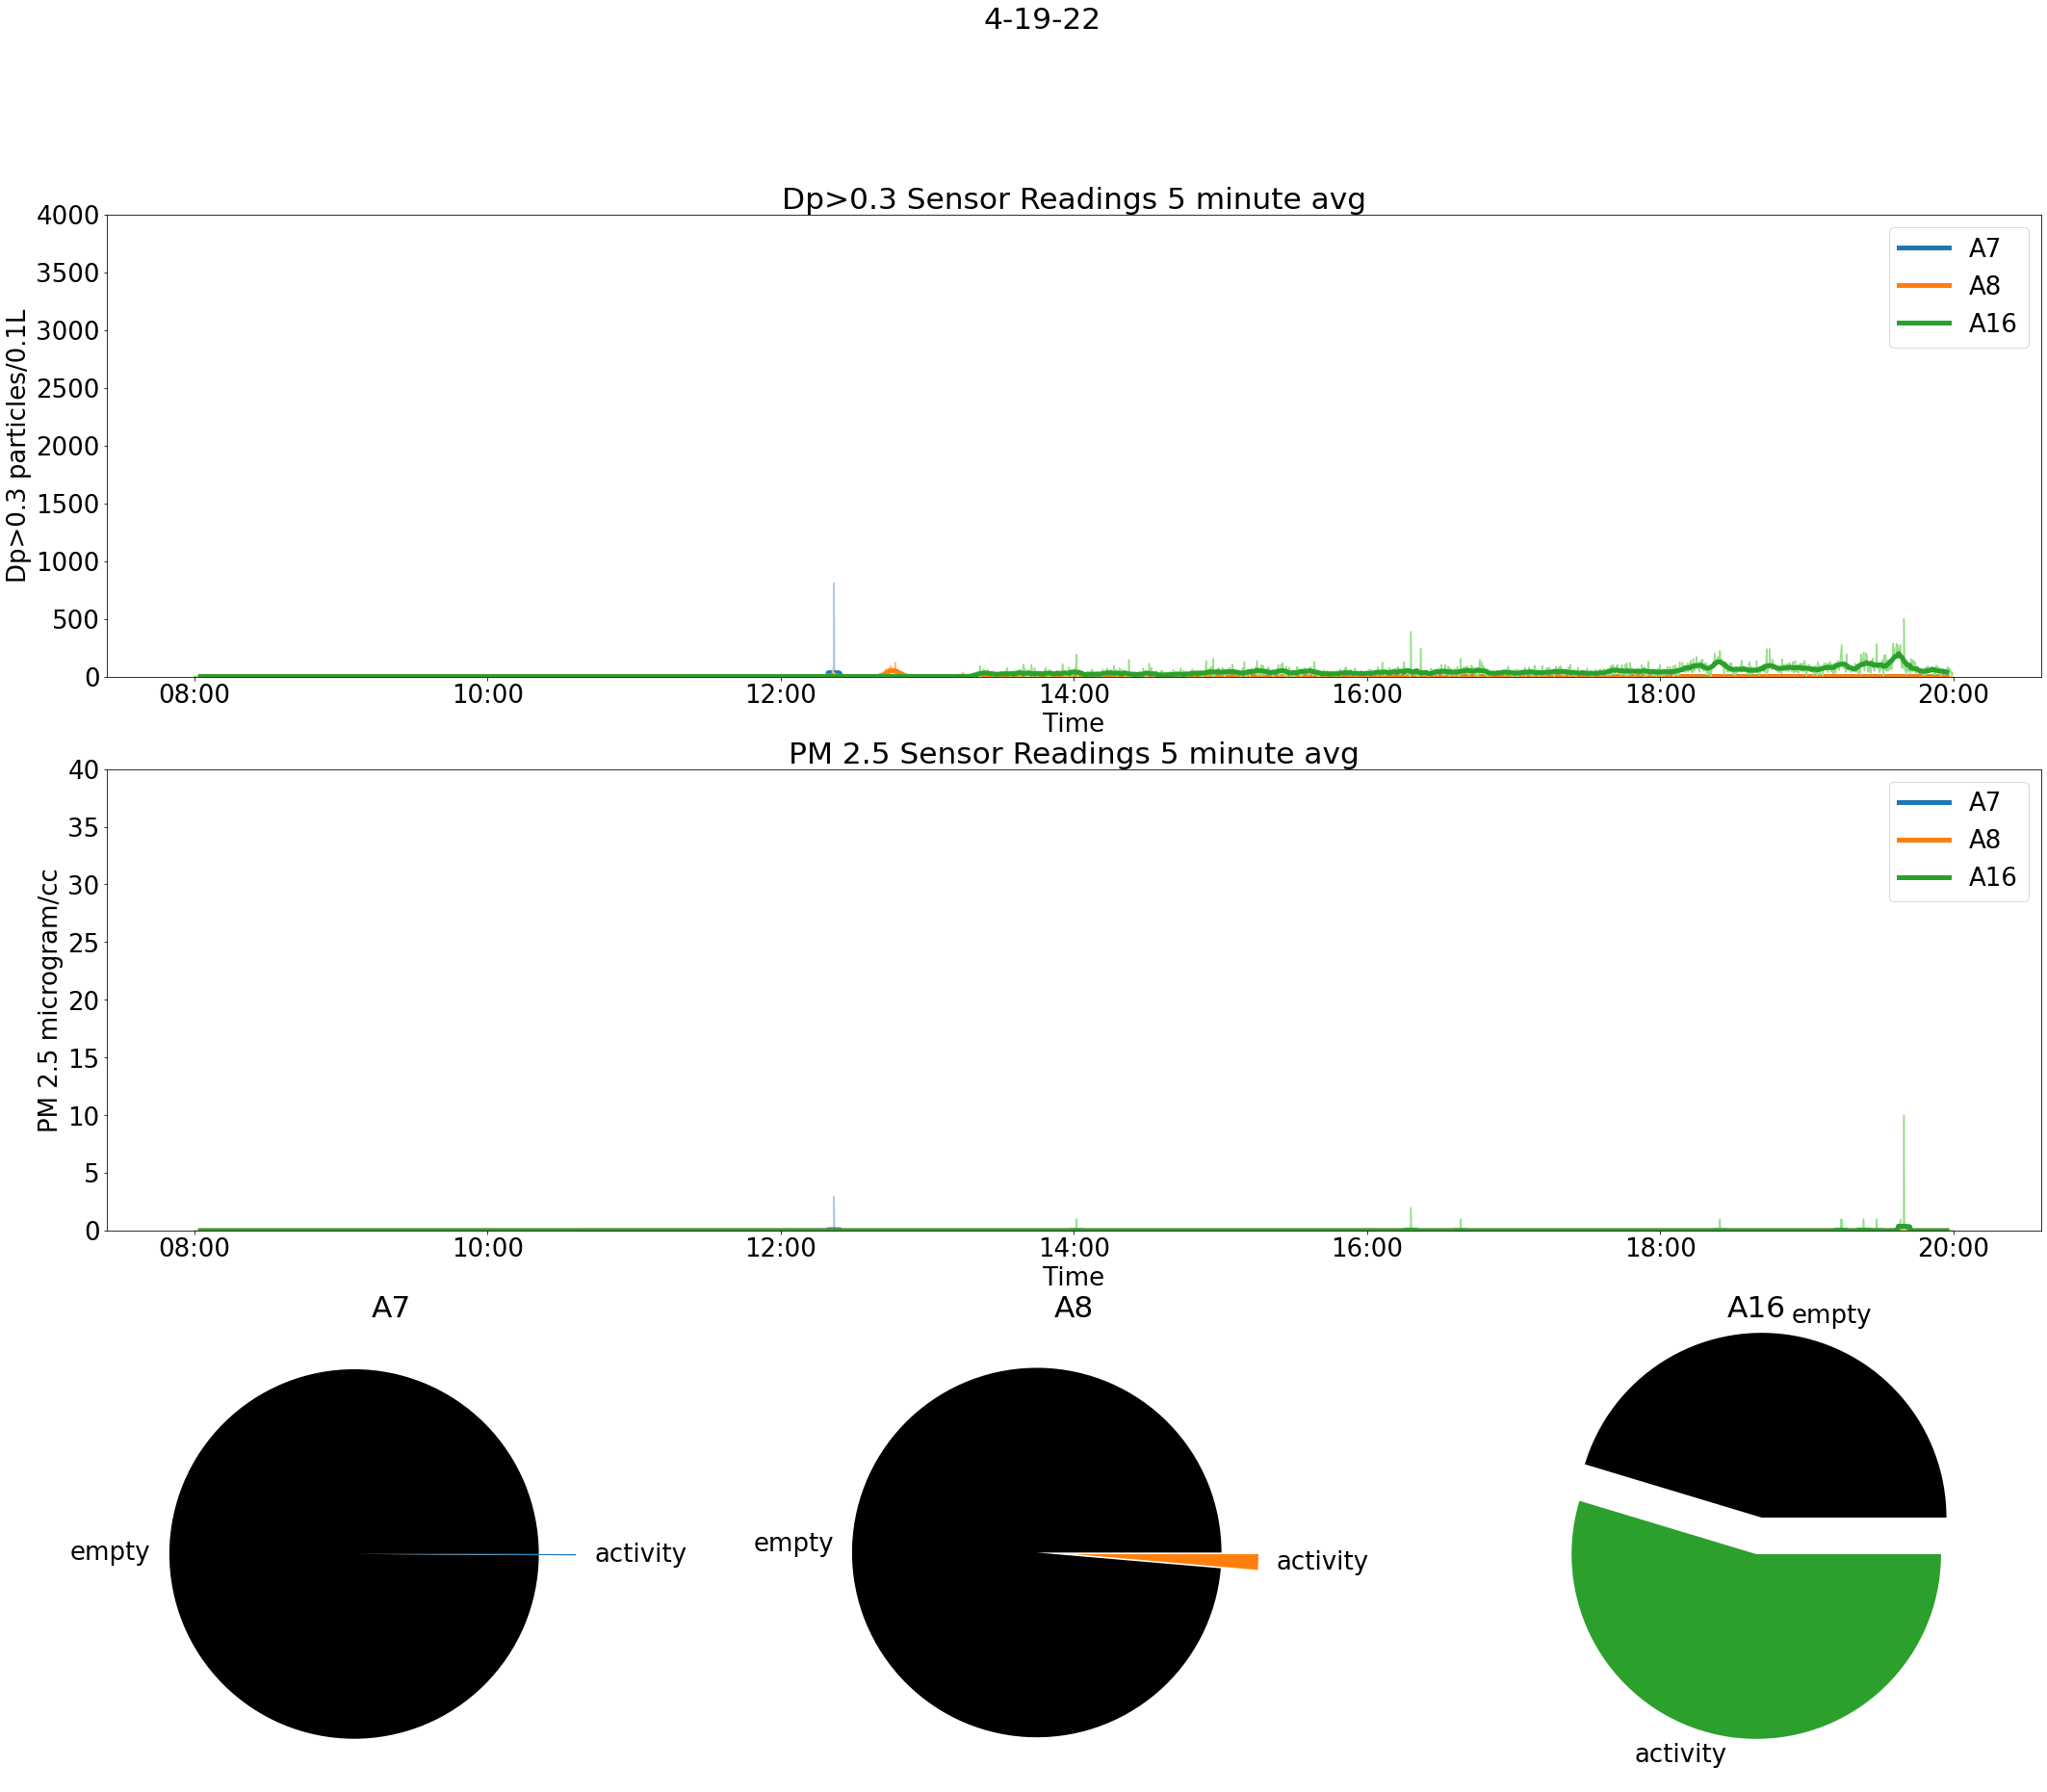

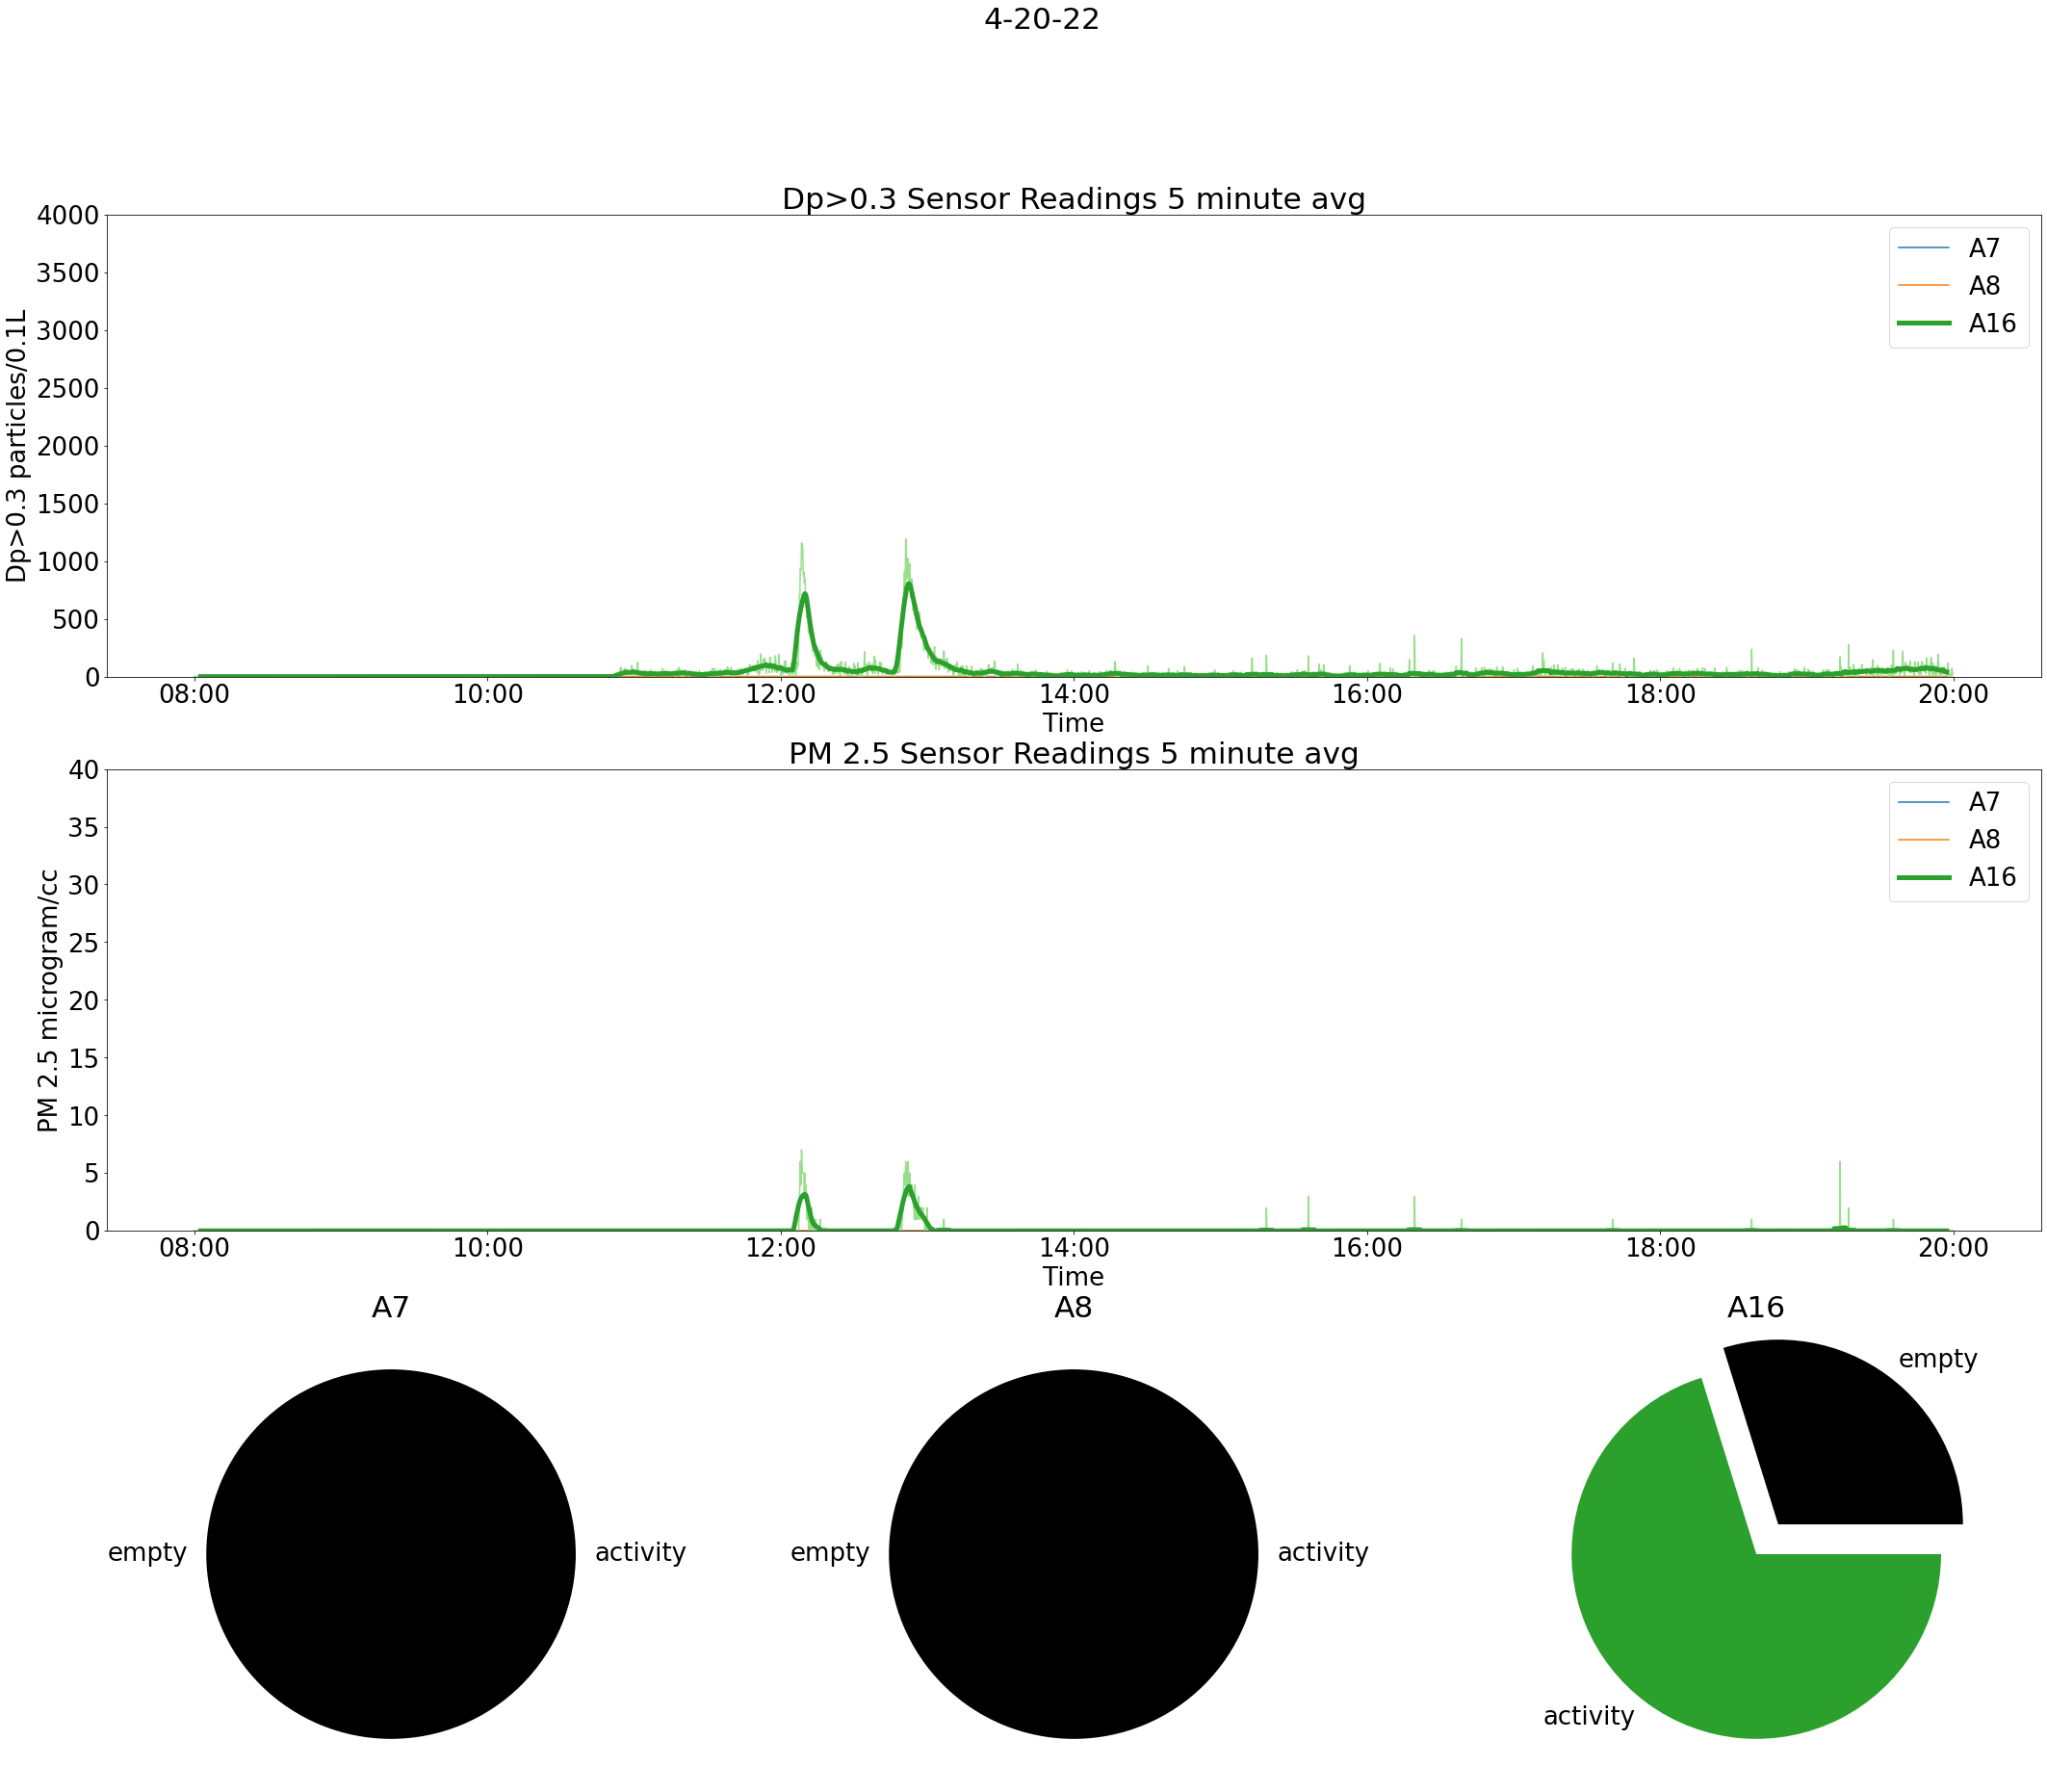

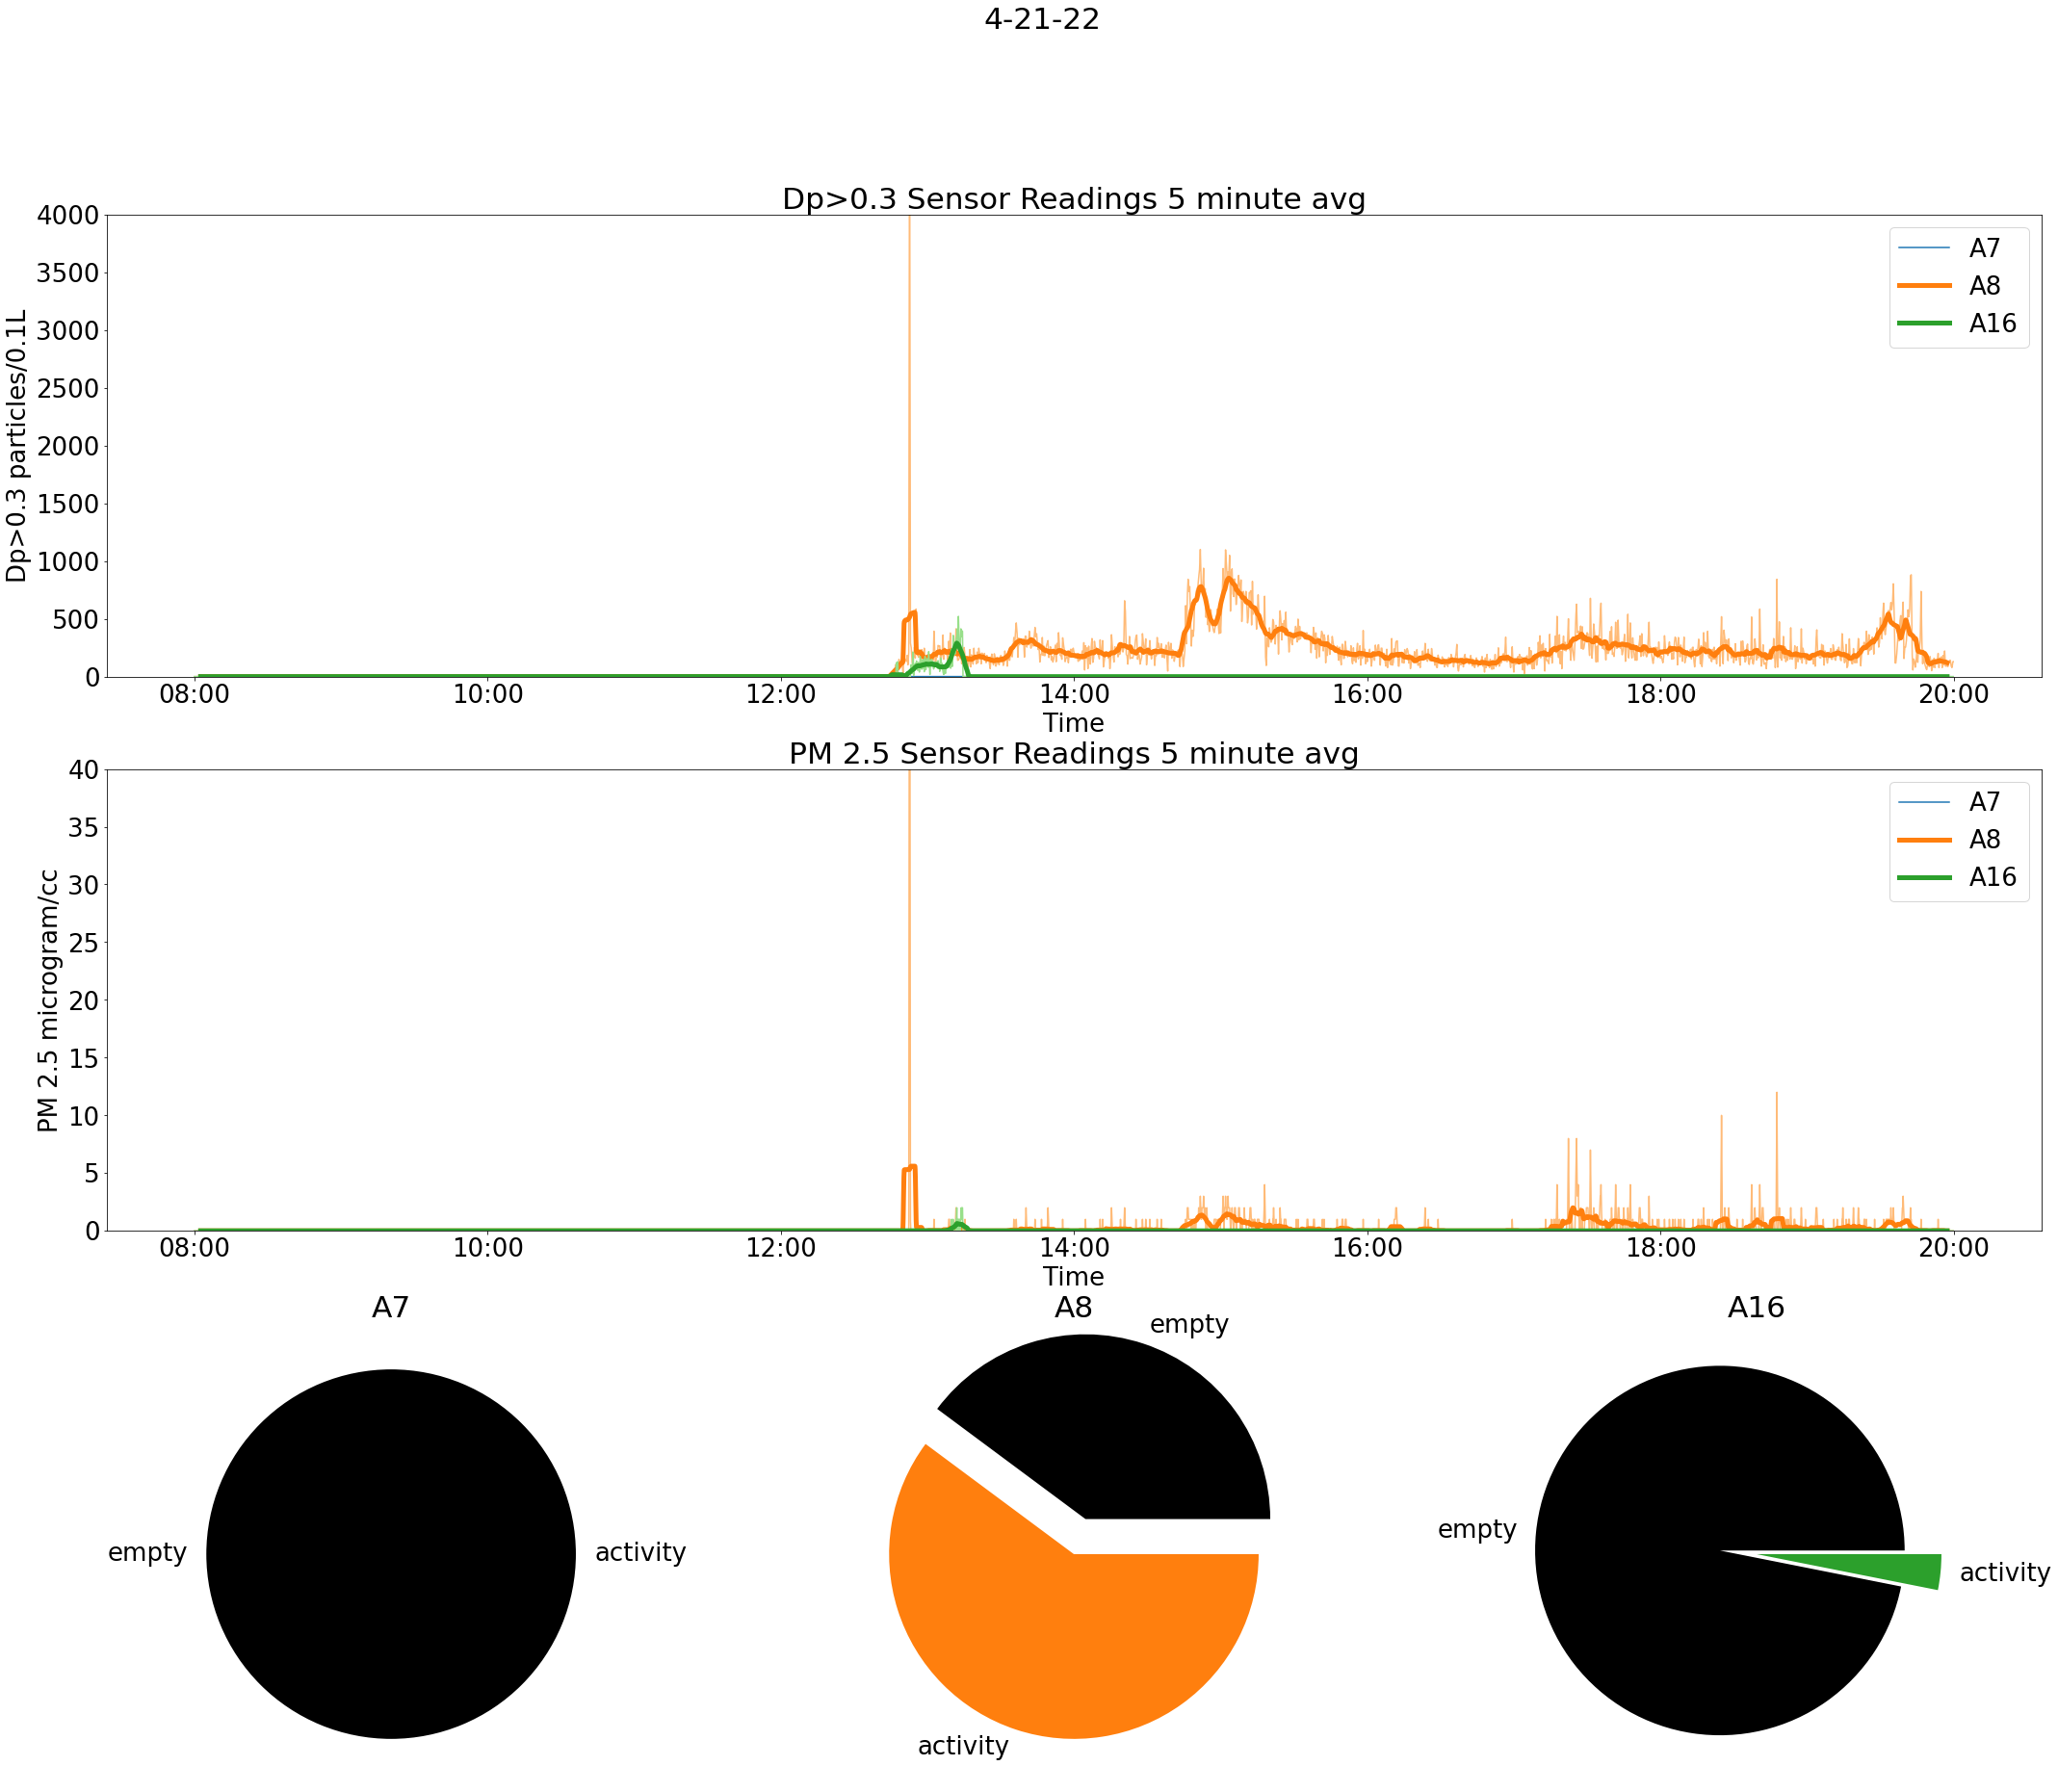

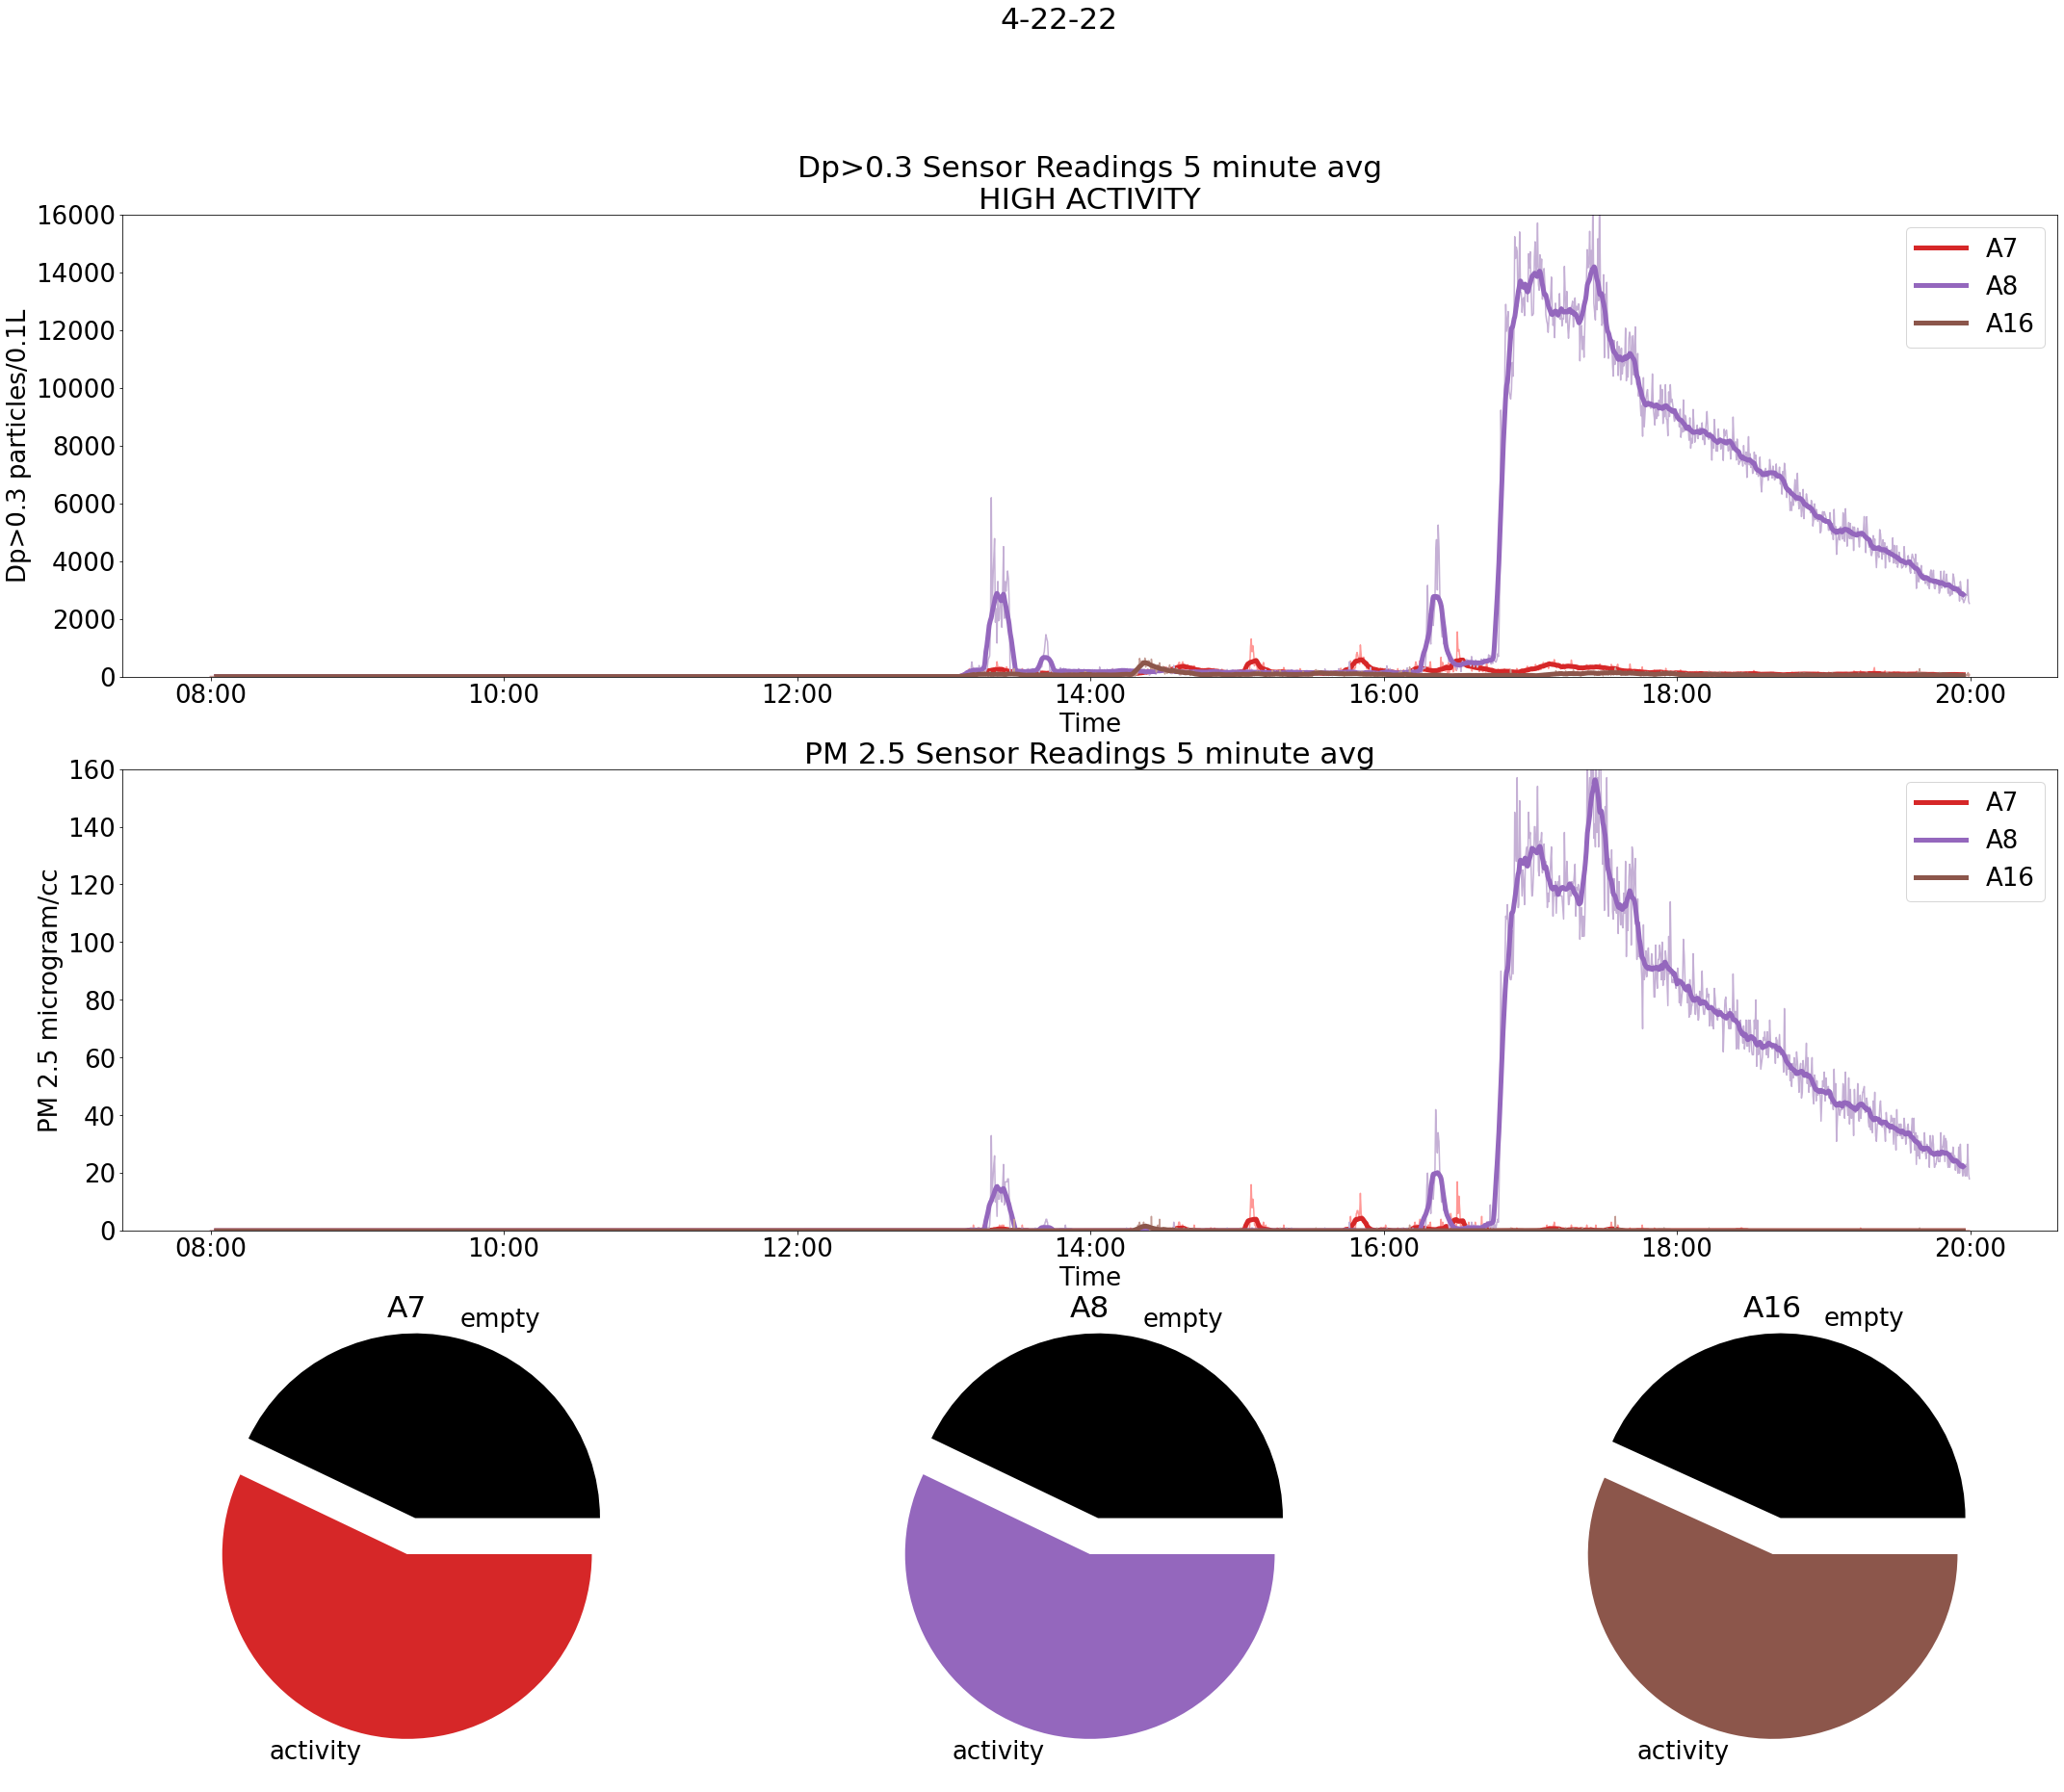

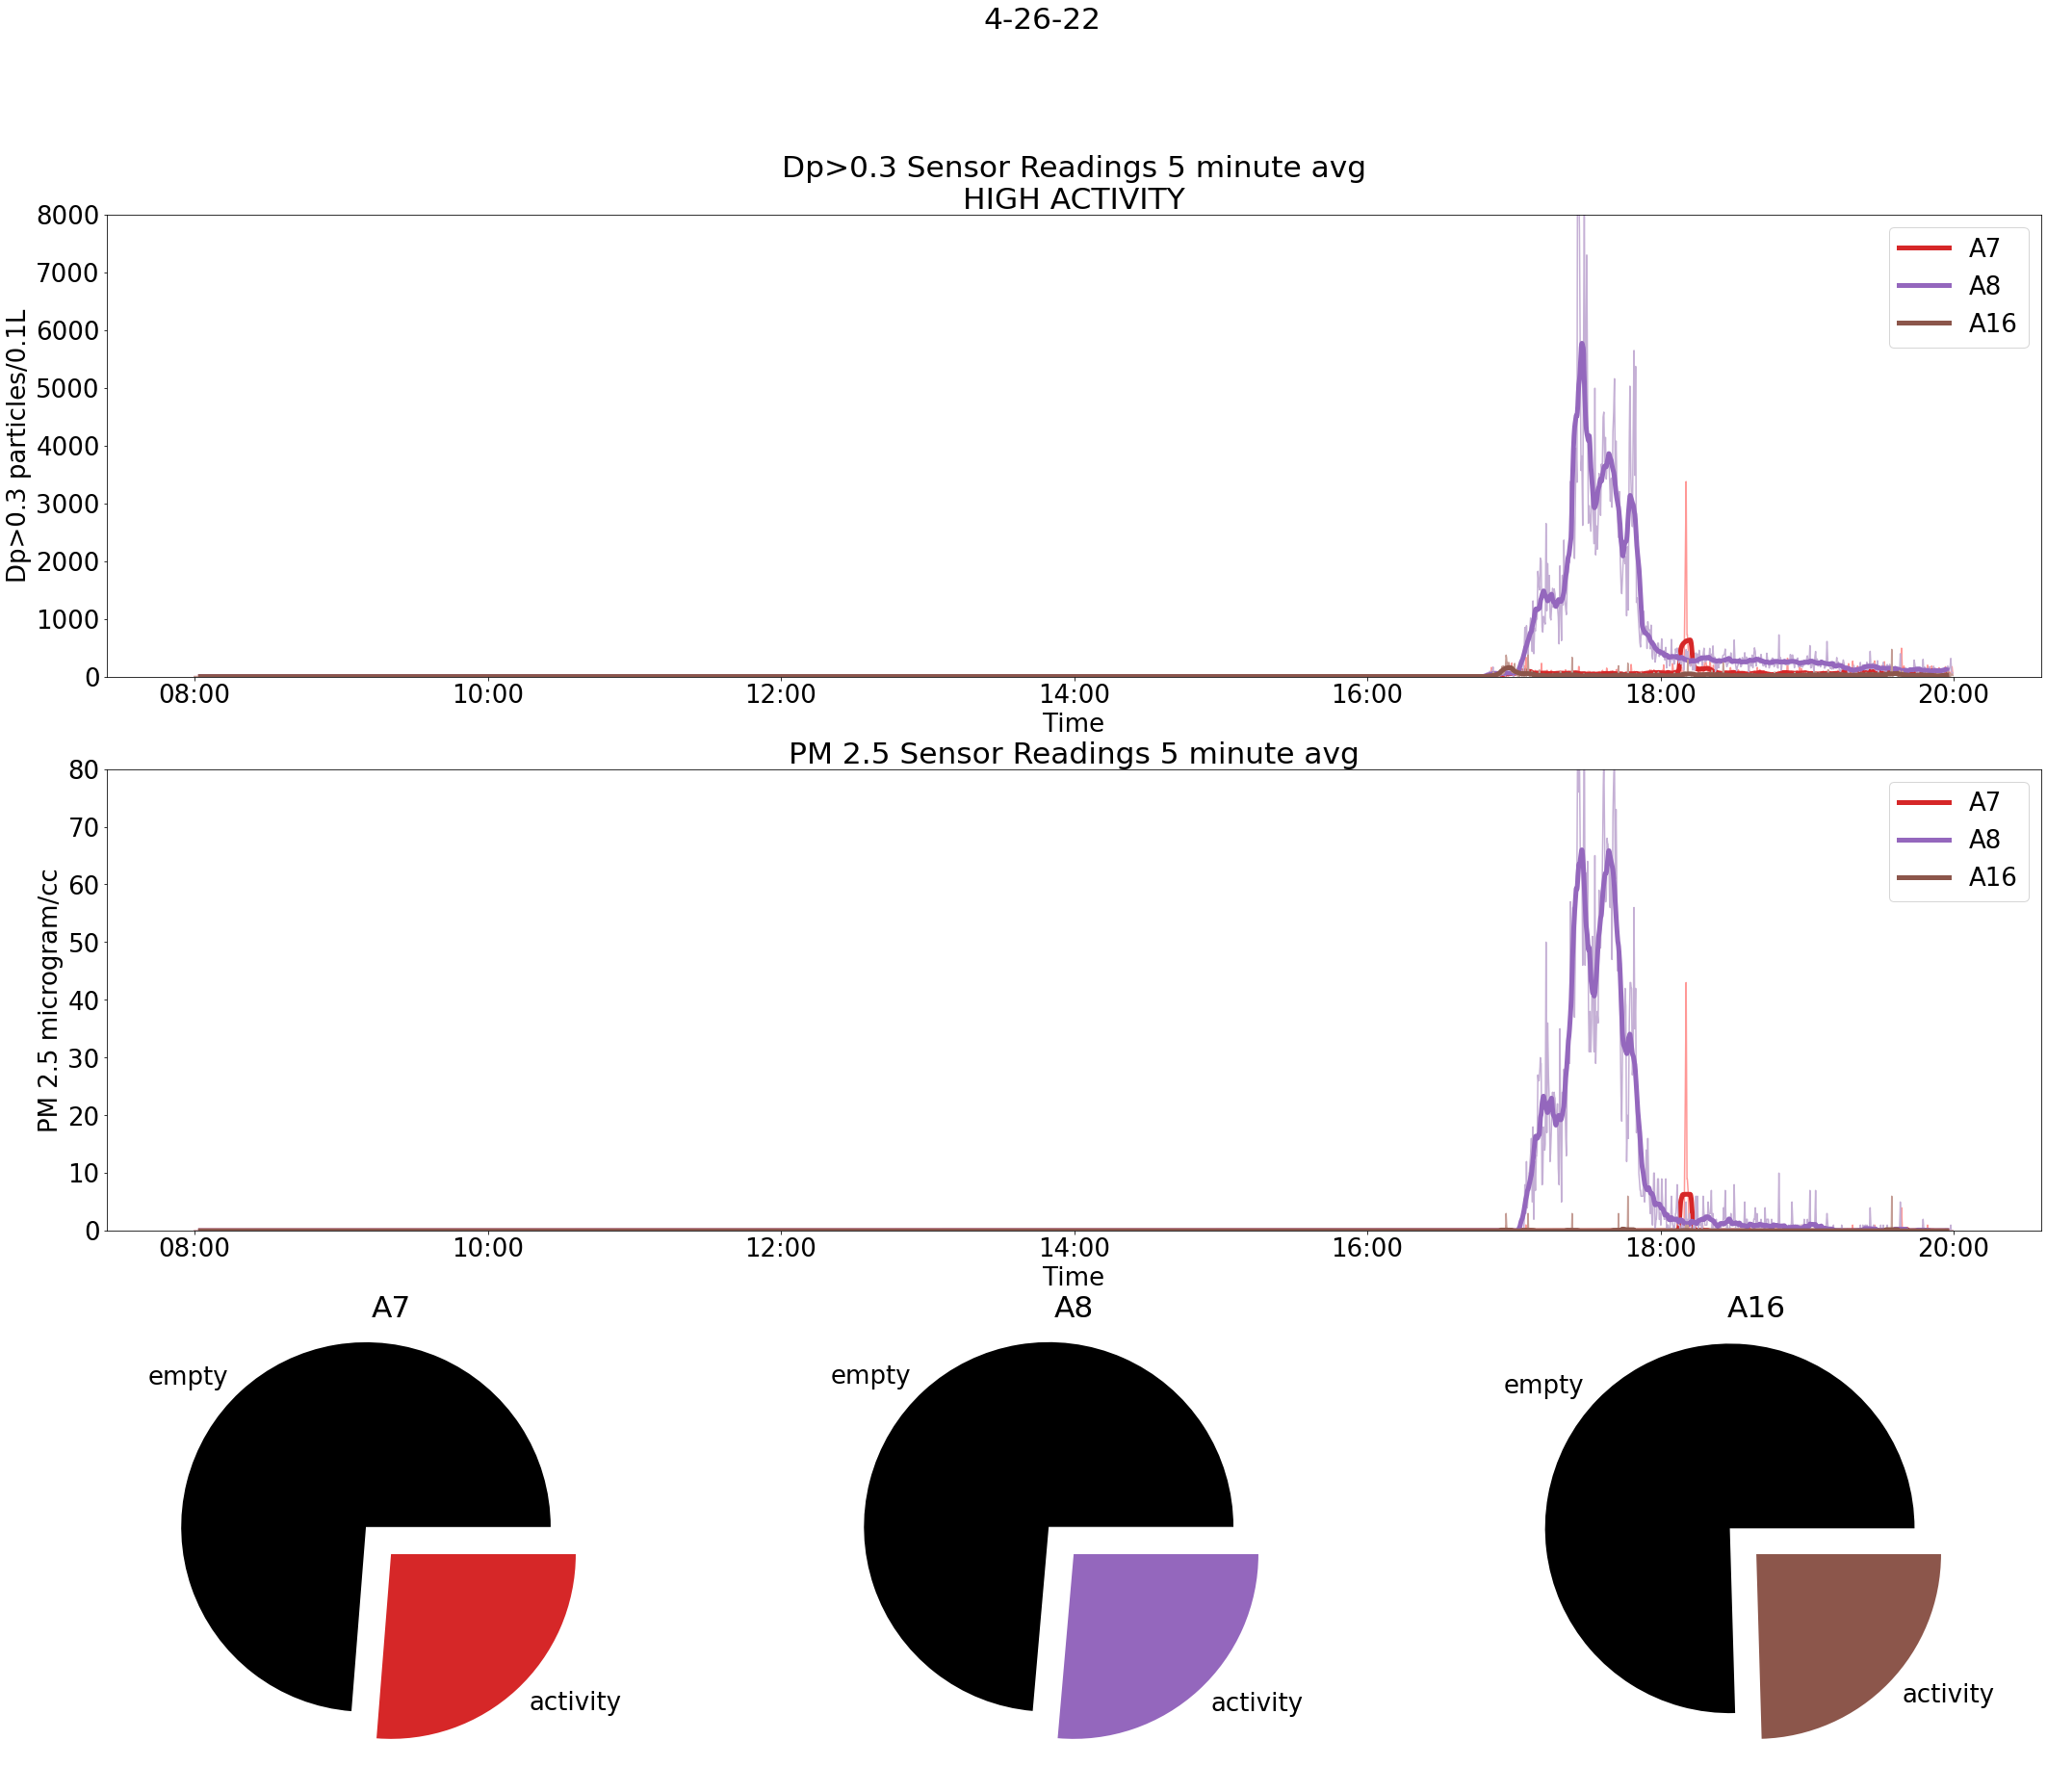

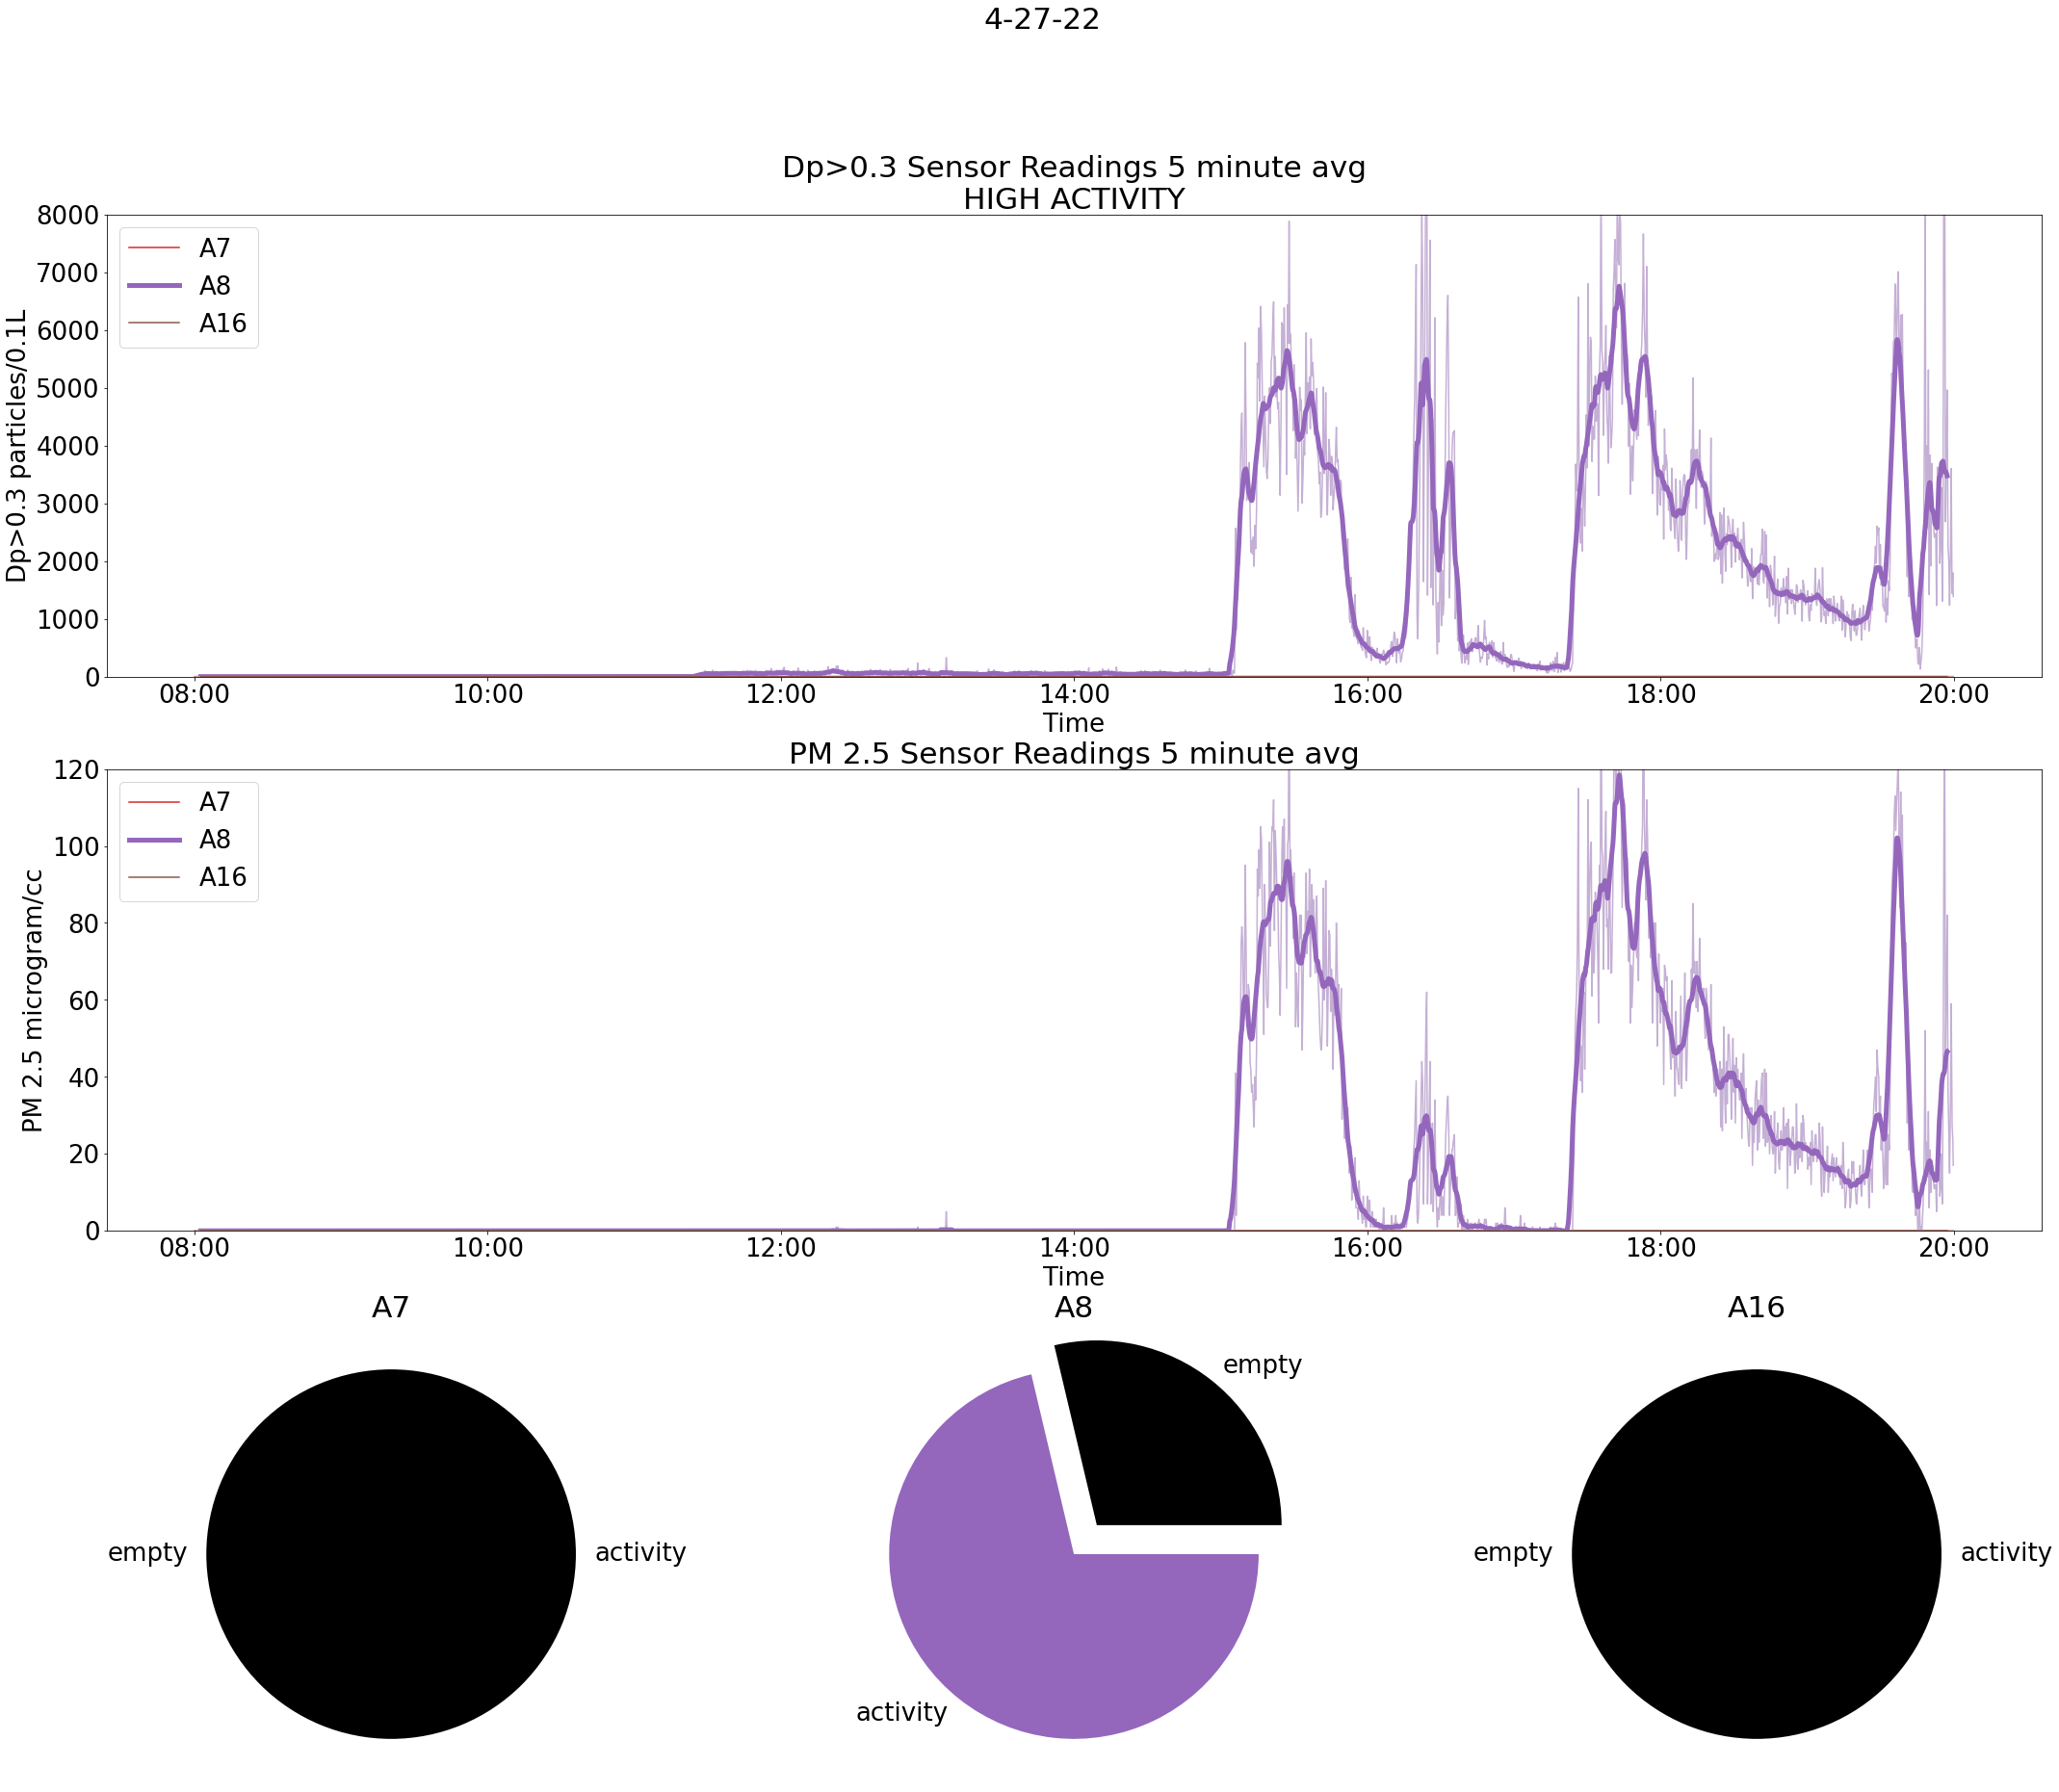

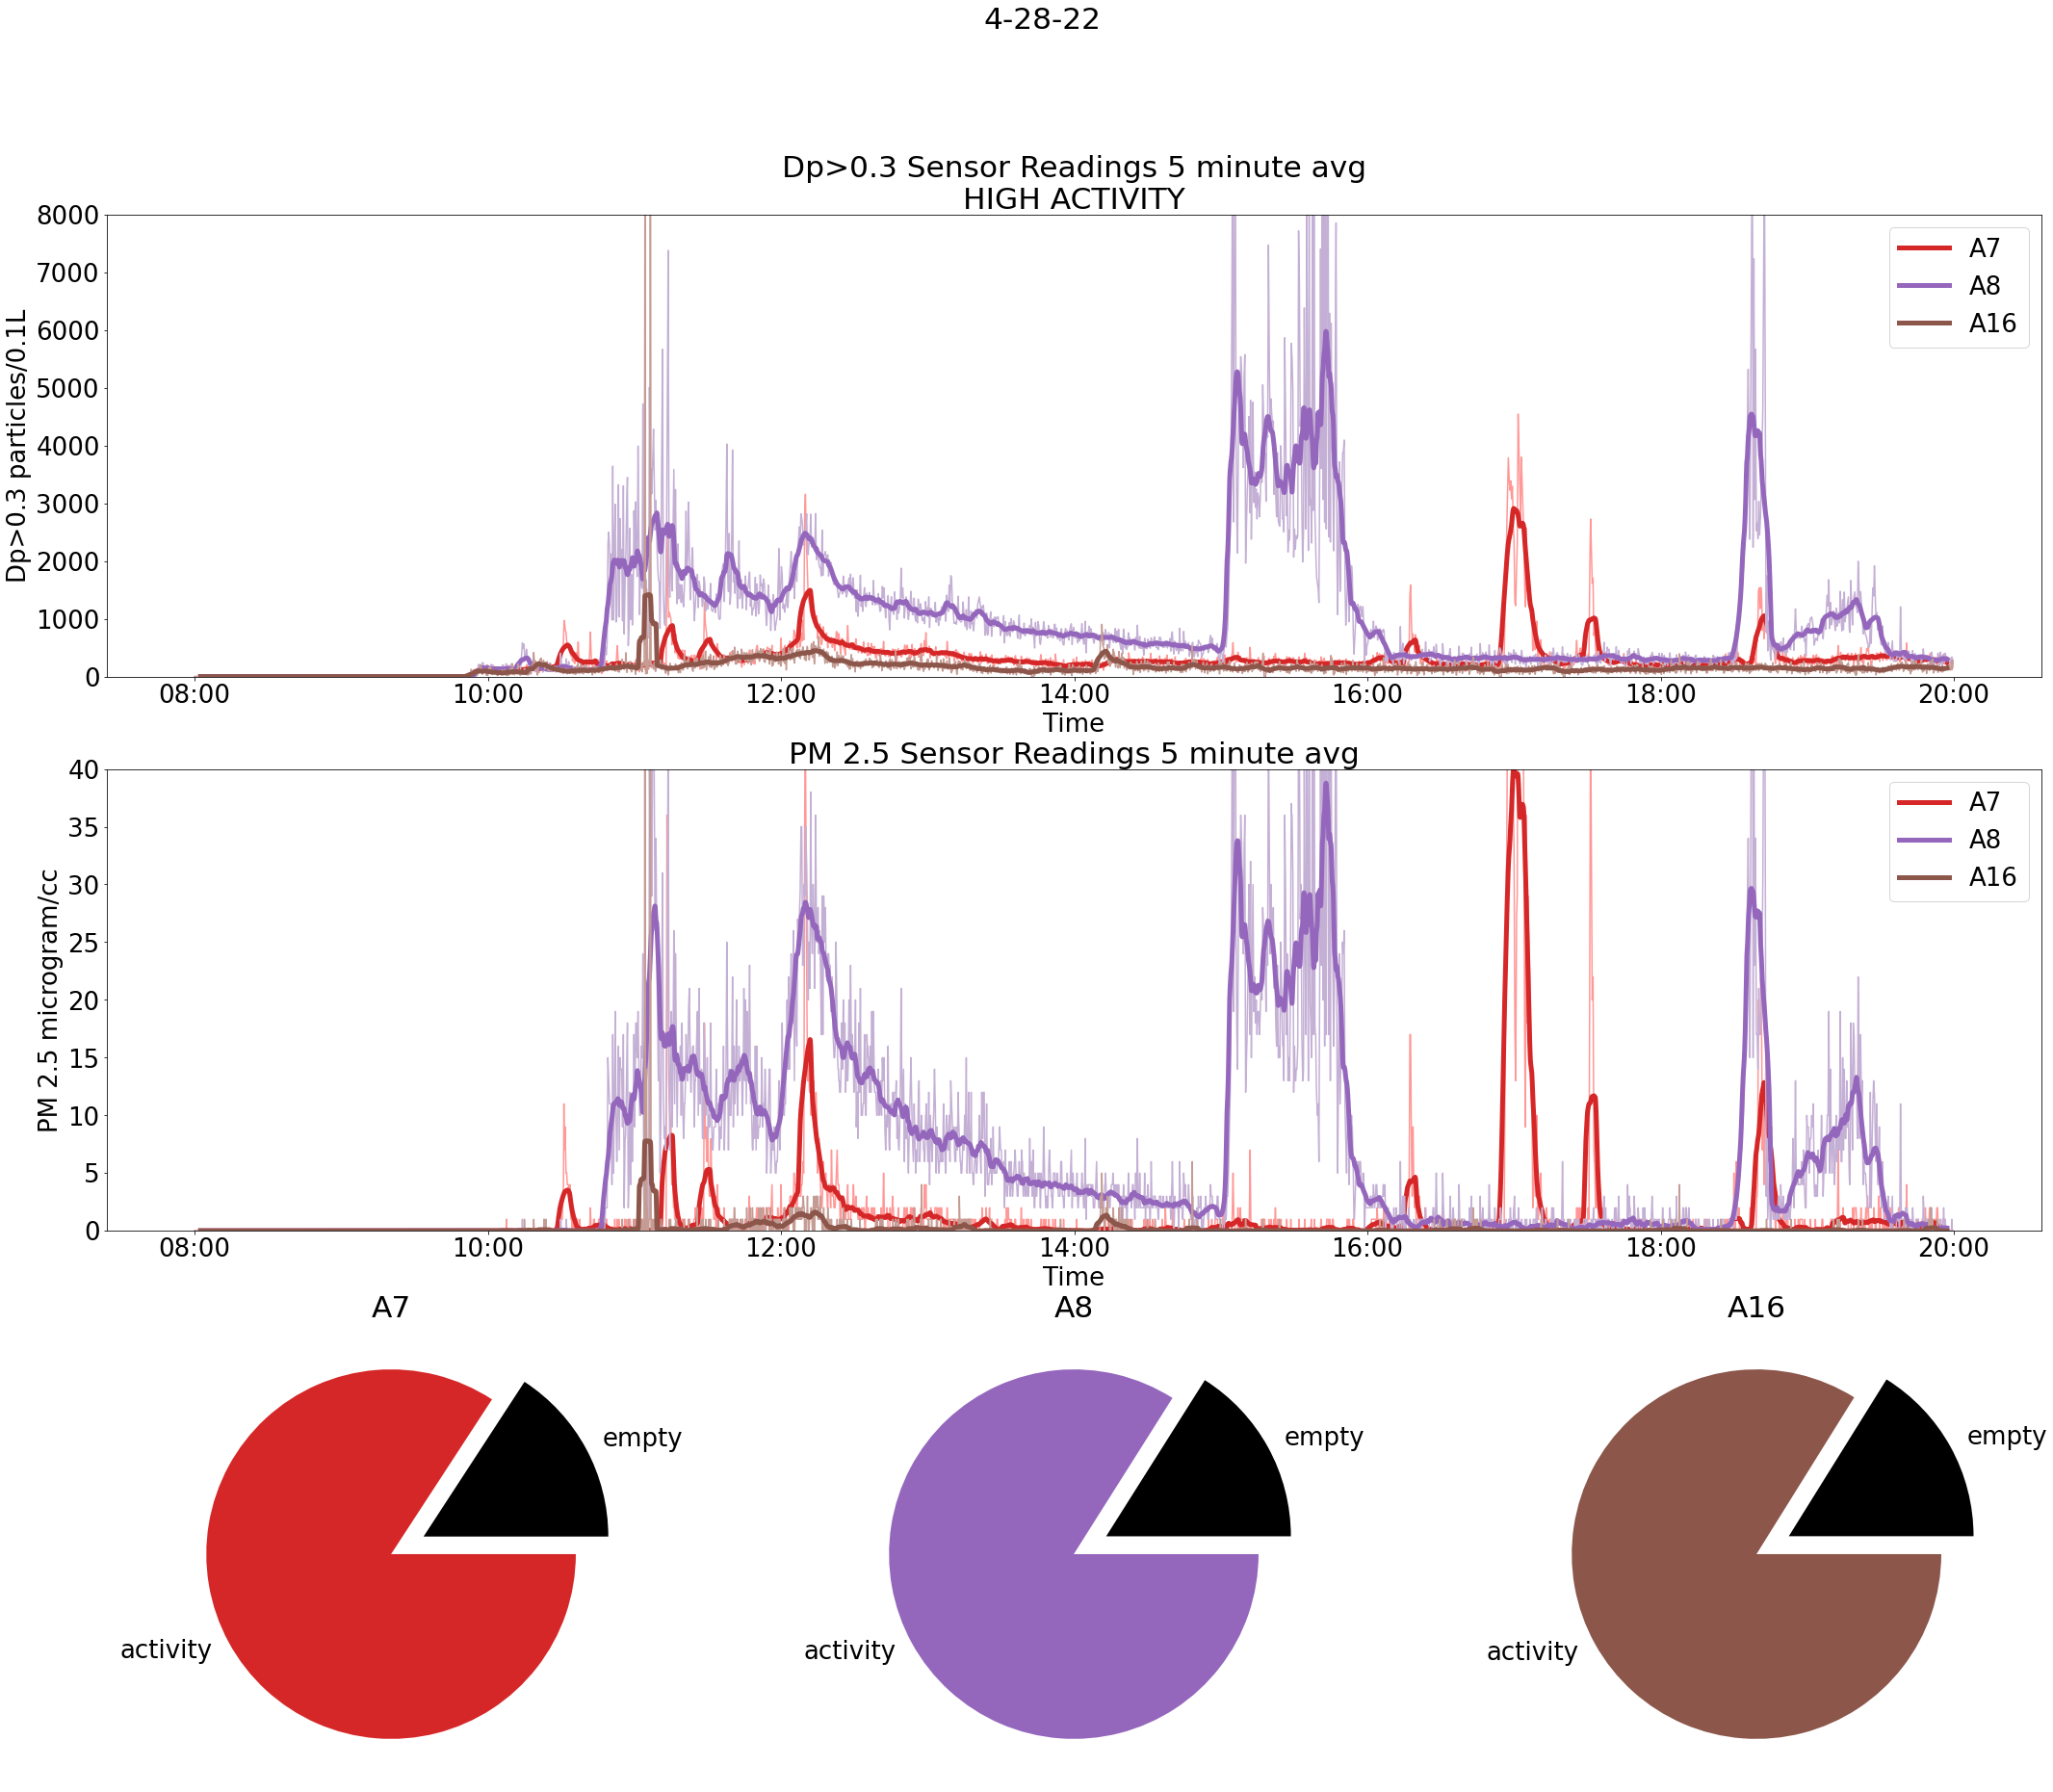

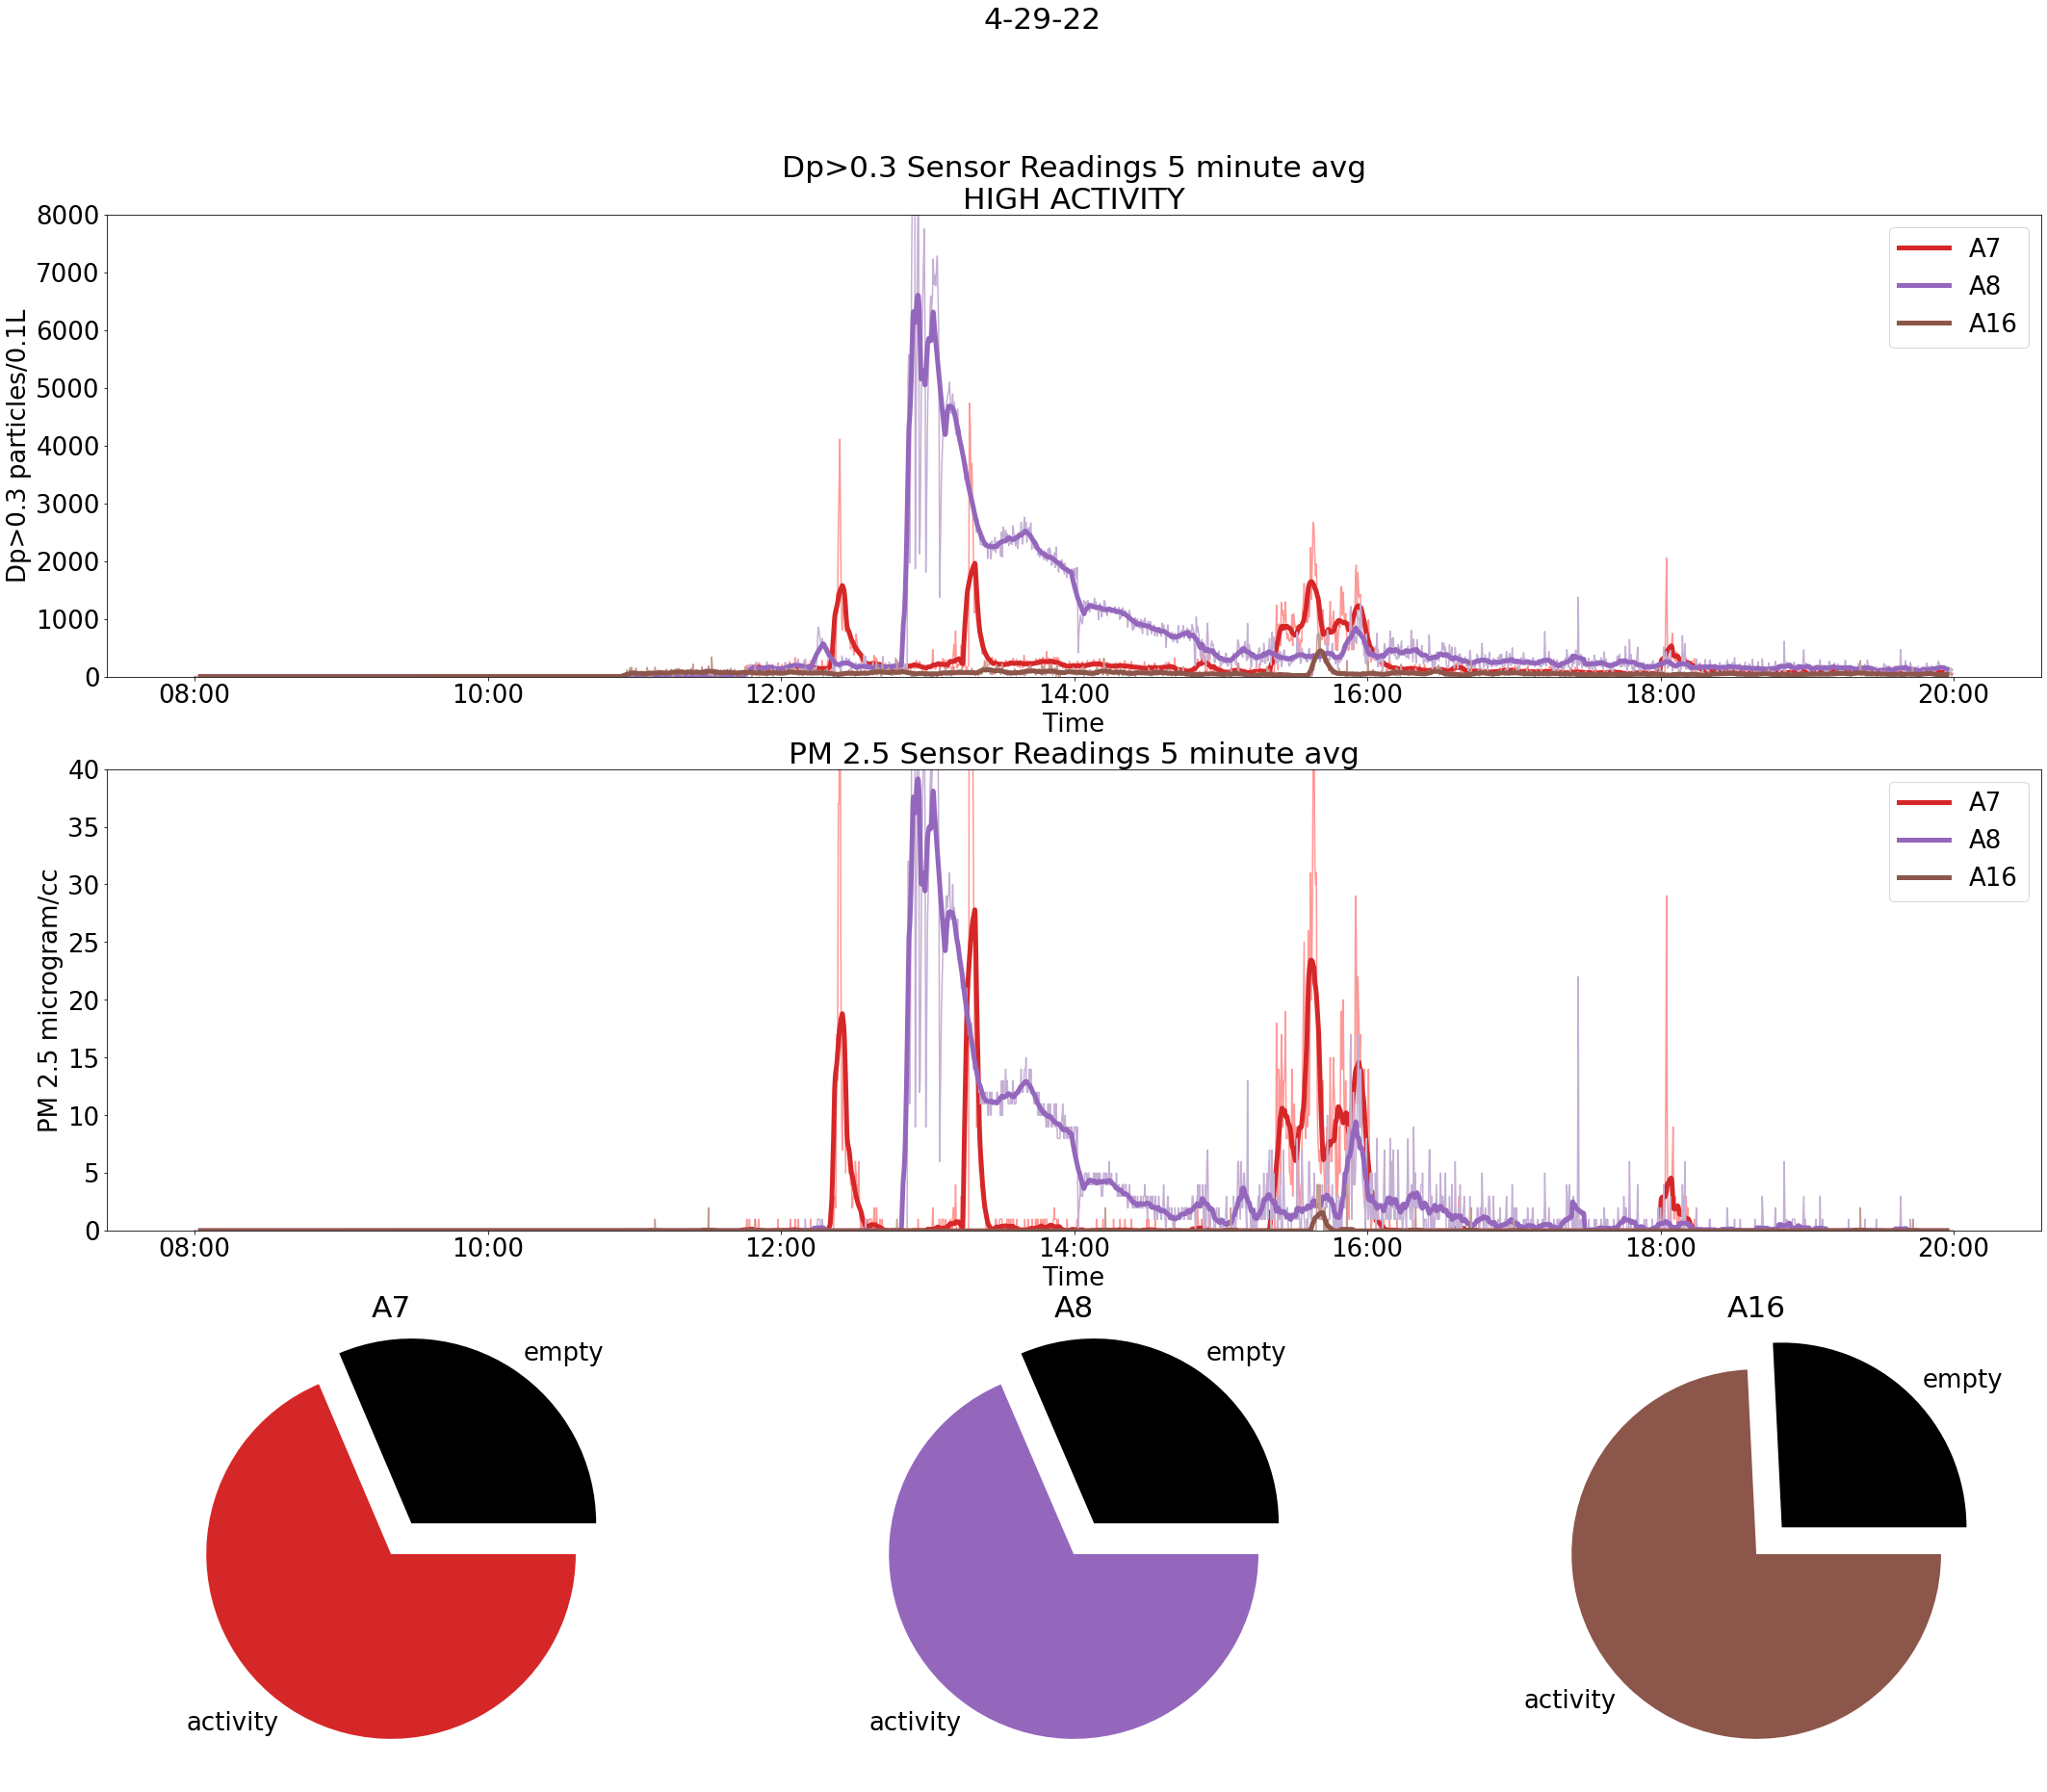

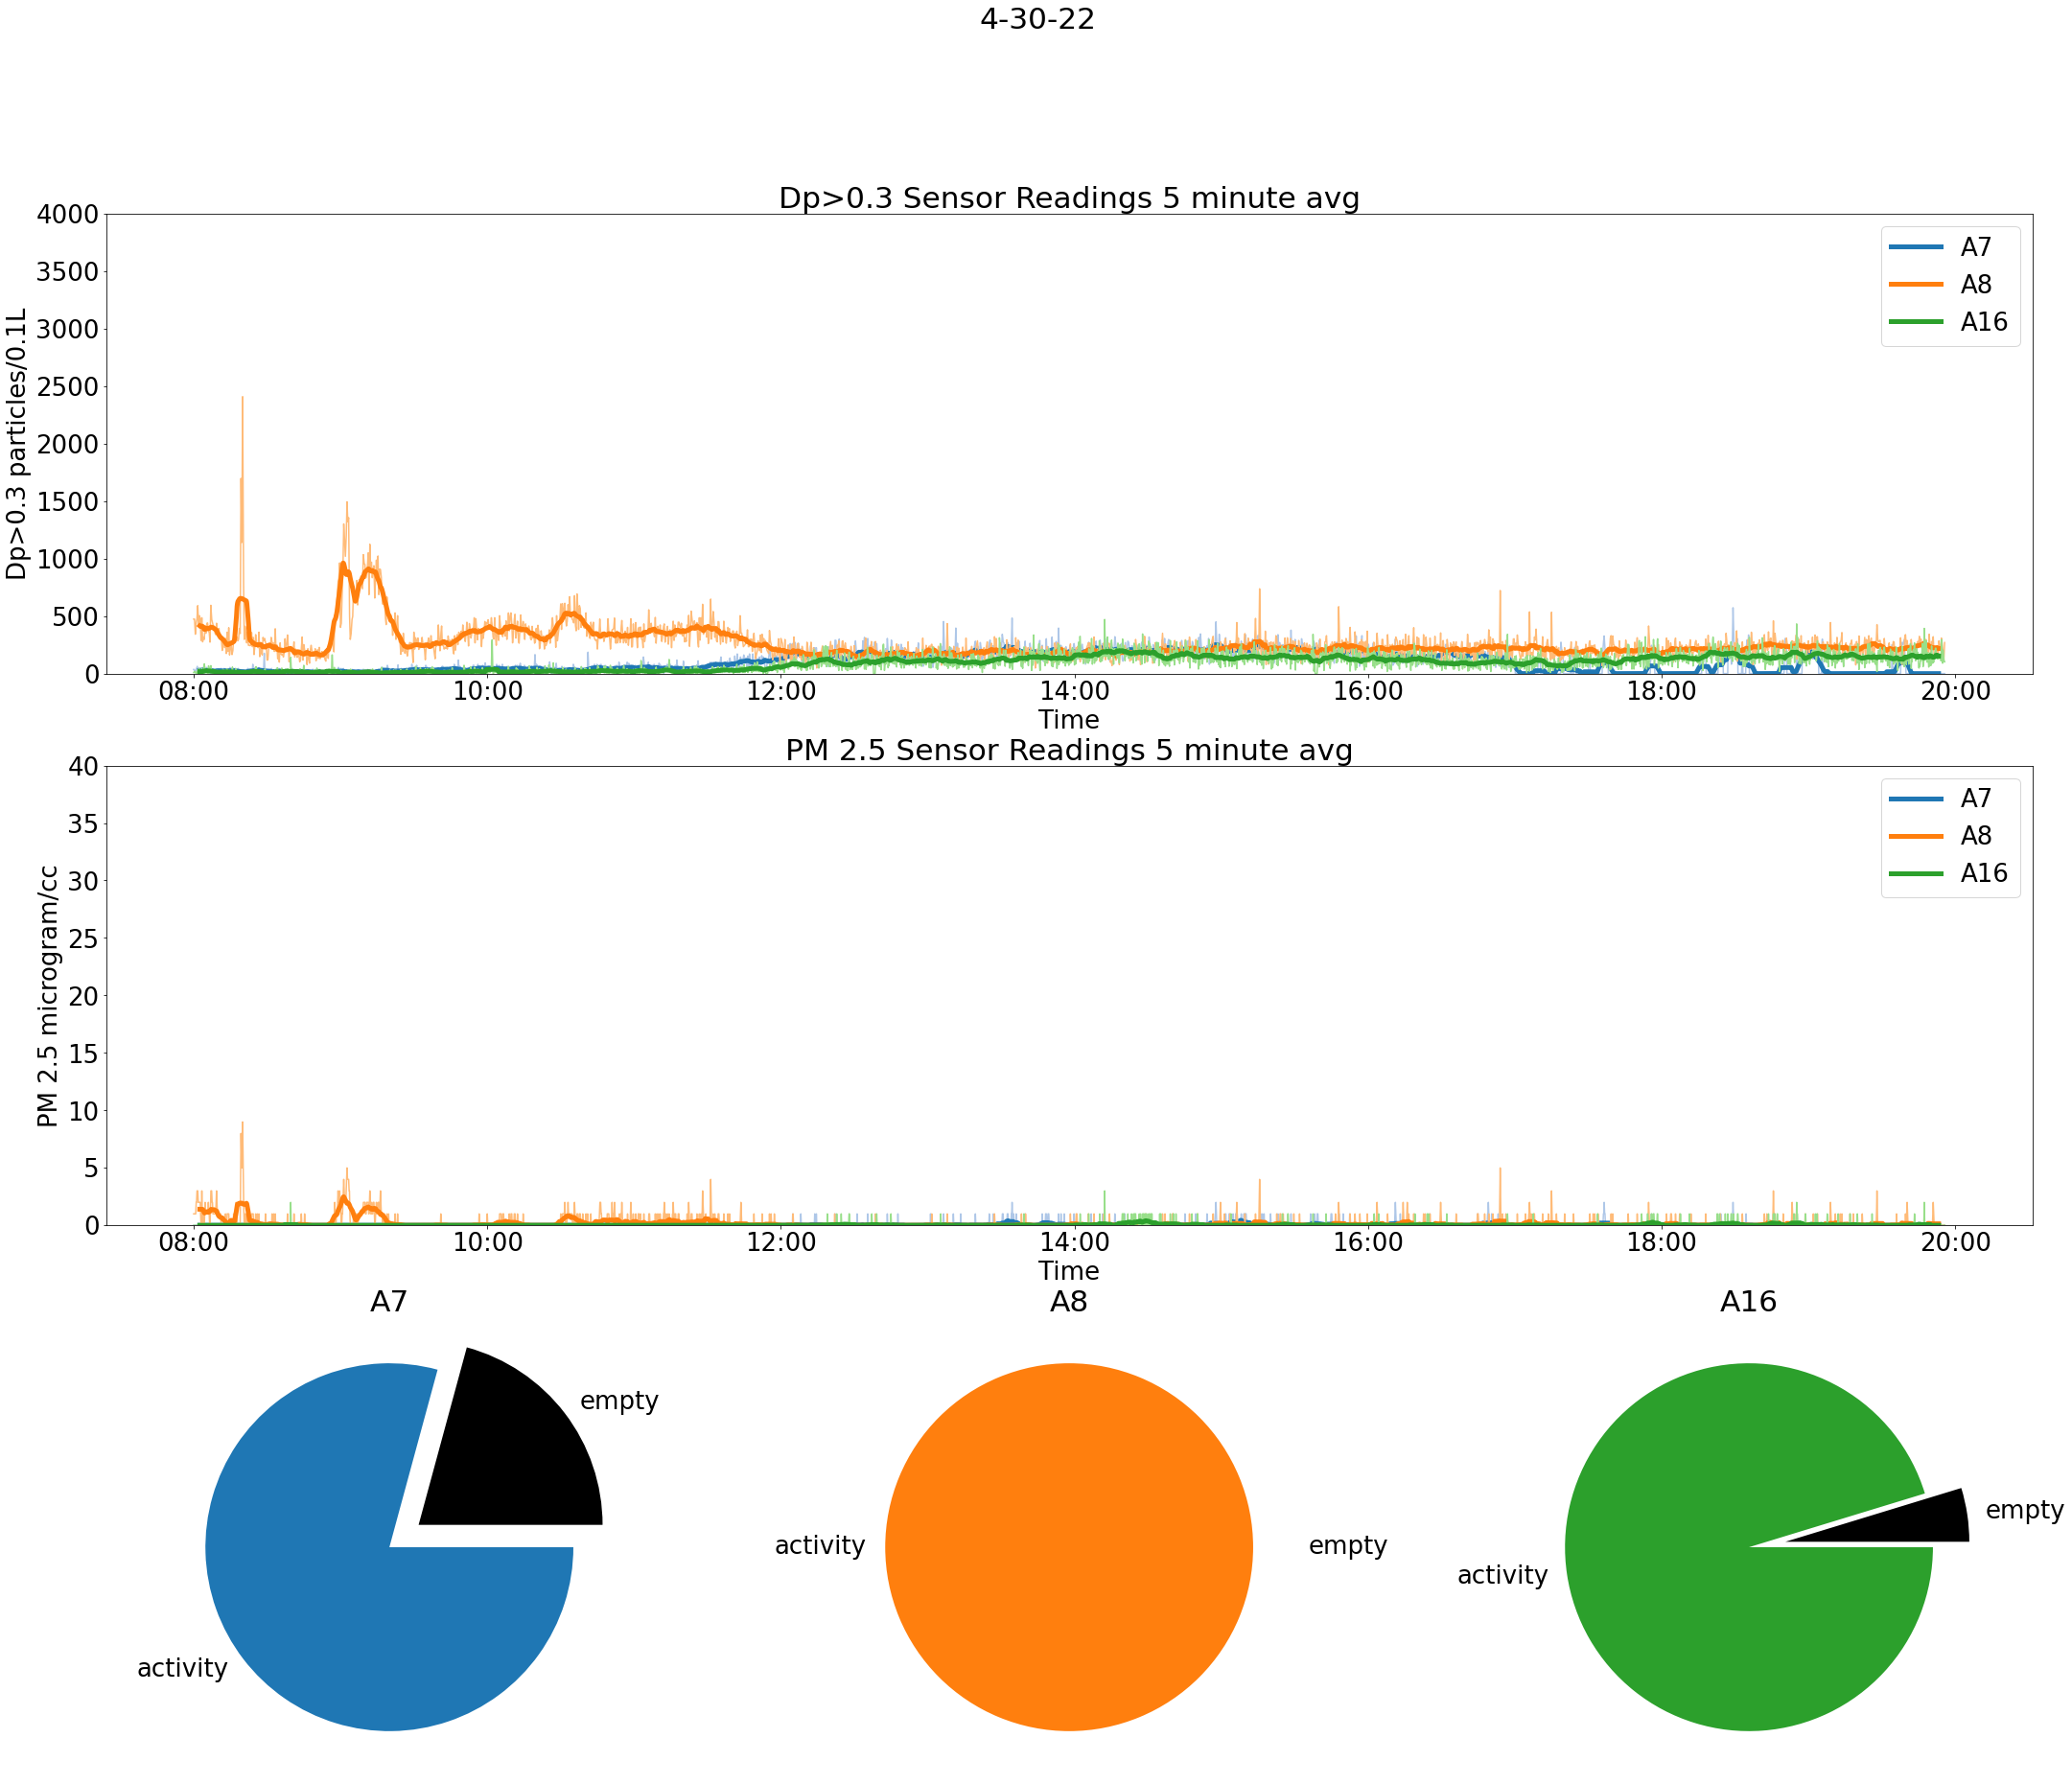

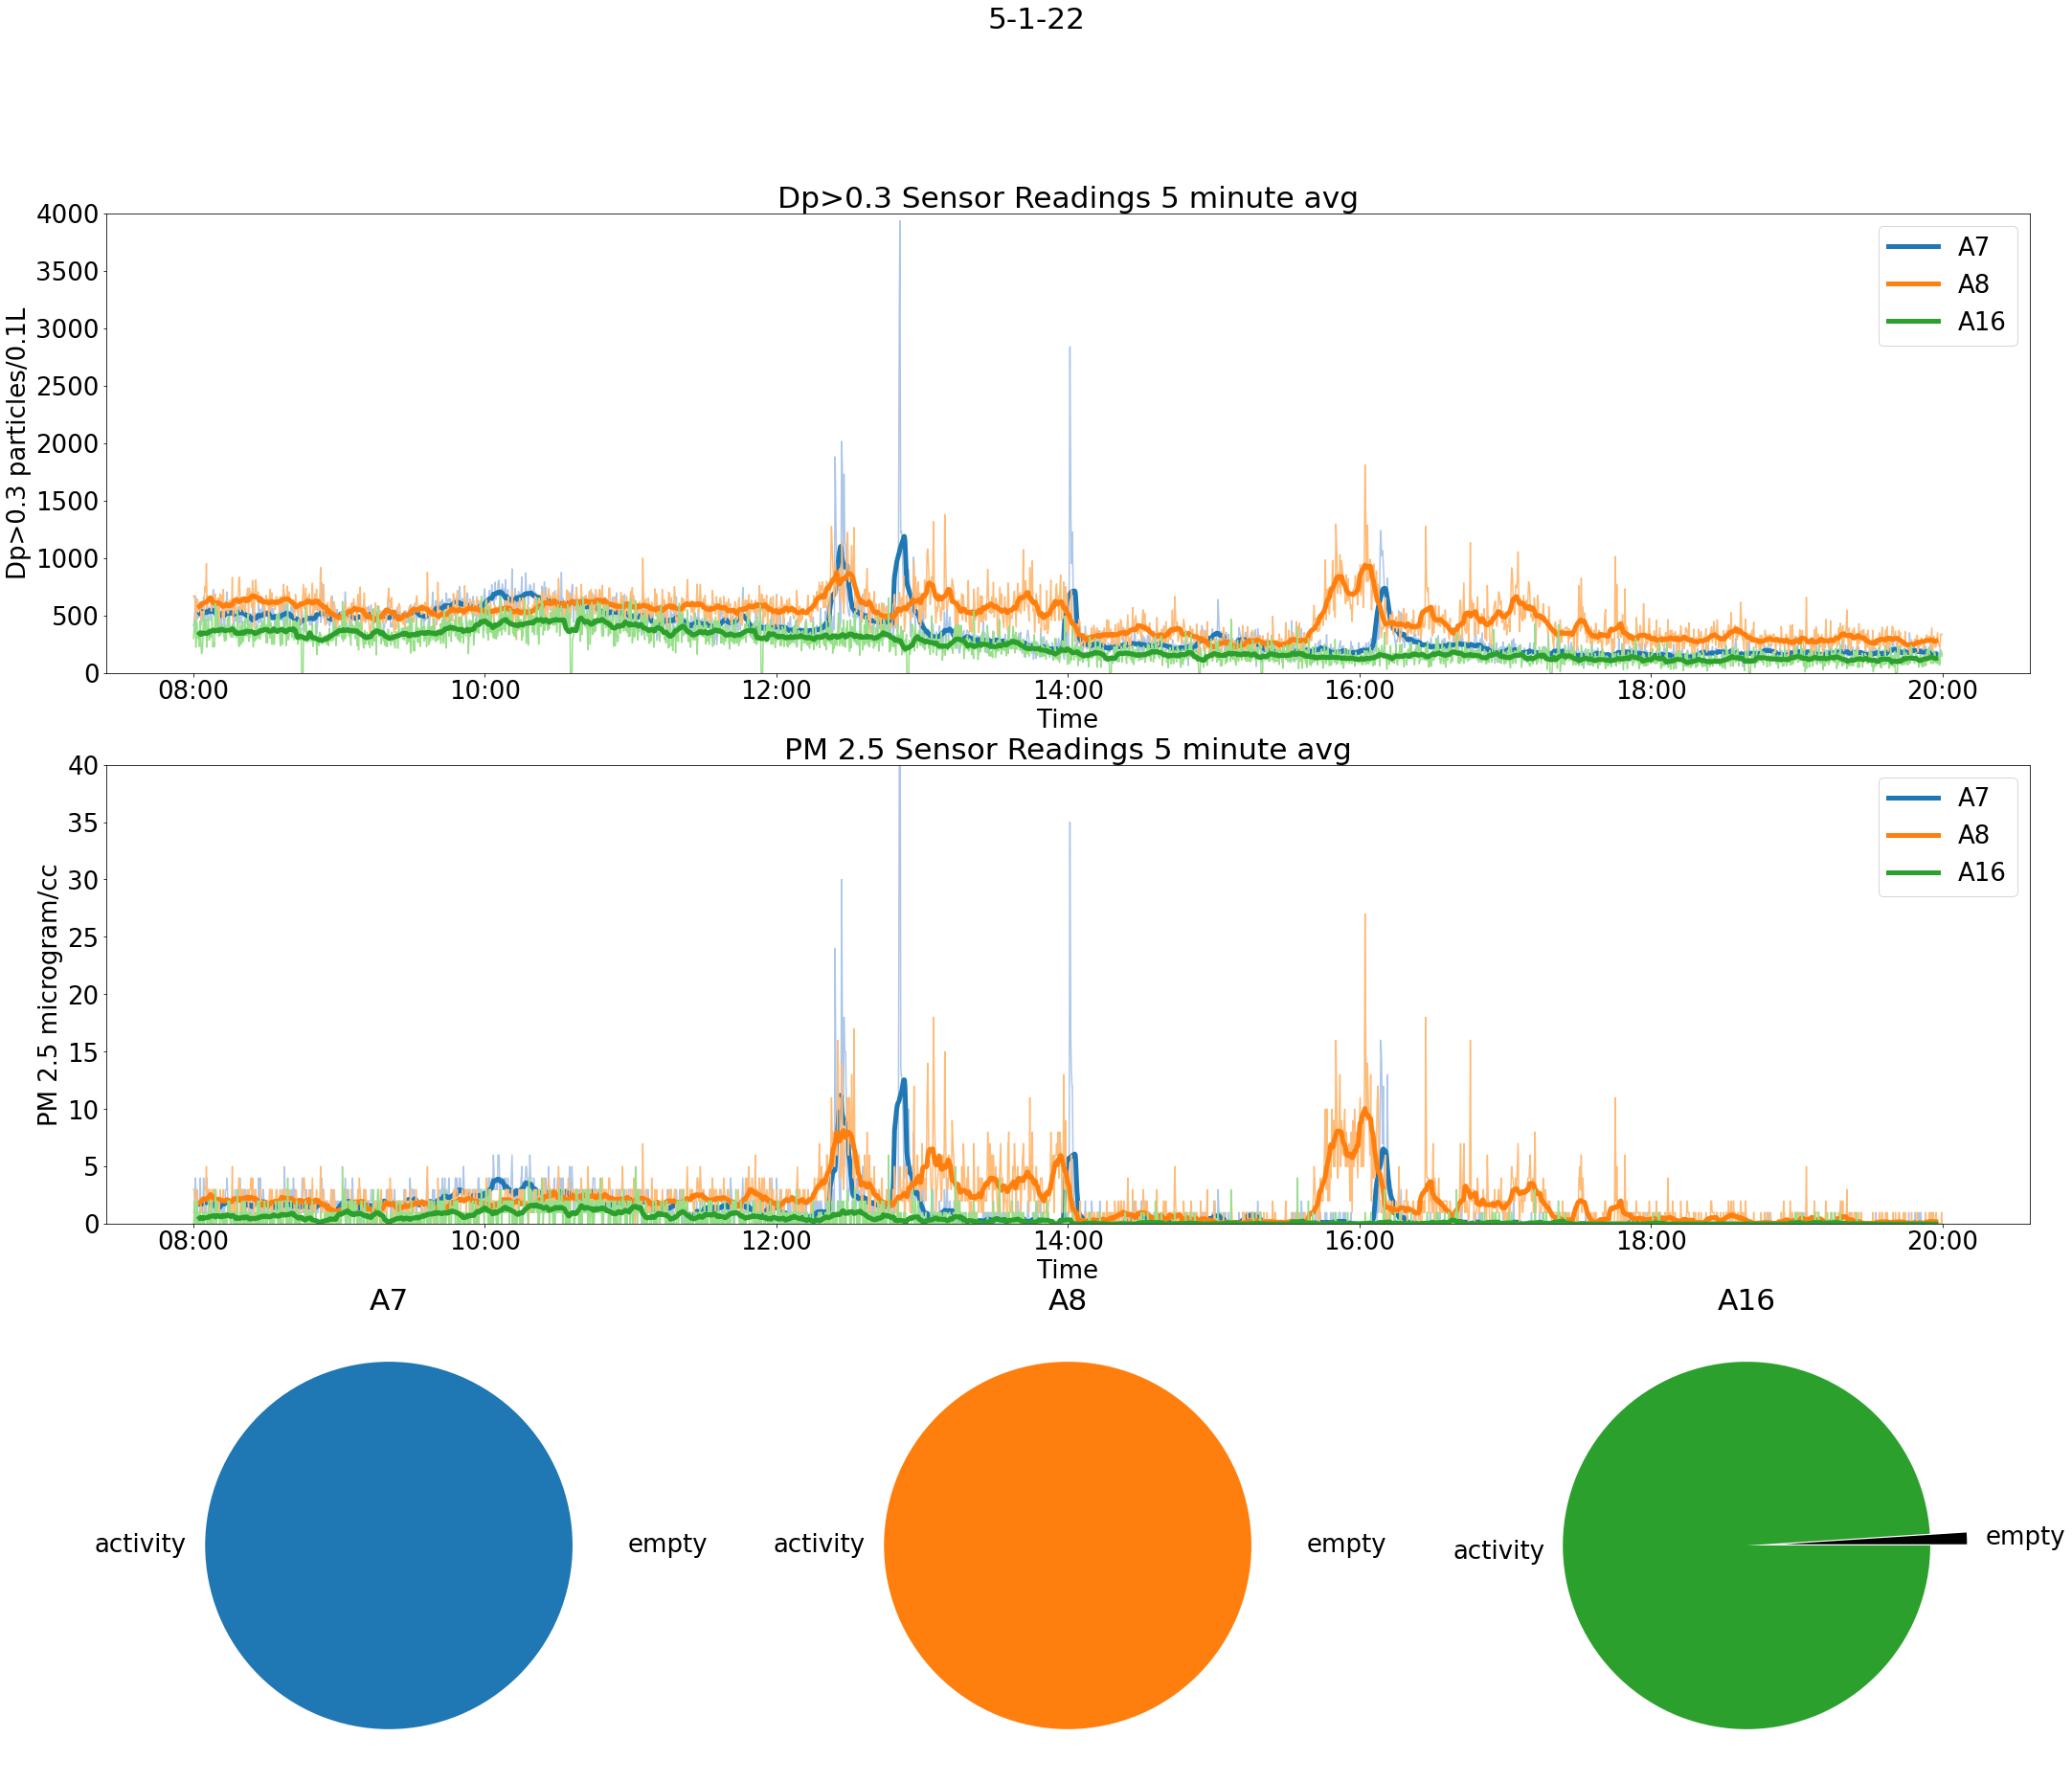

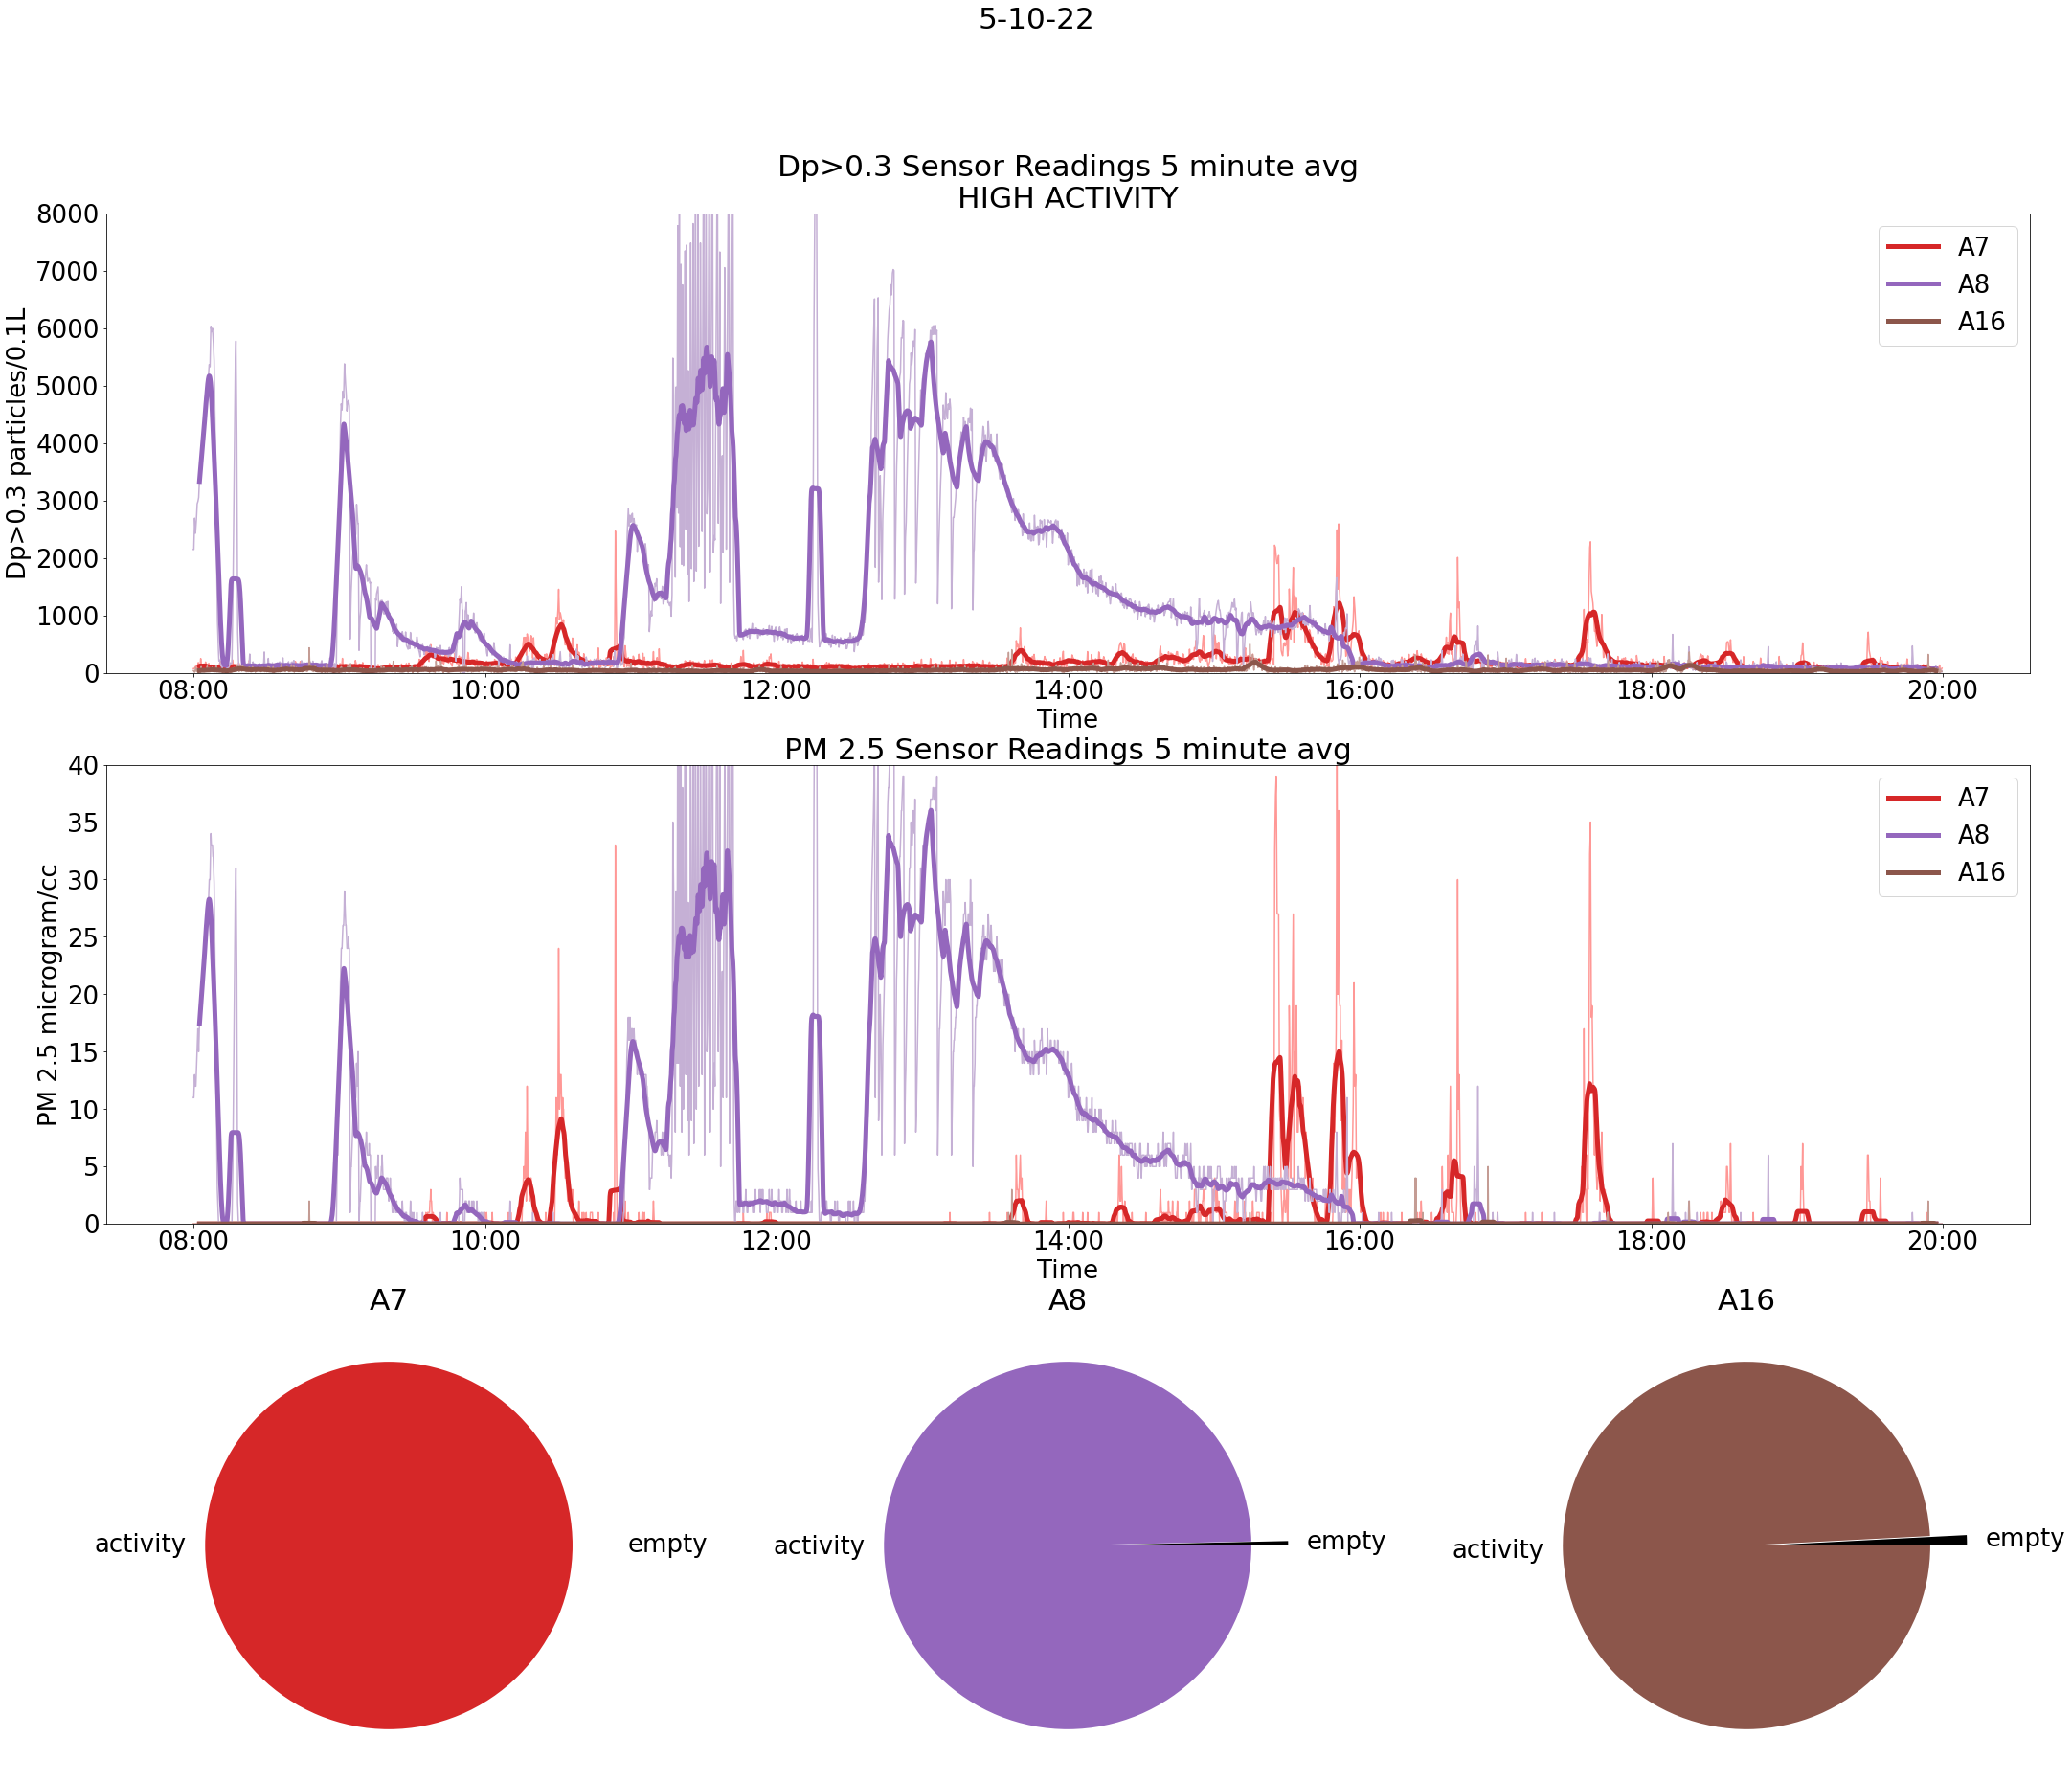

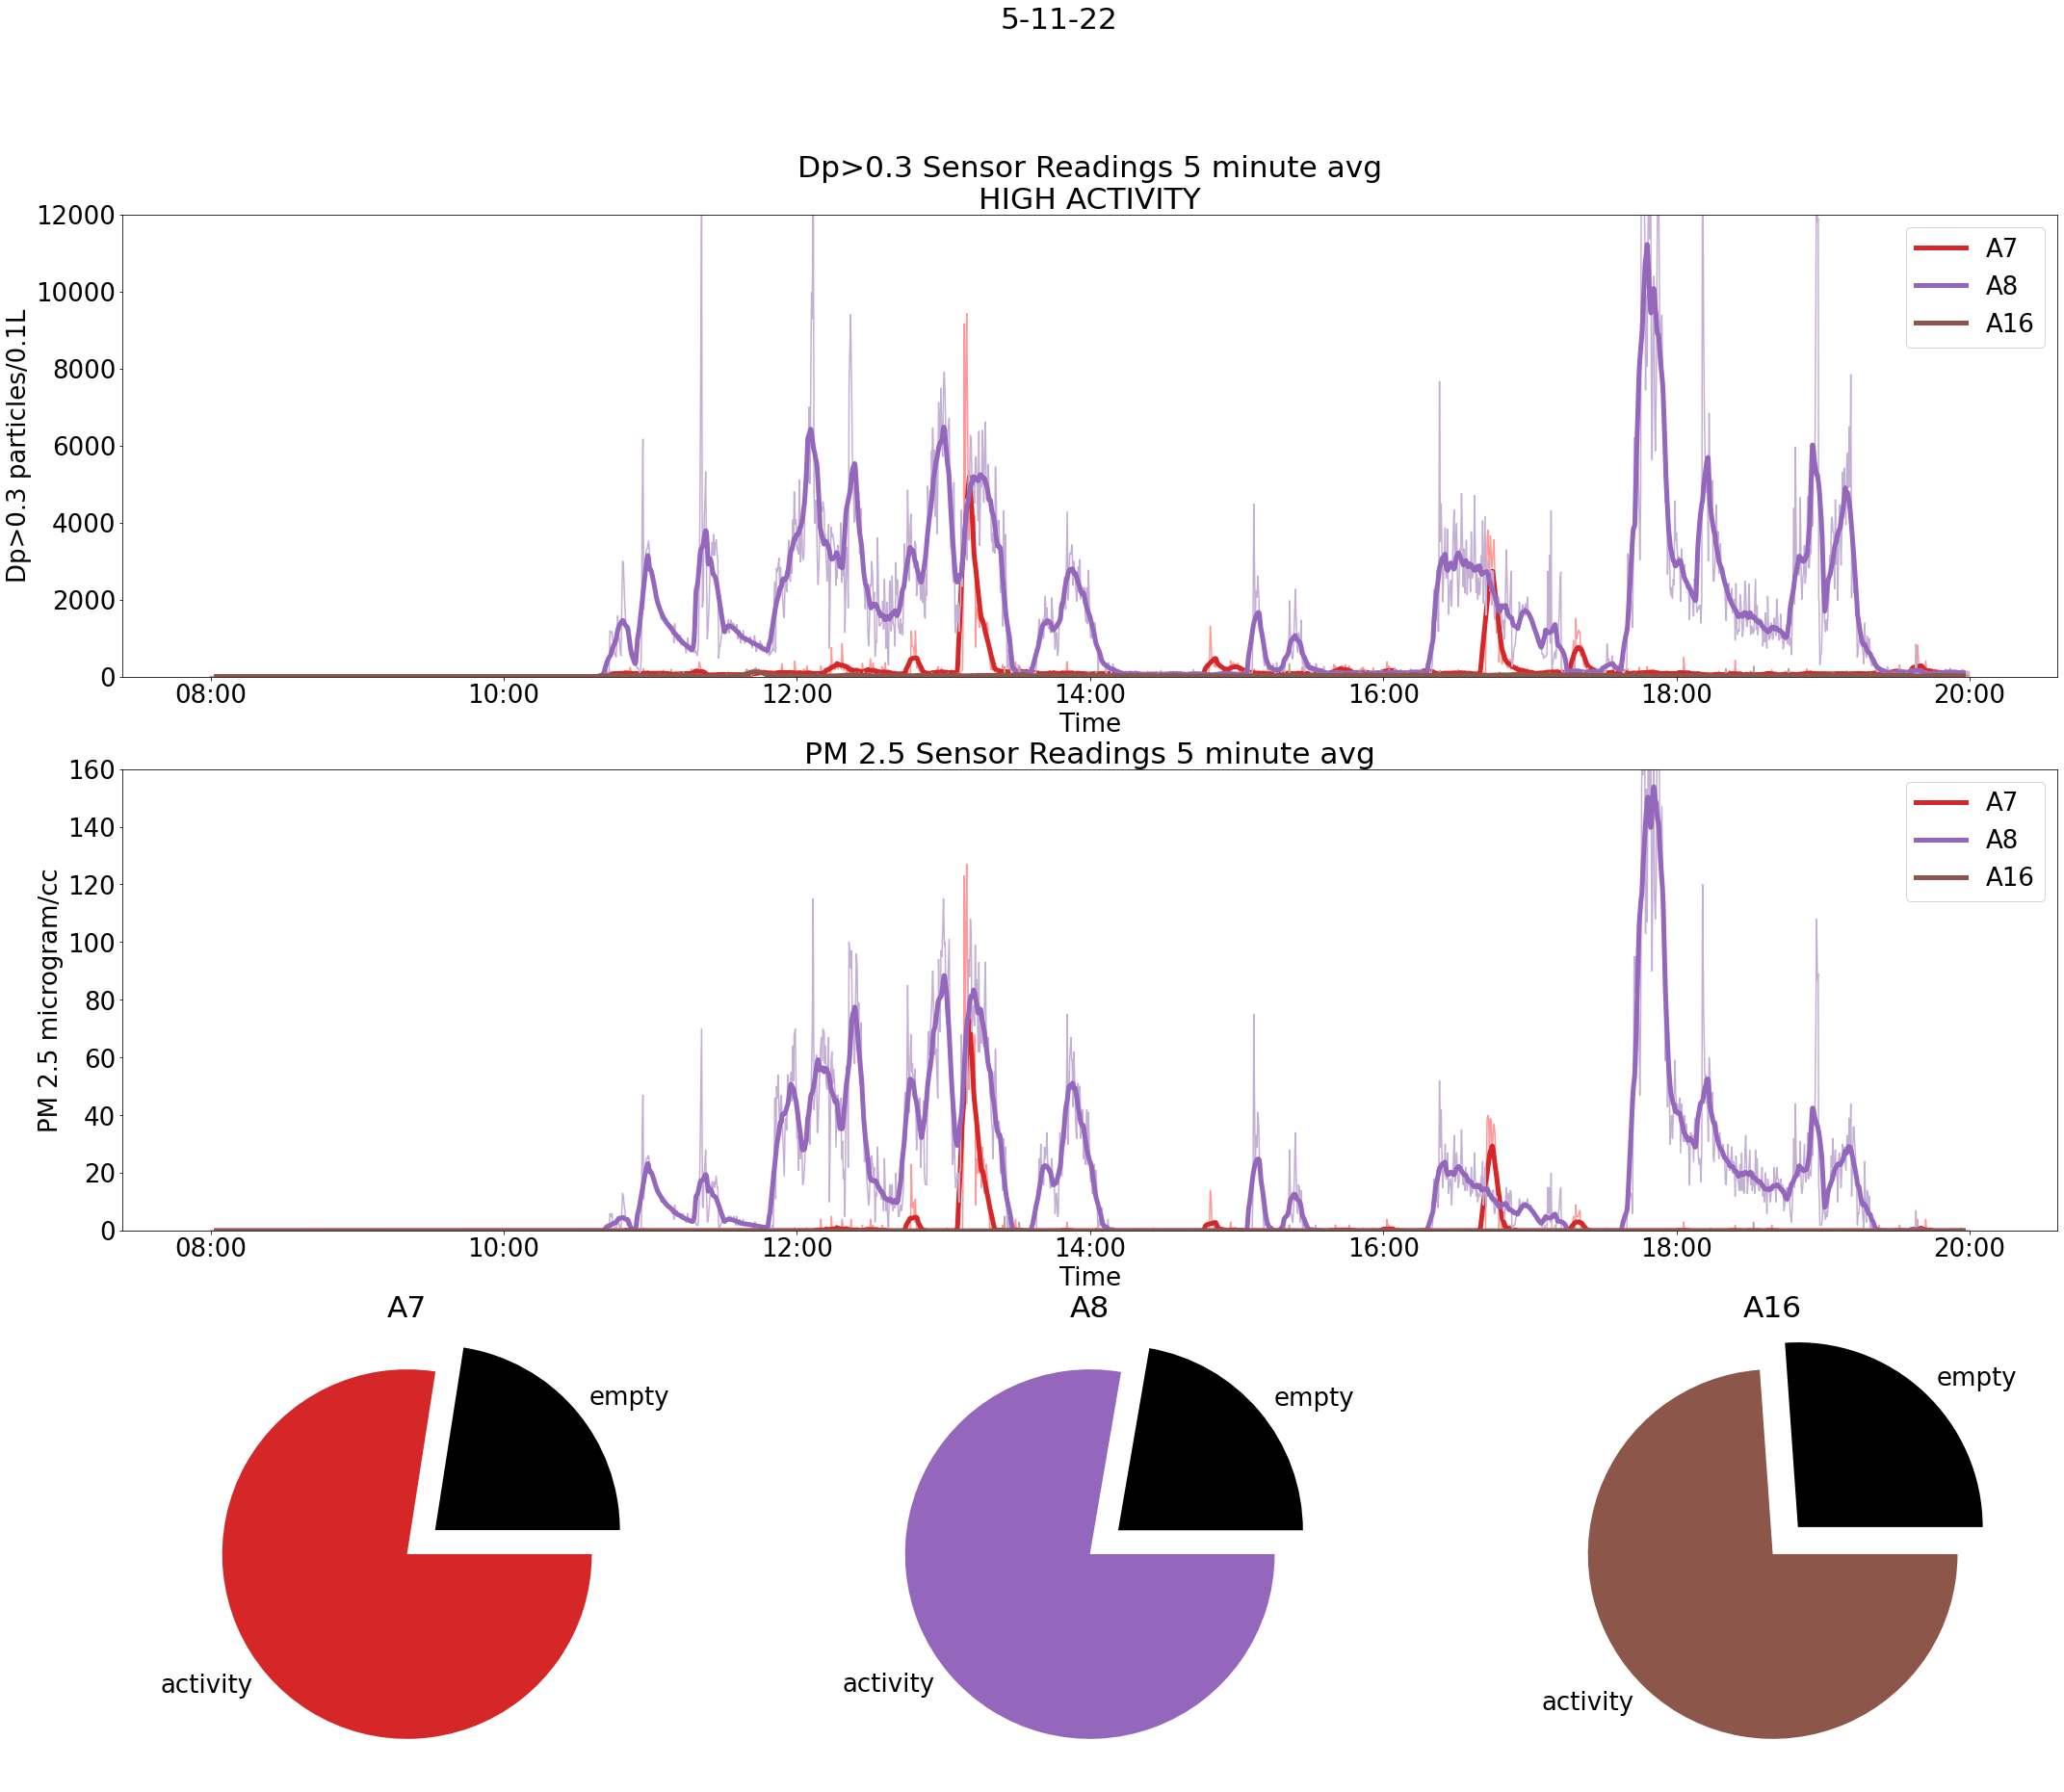

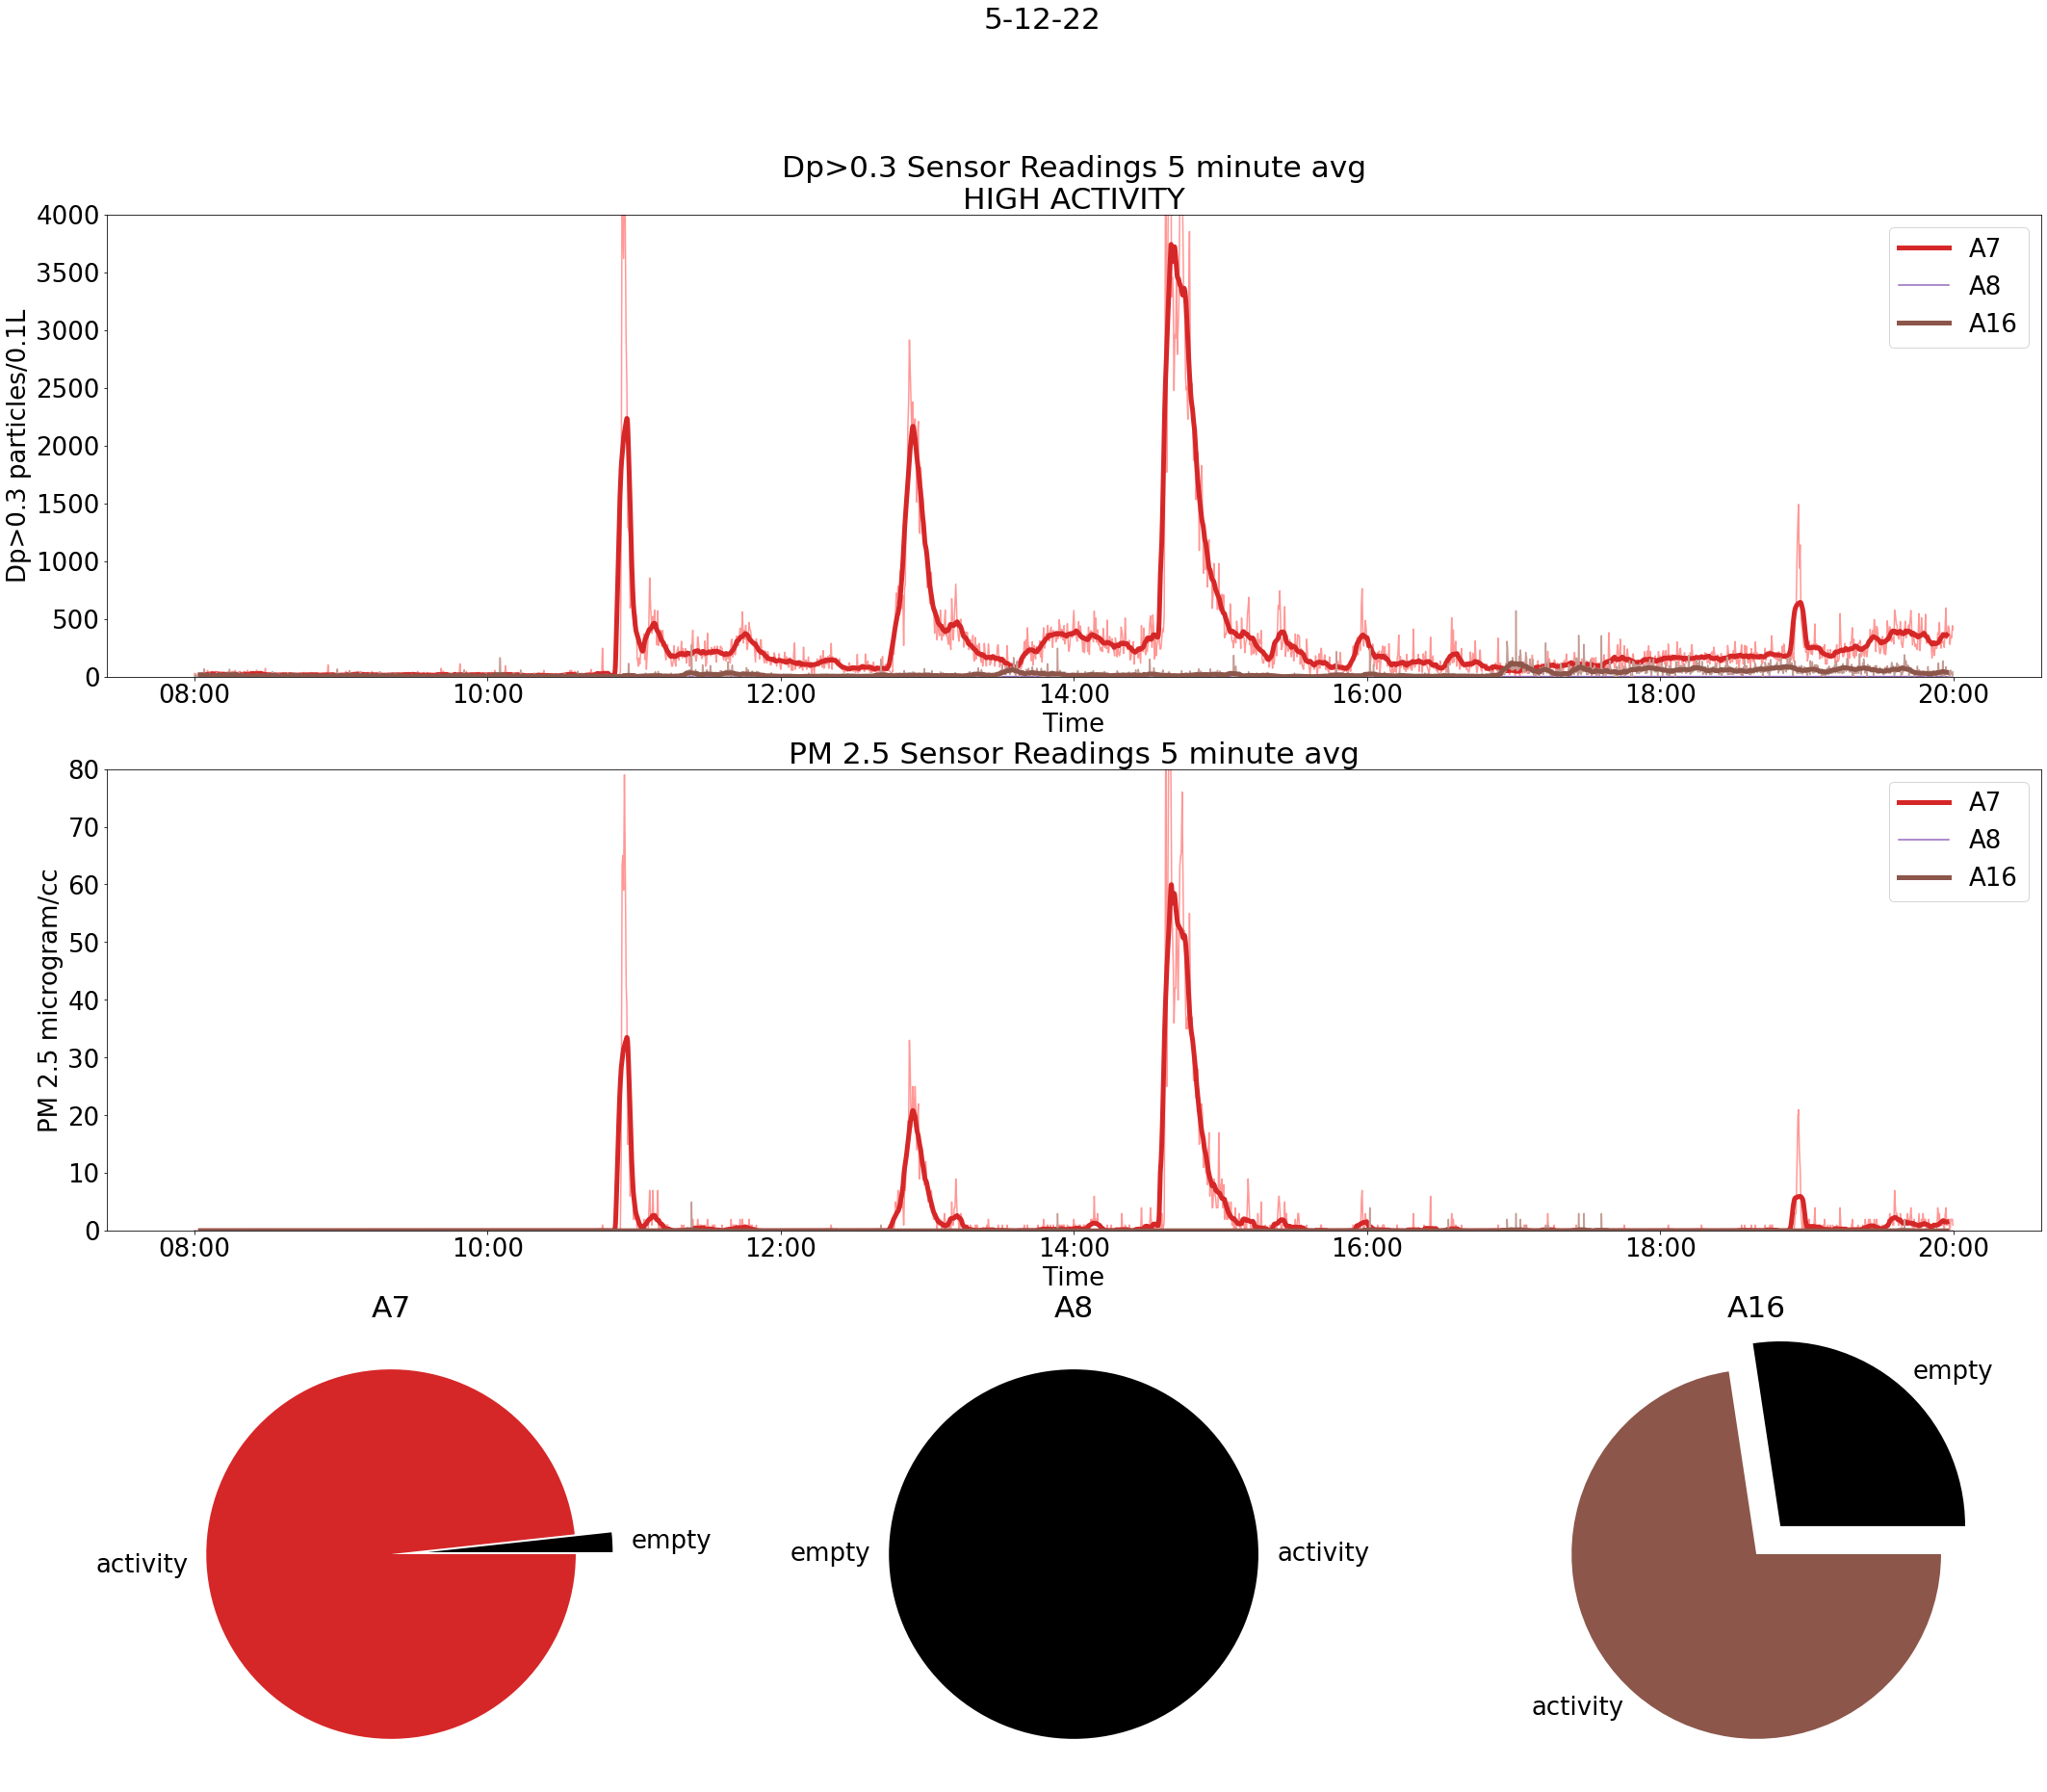

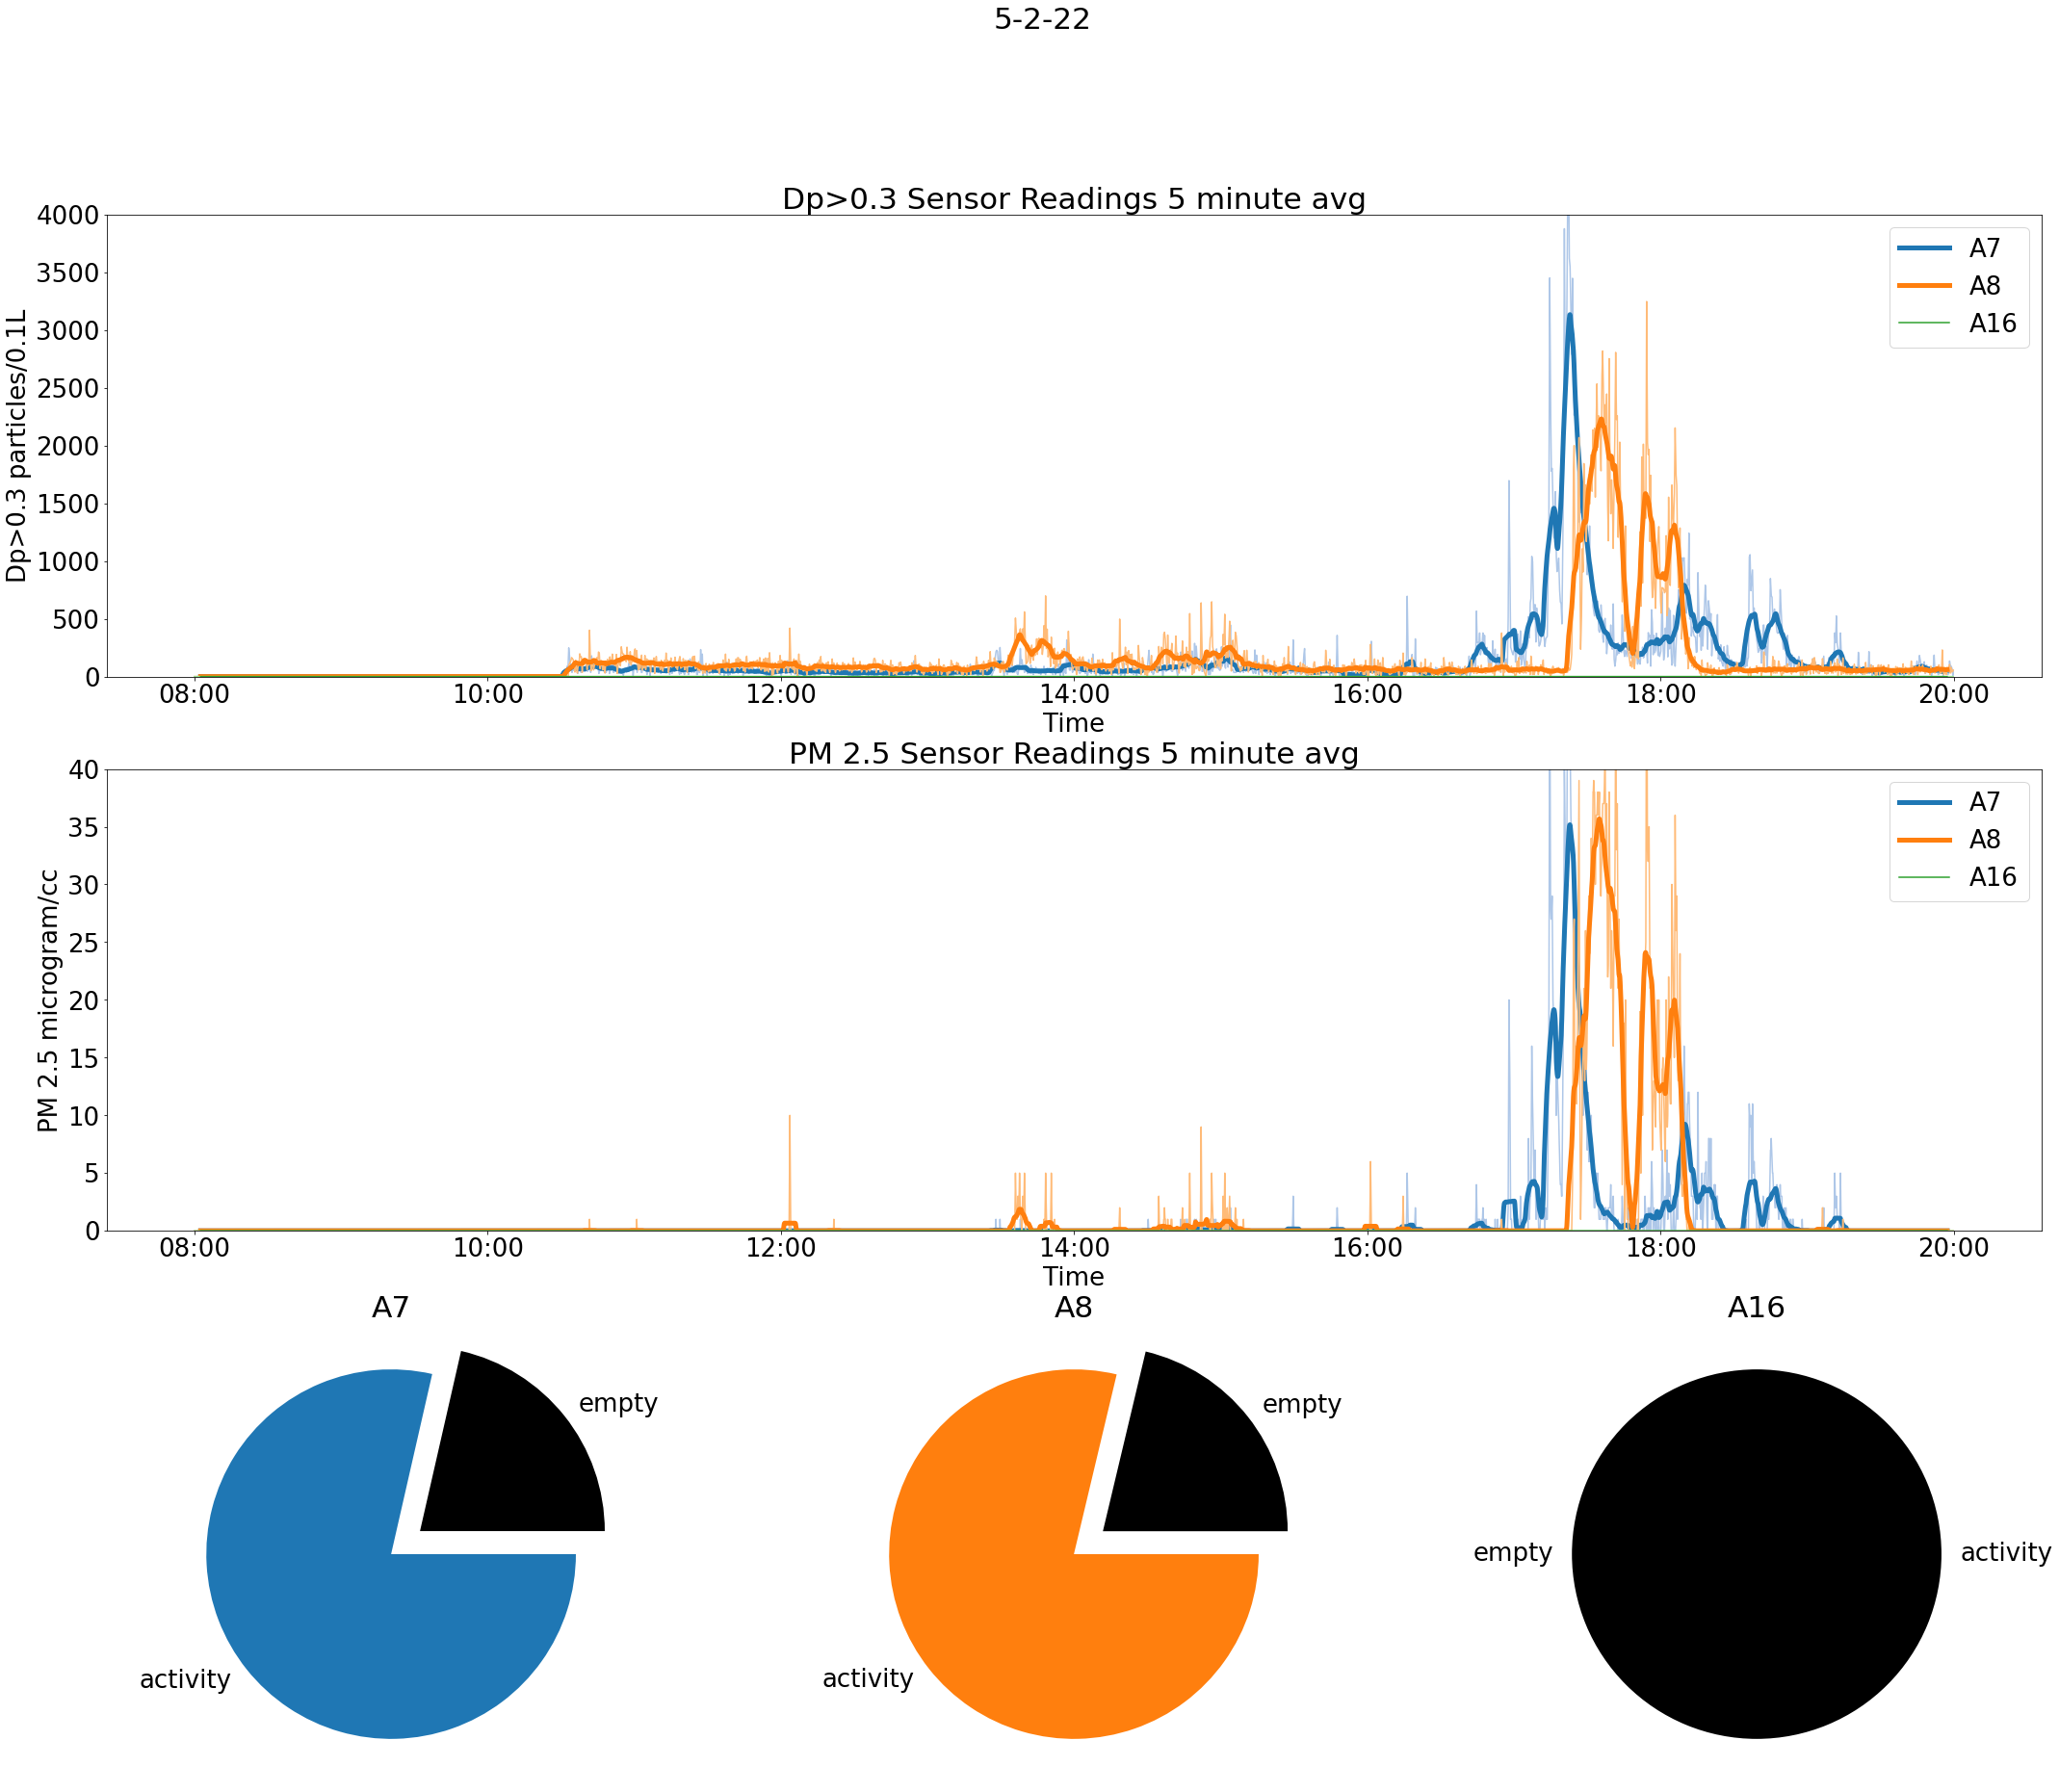

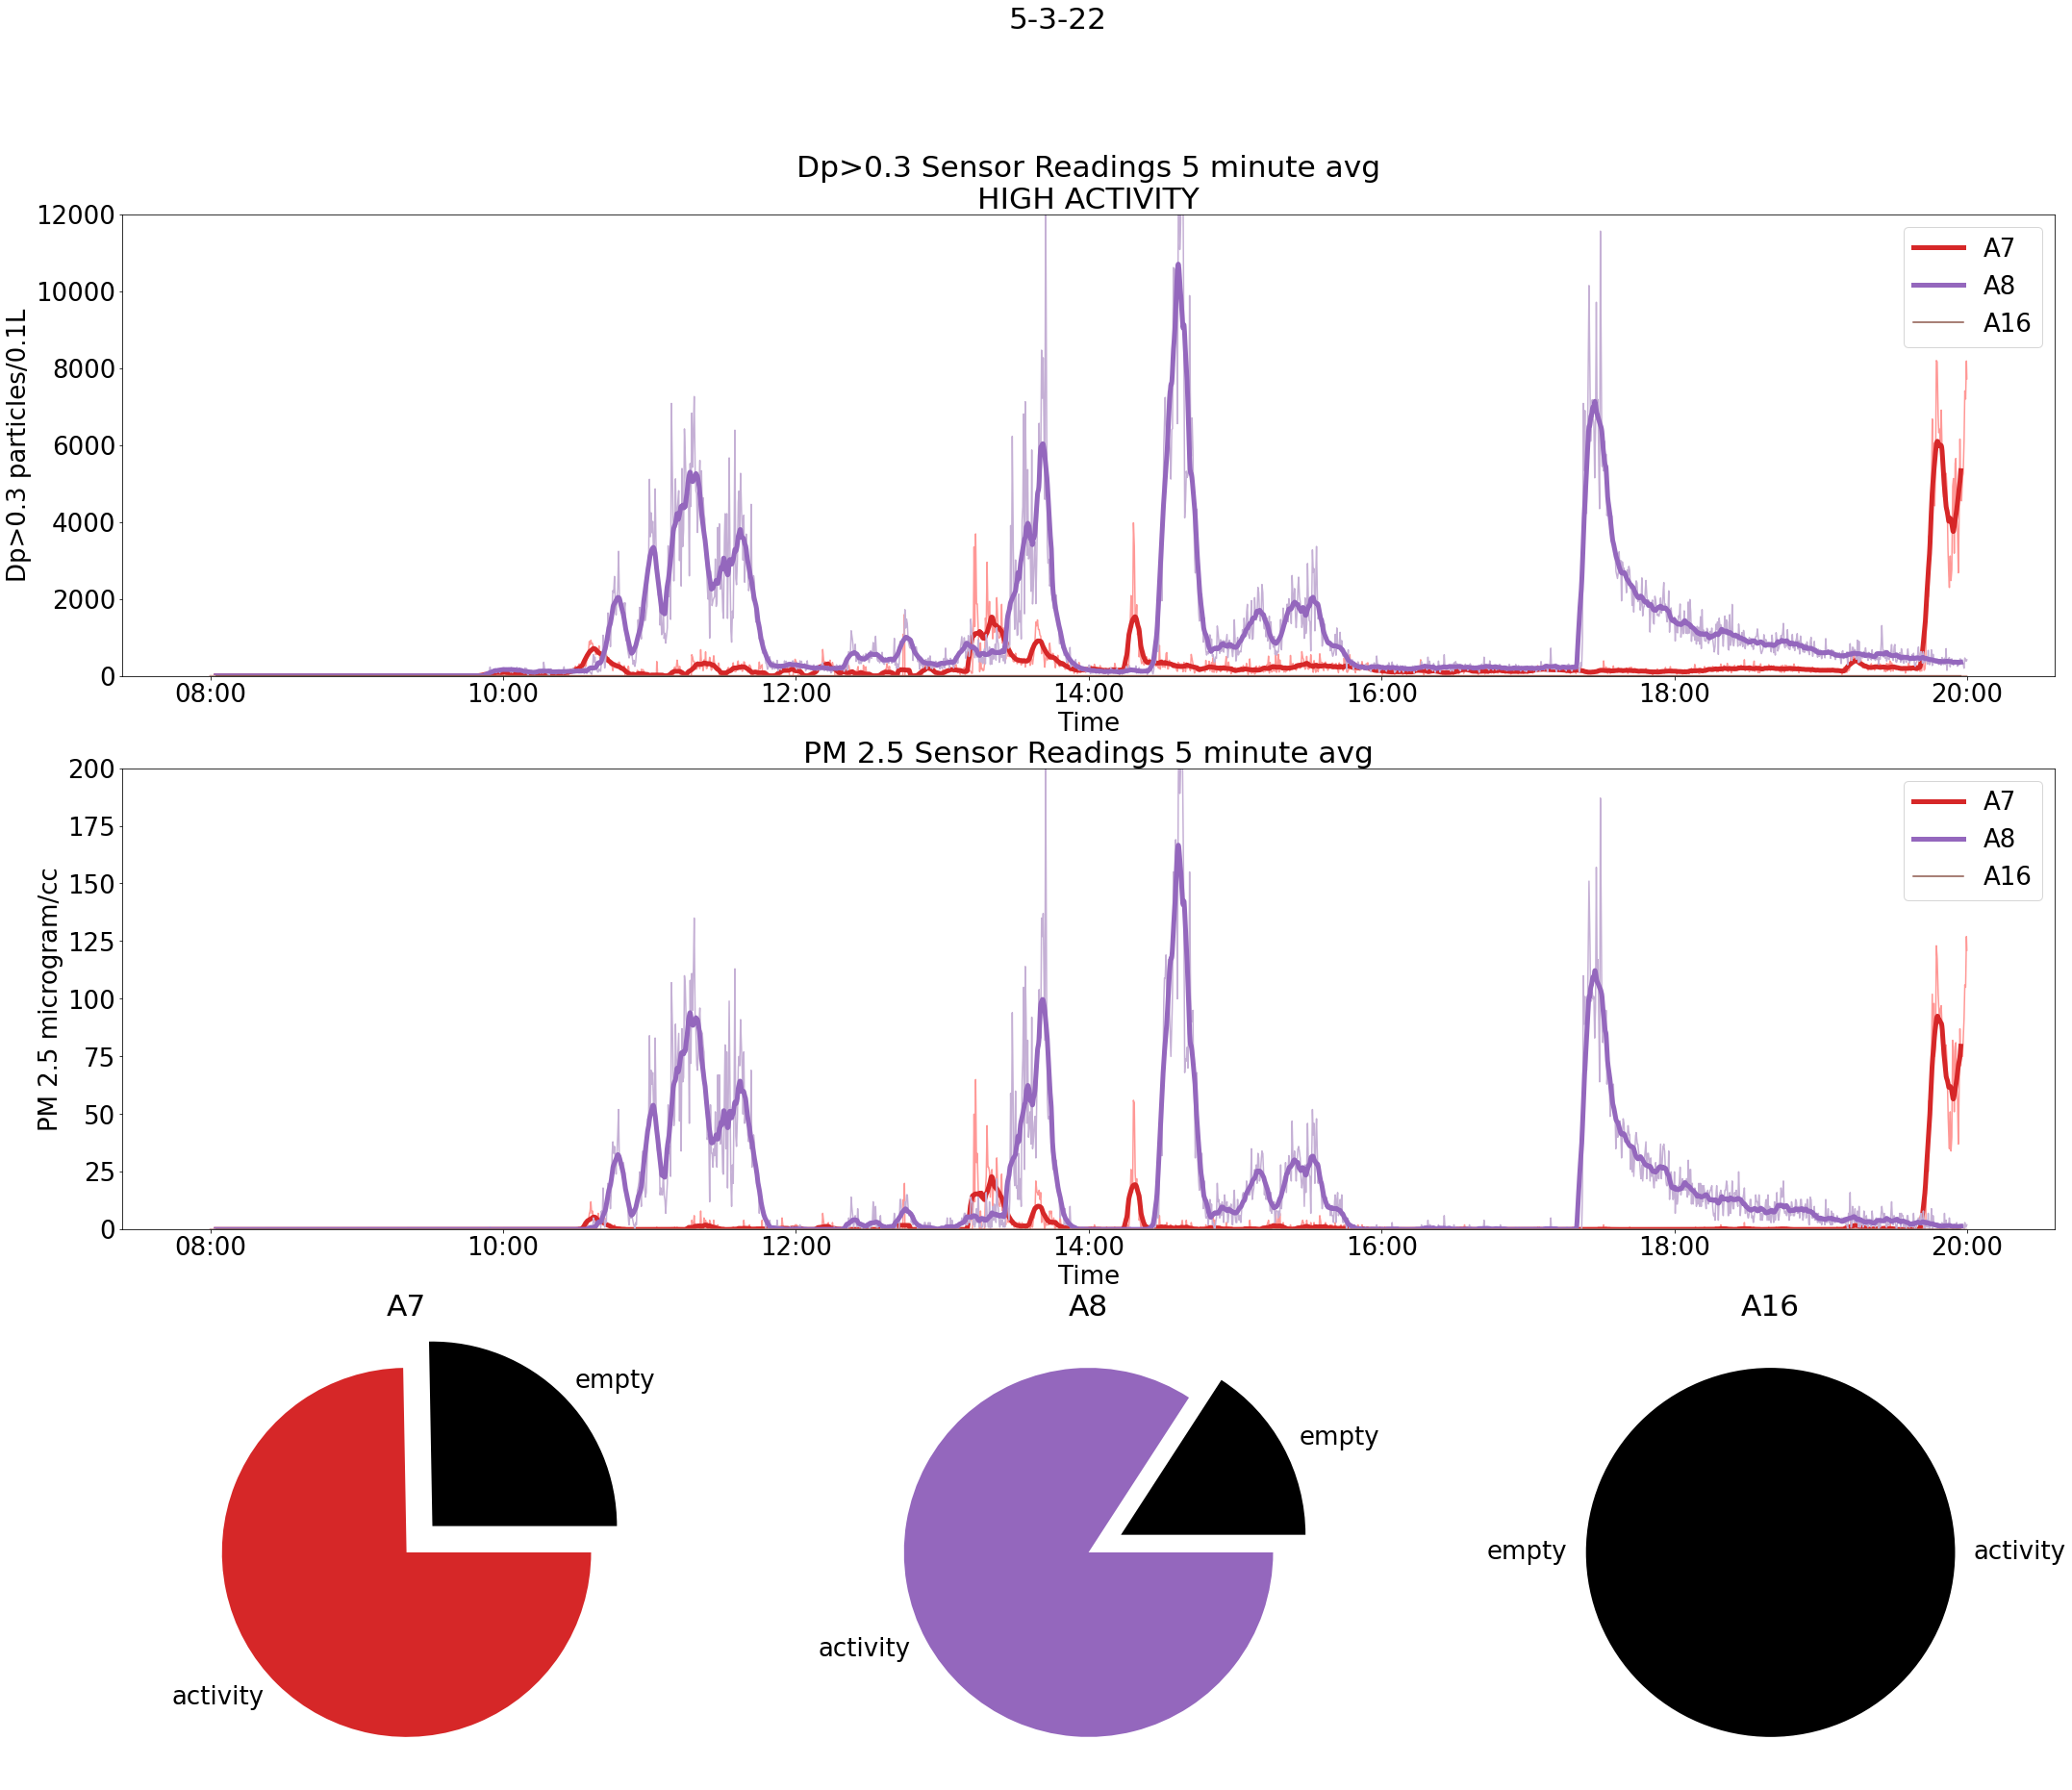

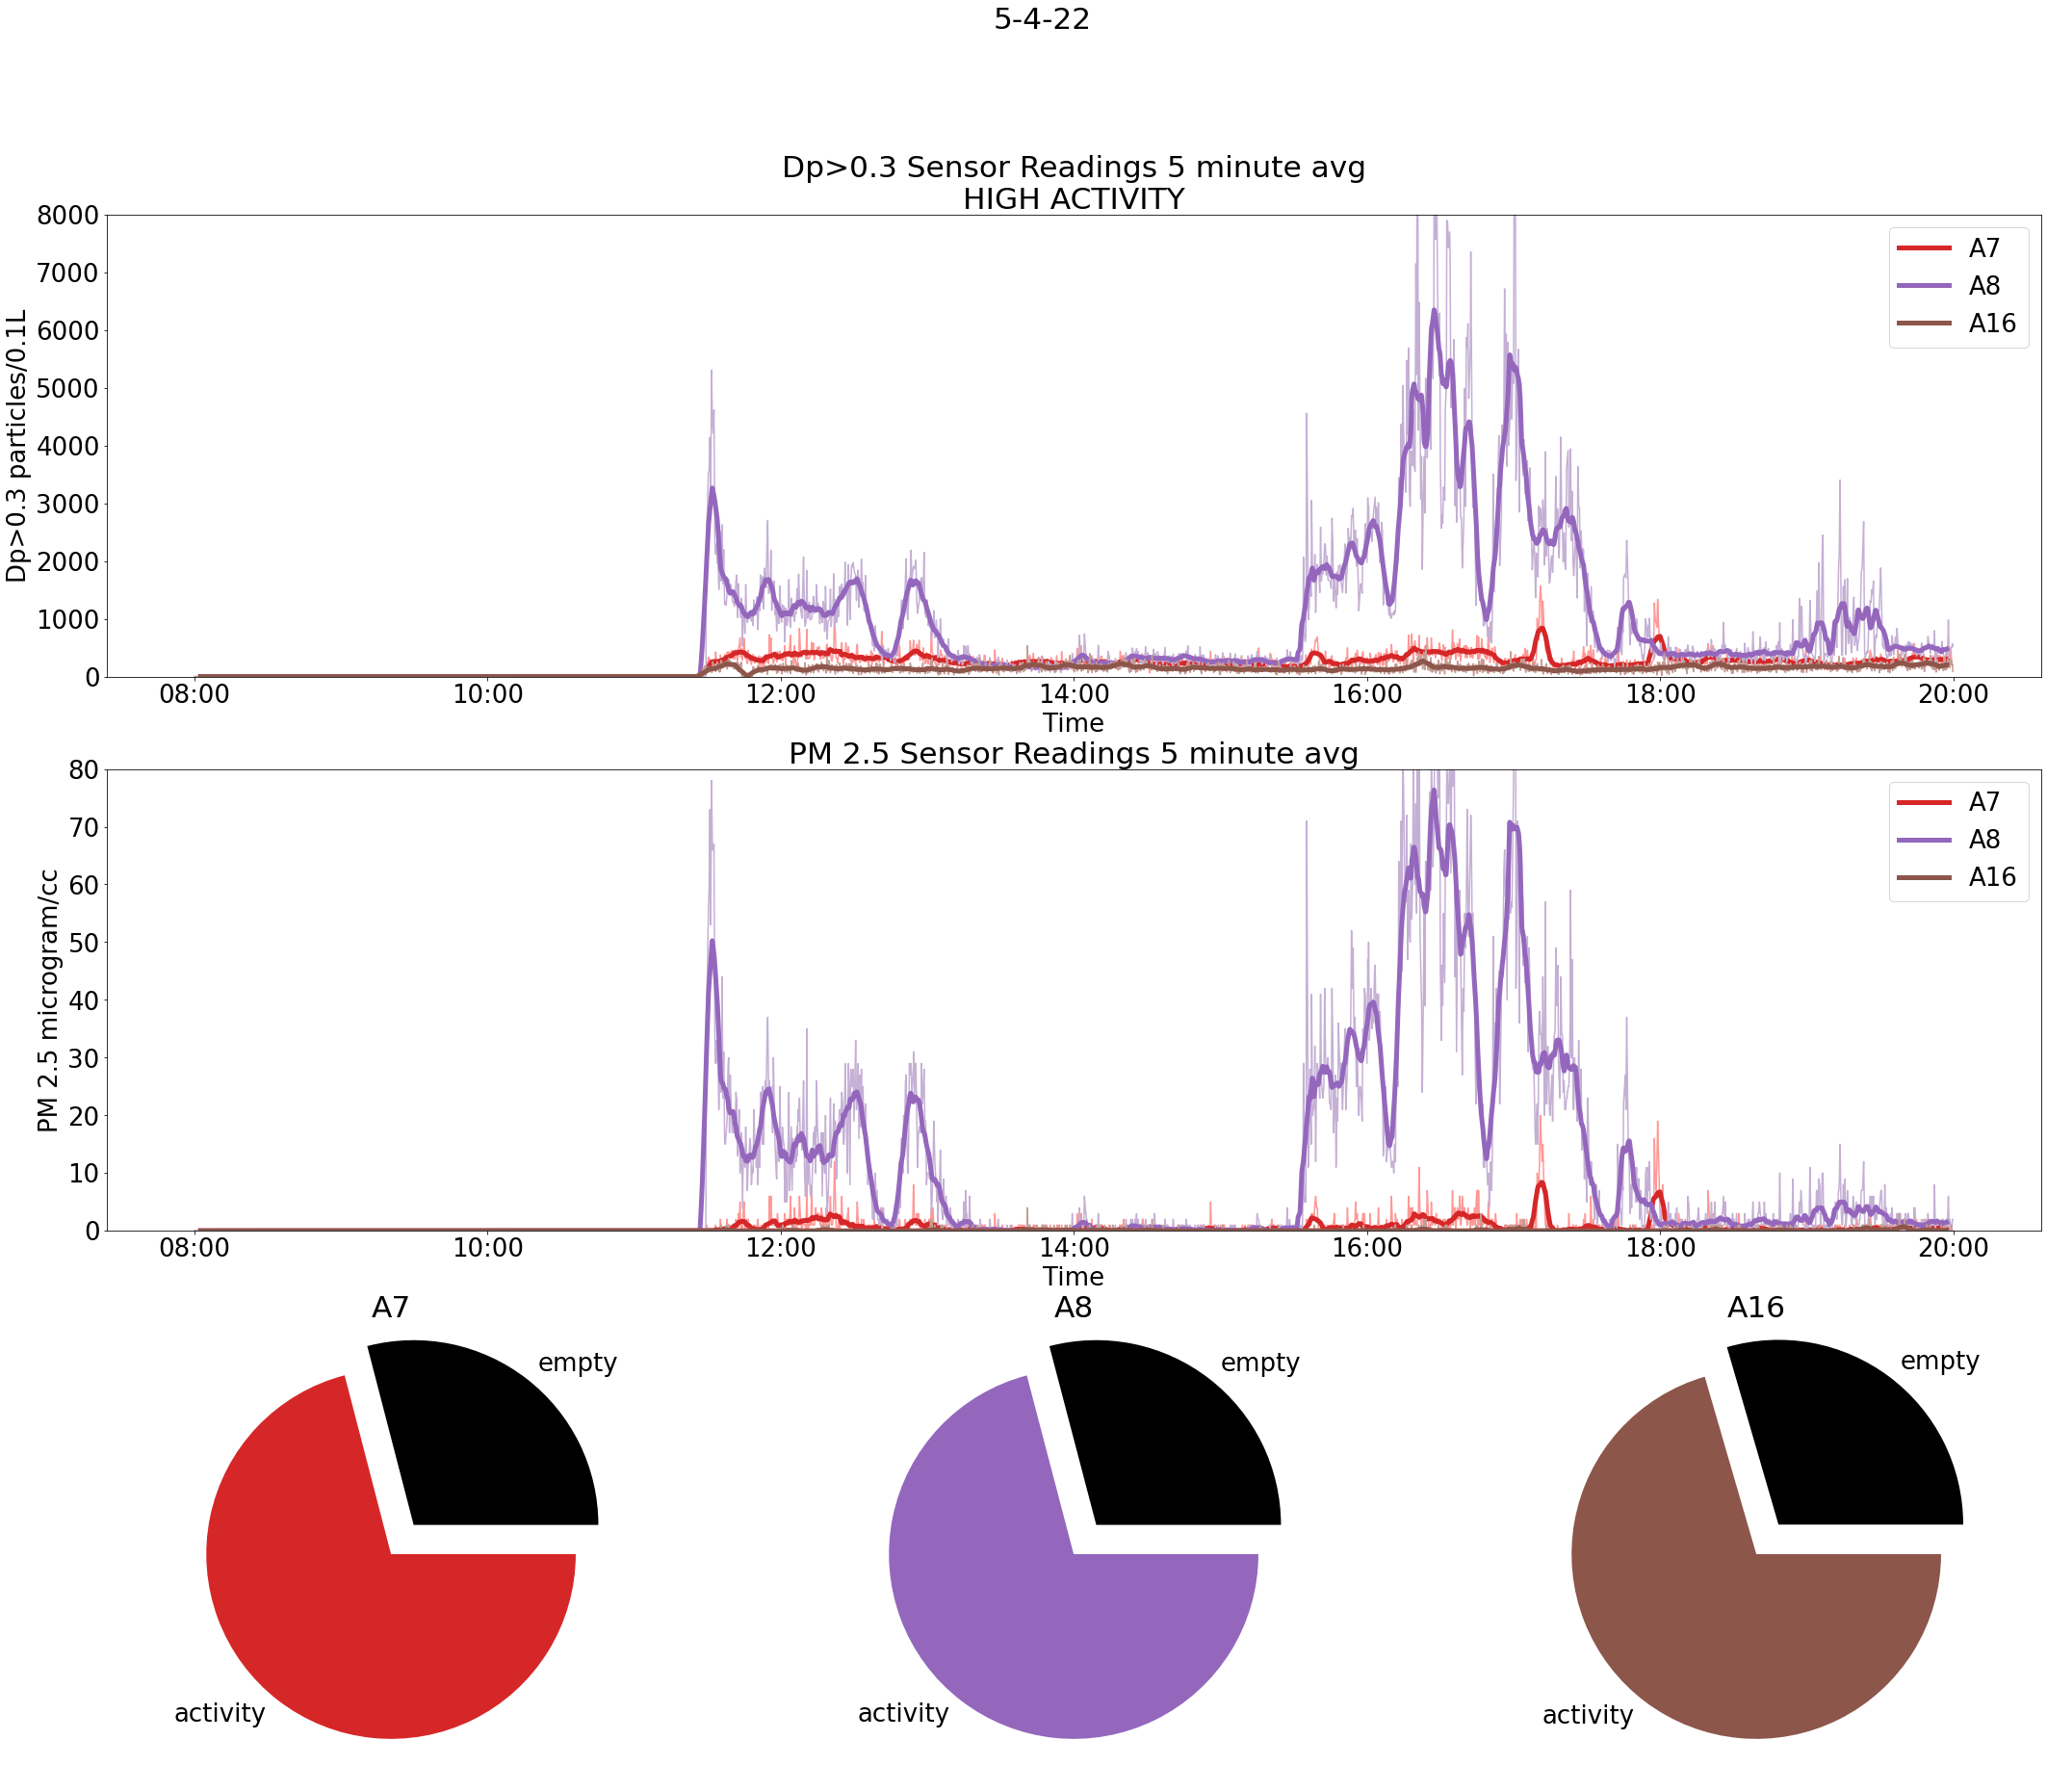

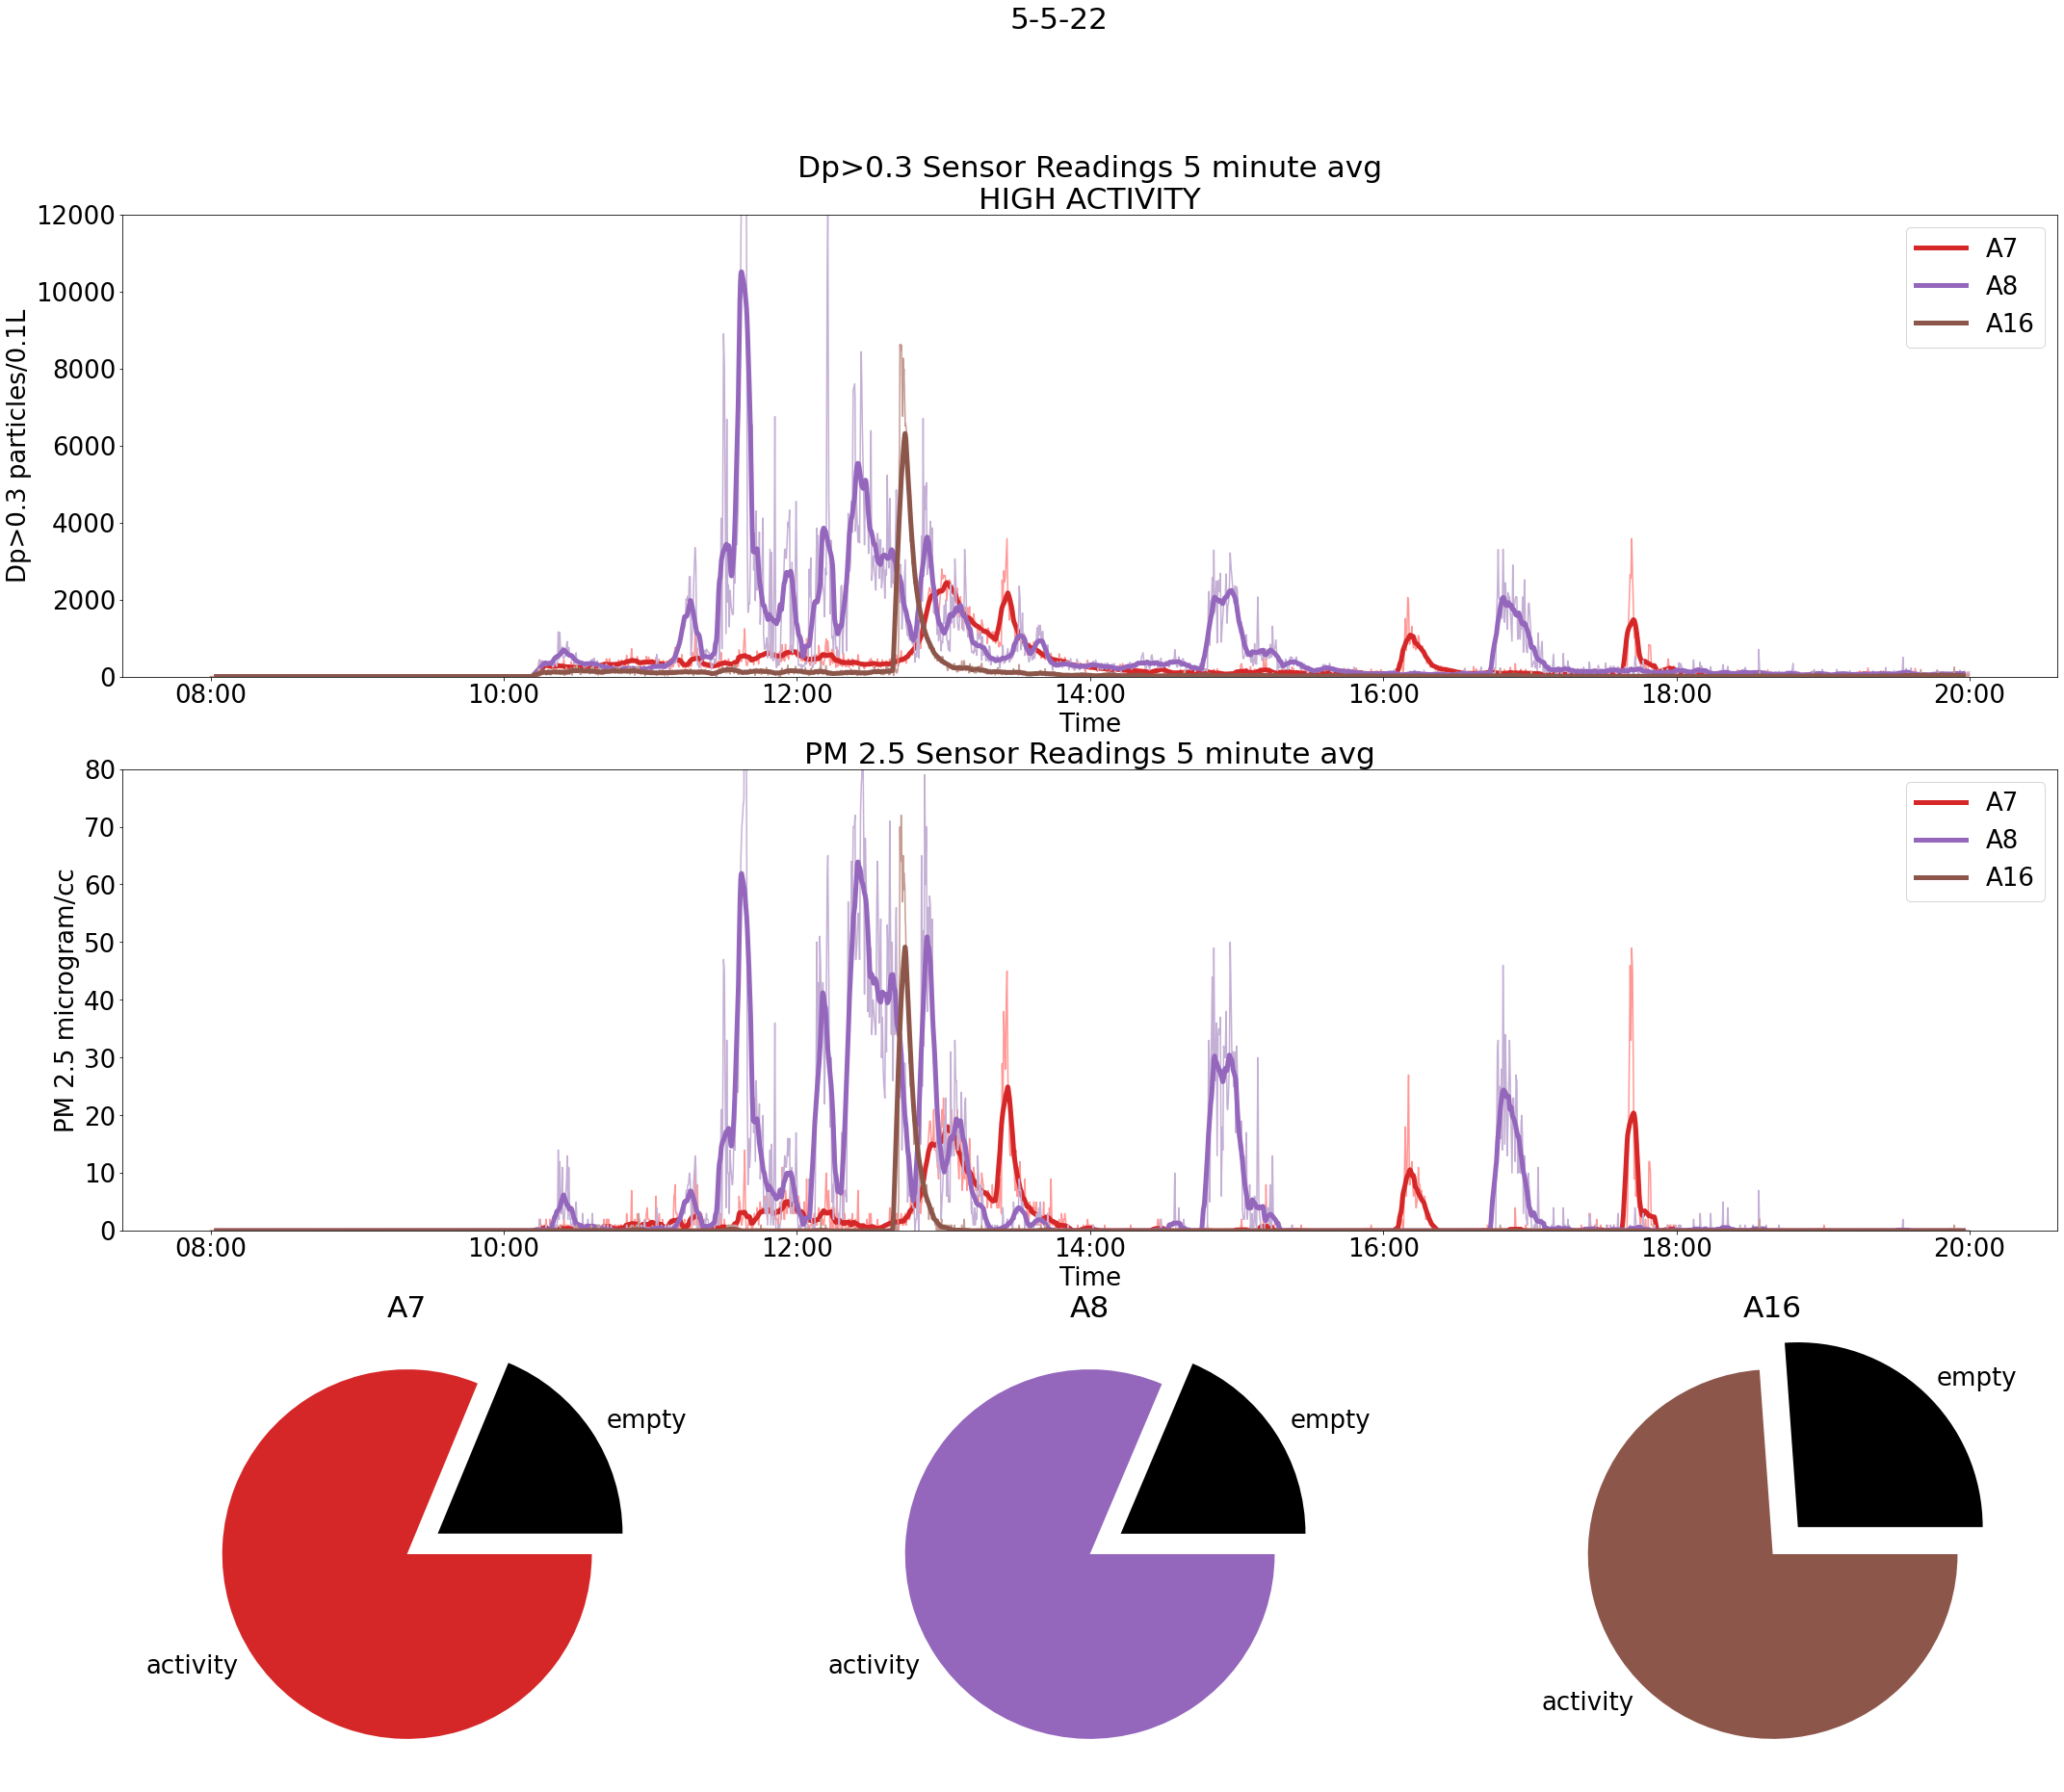

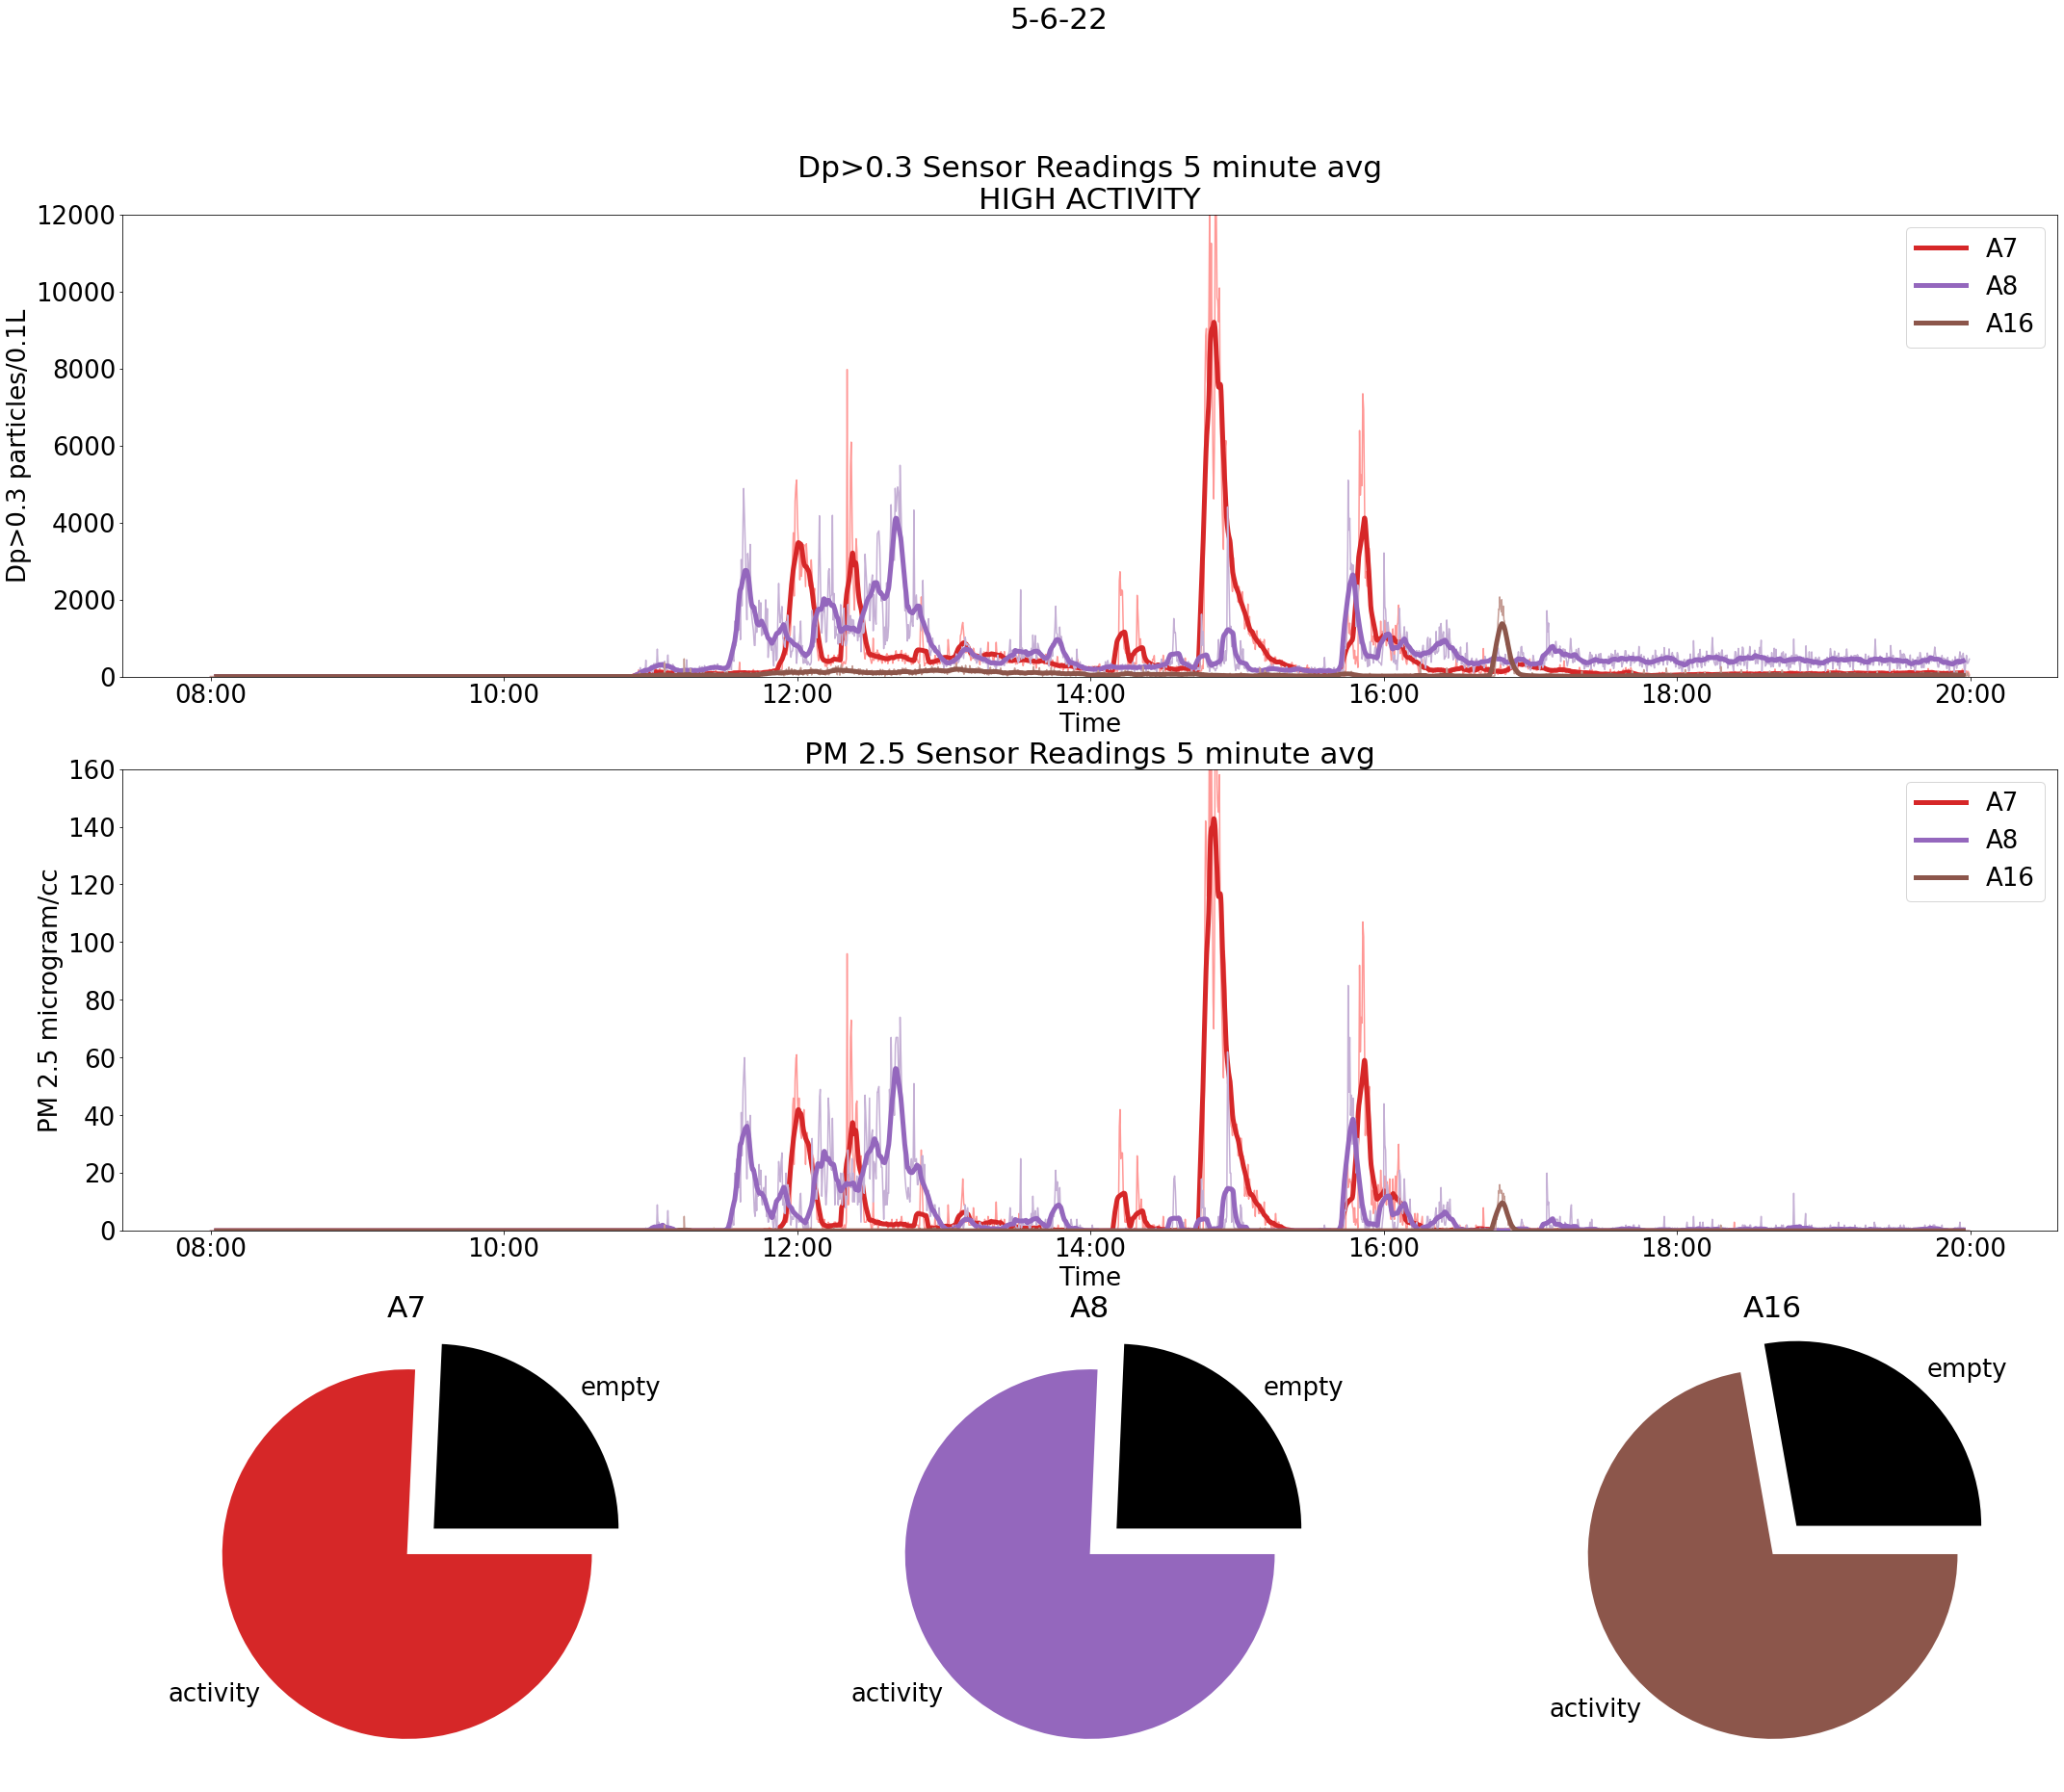

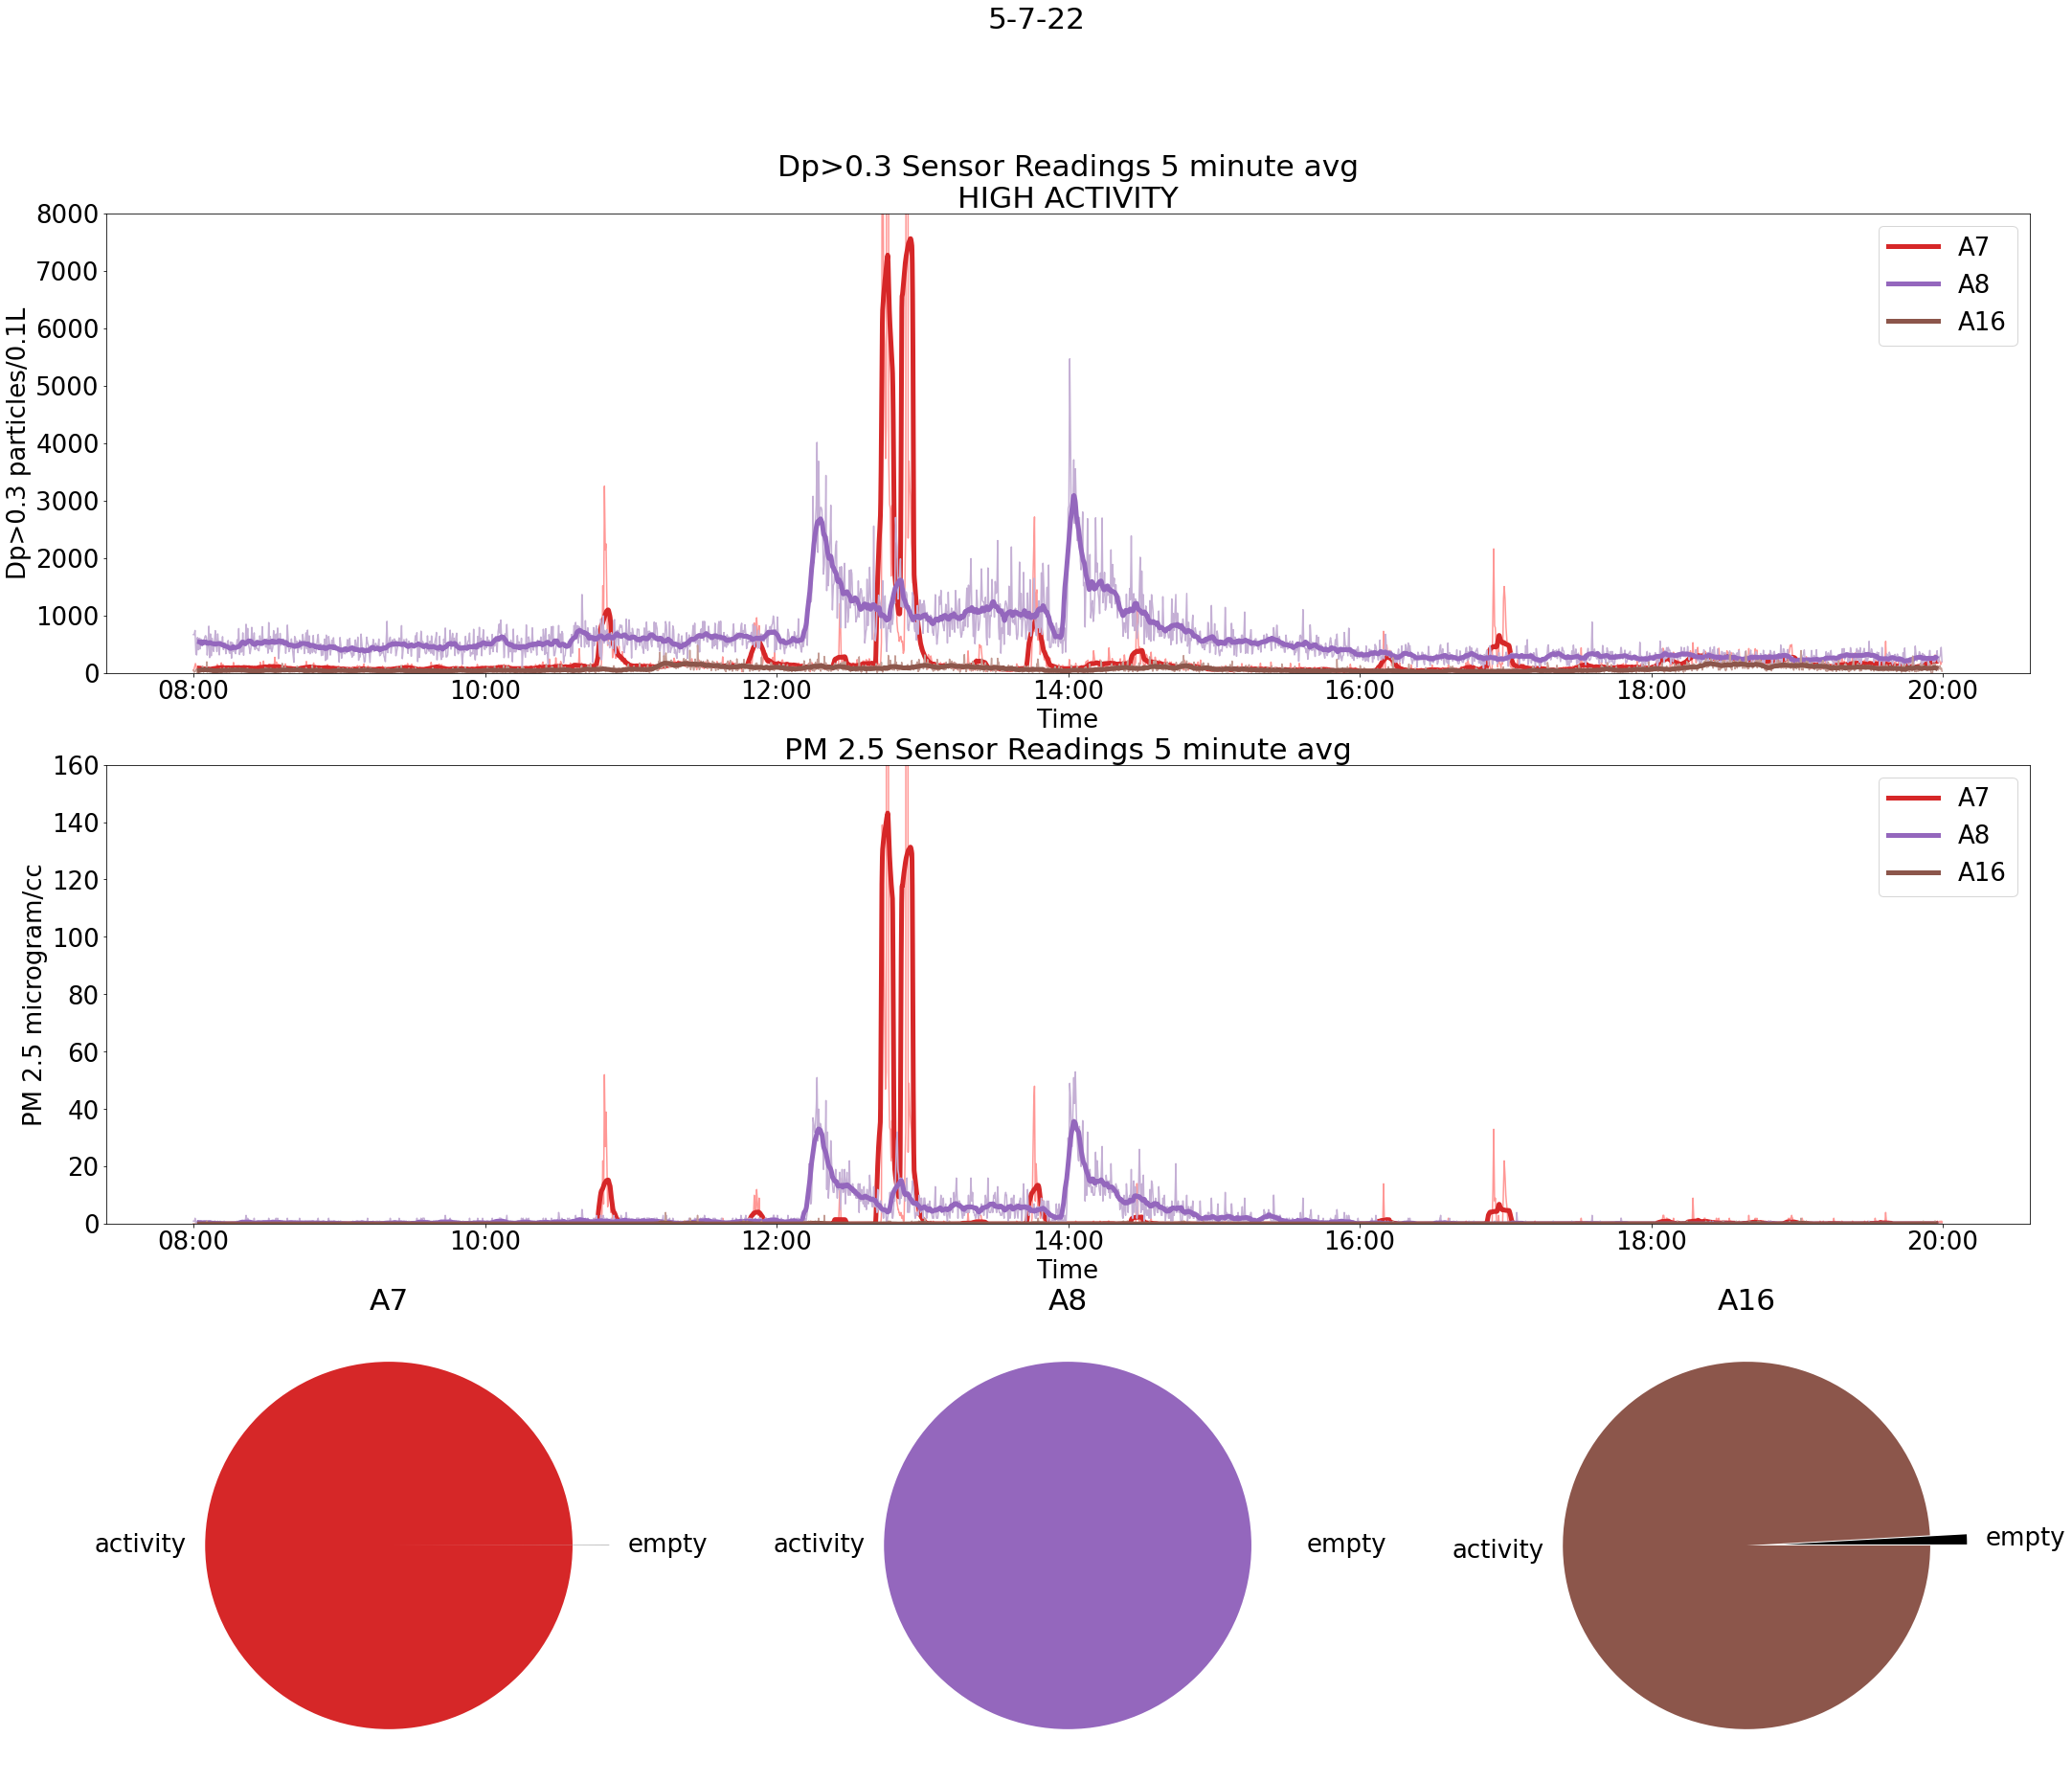

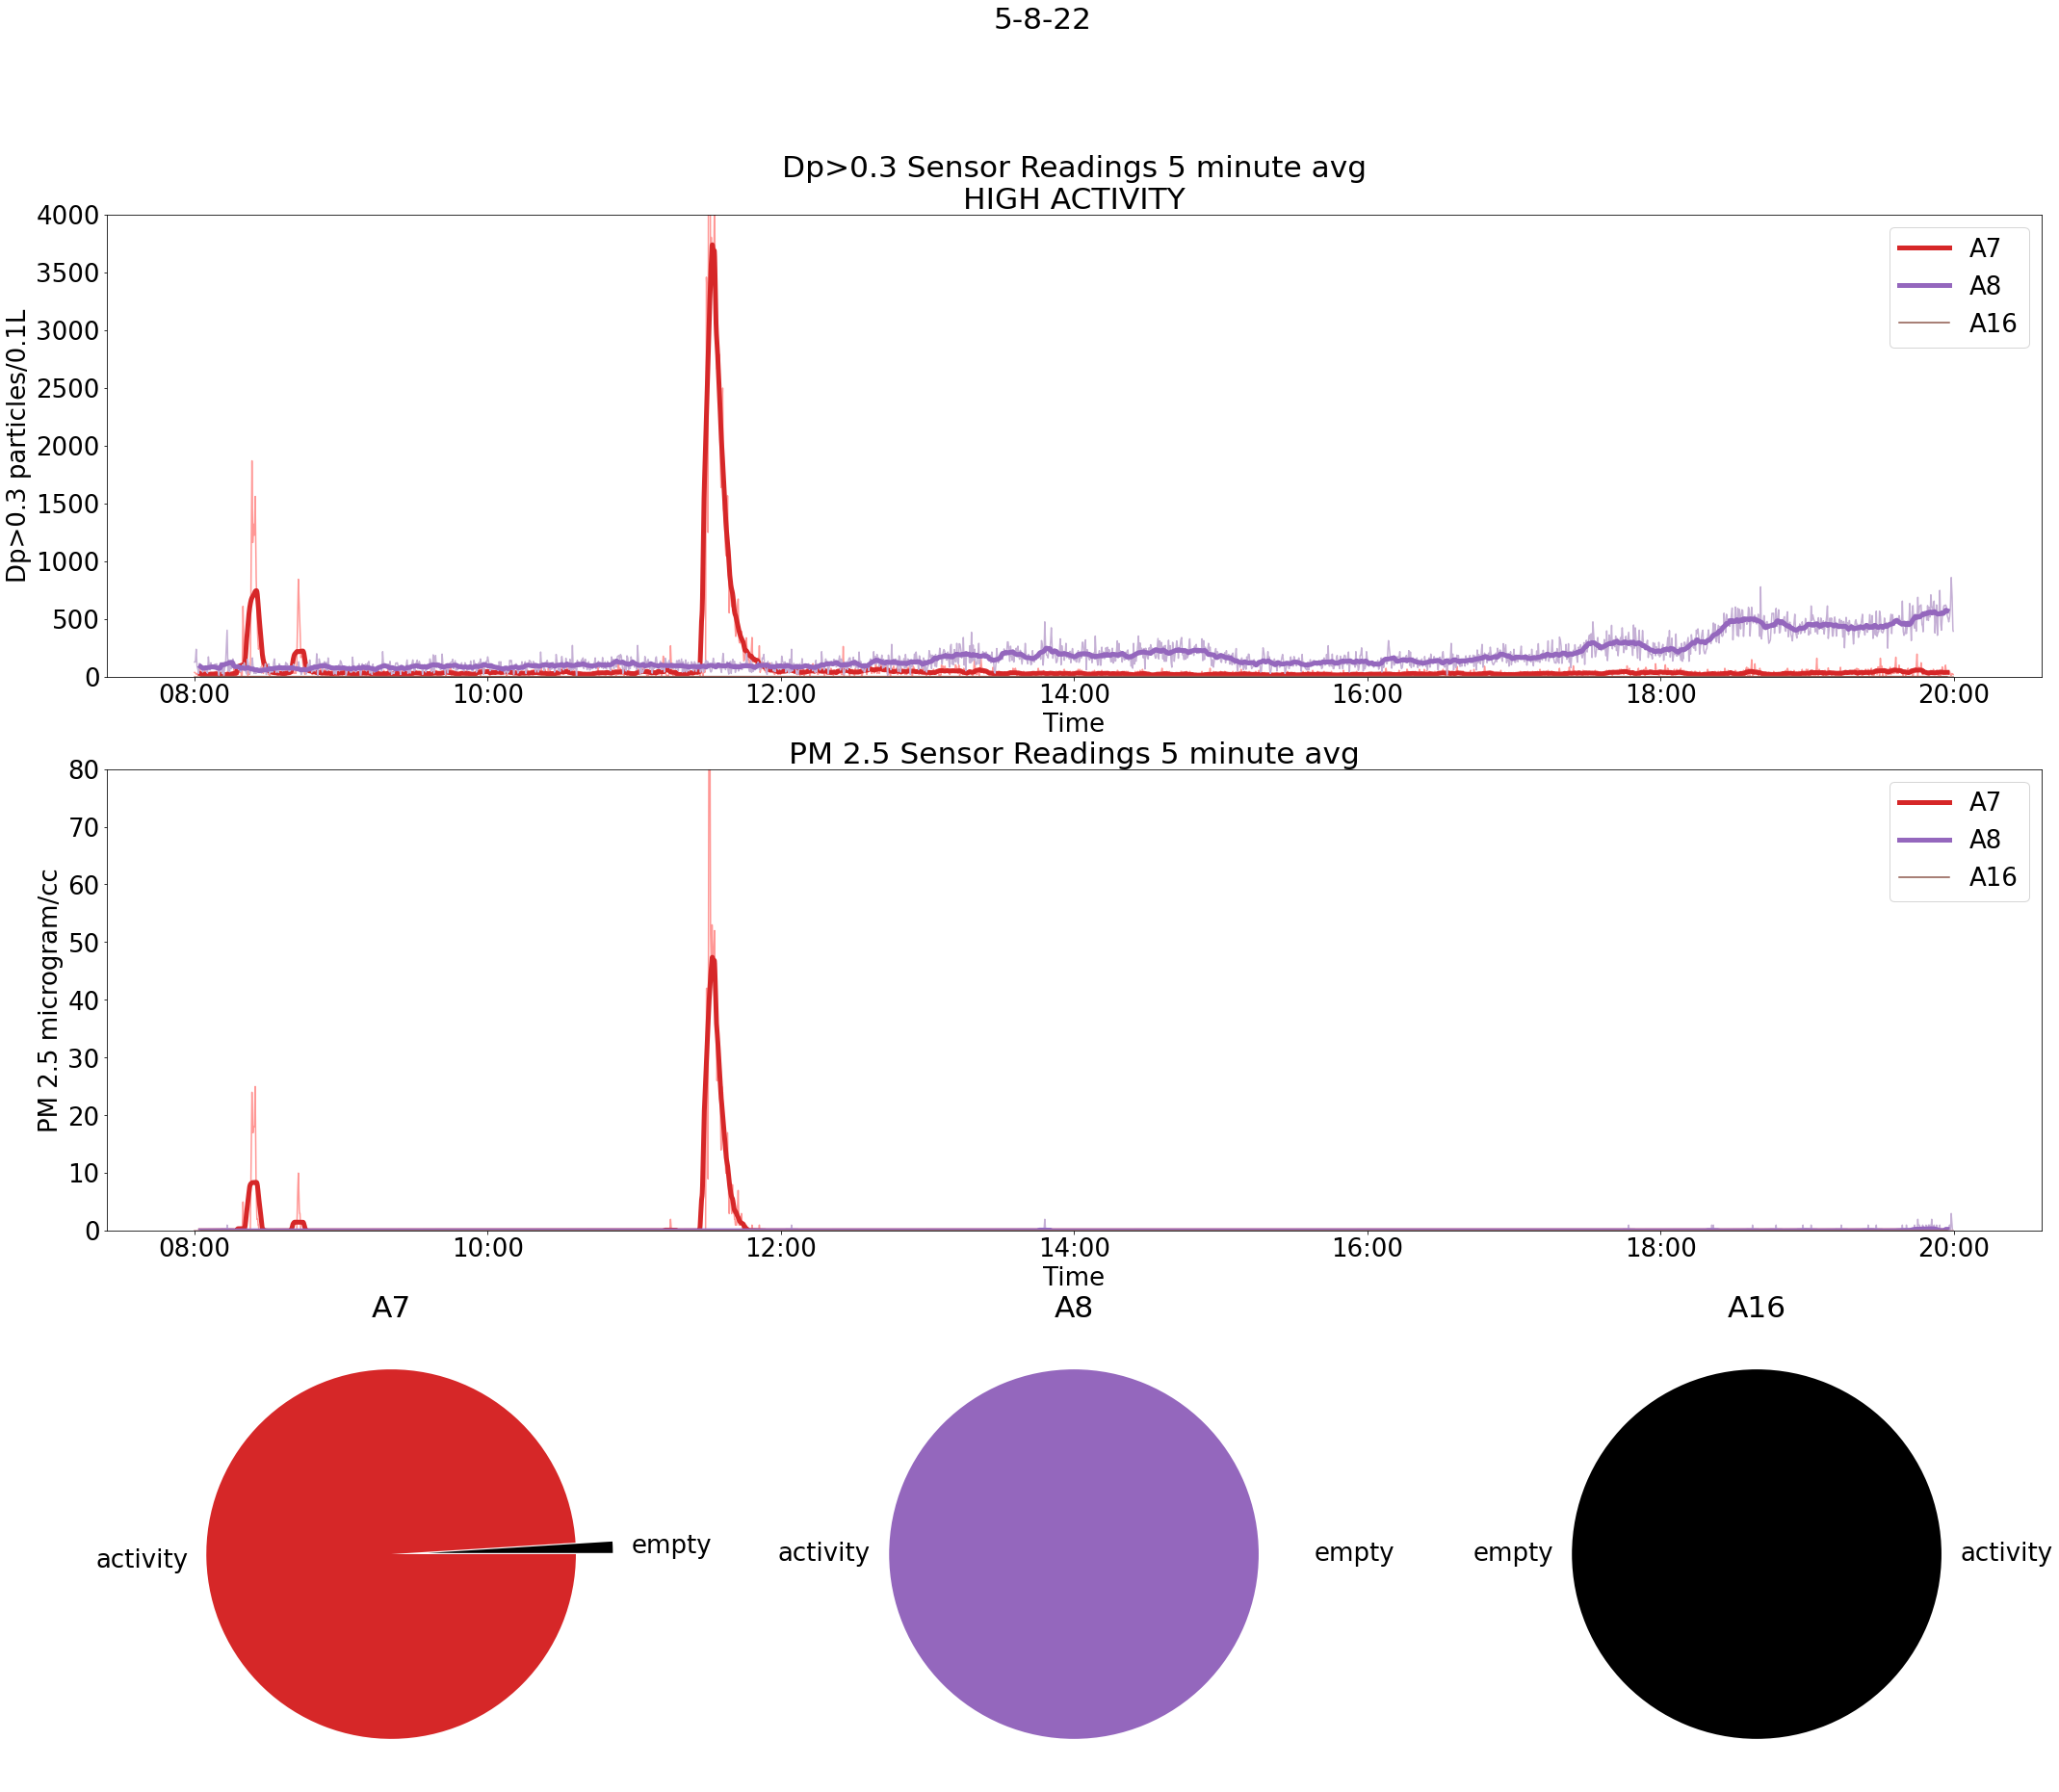

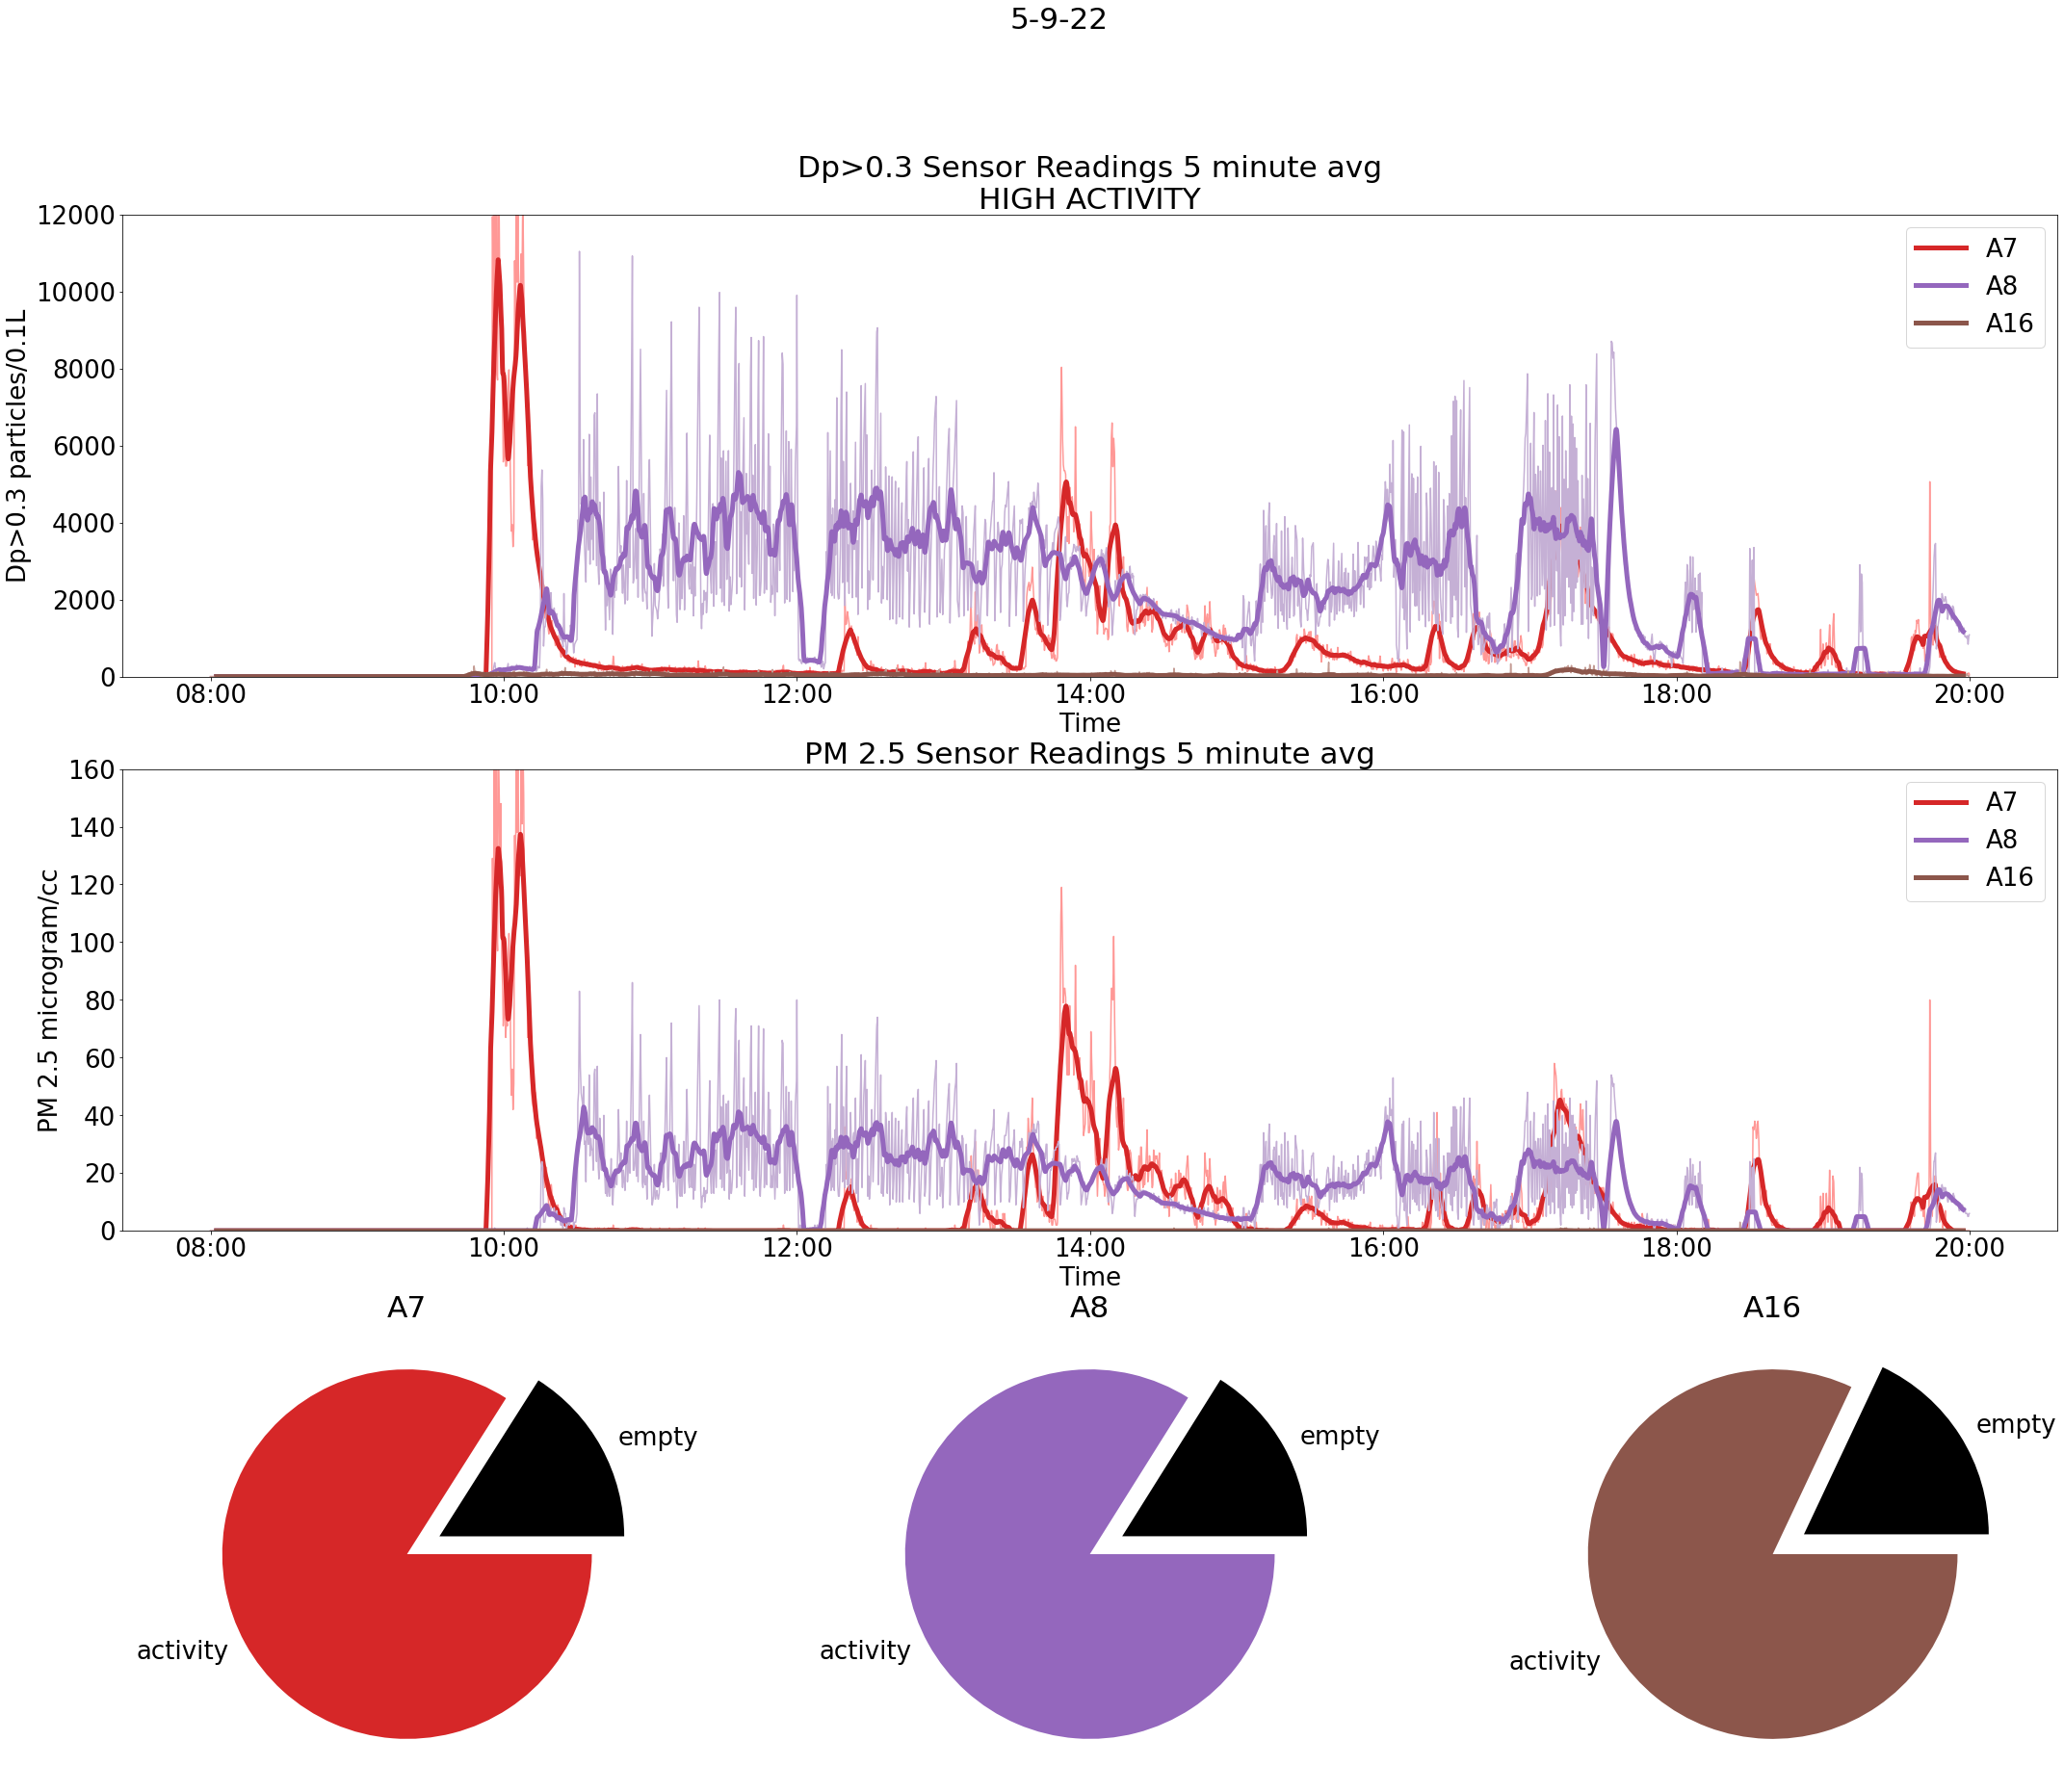

In [28]:
for (pm25name,pm25frame), (dp03name,dp03frame) in zip(mergedDataPM25.items(),mergedDataDp03.items()):
    sensors = ['A7', 'A8', 'A16']
    fig1 = plt.figure(figsize=(36,30))
    ax1= fig1.add_subplot(3,1,1)
    ax11 = fig1.add_subplot(3,1,2)
    ax2= fig1.add_subplot(3,3,7)
    ax3= fig1.add_subplot(3,3,8)
    ax4= fig1.add_subplot(3,3,9)
    ax = [ax1,ax11,ax2,ax3,ax4]
    myFmt = mdates.DateFormatter('%H:%M')
    ax[0].xaxis.set_major_formatter(myFmt)
    ax[1].xaxis.set_major_formatter(myFmt)

    newdp03frame = dp03frame.set_index("Date_Time").rolling(60*5, center = True).mean().dropna()
    dp03frame = dp03frame.set_index("Date_Time")

    newpm25frame = pm25frame.set_index("Date_Time").rolling(60*5, center = True).mean().dropna()
    pm25frame = pm25frame.set_index("Date_Time")

    dp_max = newdp03frame.max()
    pm_max = newpm25frame.max()

    dp_max = max(dp_max[:len(dp_max)-2])
    pm_max = max(pm_max[:len(pm_max)-2])

    if (dp_max > 4000) or (pm_max > 40):
        high_activity = "\nHIGH ACTIVITY"
        colorOffset = 6
    else:
        high_activity = ""
        colorOffset = 0


    for i, column in enumerate(sensors):
        try:
            emptyPercent = round(sum([1 if i == 0 else 0 for i in dp03frame[column]])/len(dp03frame[column])*100,2)
            ax[0].plot(dp03frame.index,dp03frame[column],color = color[i*2+1+colorOffset])
            ax[0].plot(newdp03frame.index,newdp03frame[column],color = color[i*2+colorOffset], linewidth = 5,label = f"{column}")
            ax[1].plot(pm25frame.index,pm25frame[column],color = color[i*2+1+colorOffset])
            ax[1].plot(newpm25frame.index,newpm25frame[column],color = color[i*2+colorOffset], linewidth = 5,label = f"{column}")
            ax[i+2].pie([emptyPercent,100-emptyPercent],colors = ["black",color[i*2+colorOffset]],labels = ["empty","activity"], explode = [0.2,0])
            ax[i+2].set(title = column)
        except:
            ax[0].plot(dp03frame.index,[0]*len(dp03frame),'-',color = color[i*2+1+colorOffset])
            ax[0].plot(newdp03frame.index,[0]*len(newdp03frame),'-',color = color[i*2+colorOffset],label = f"{column}")
            ax[1].plot(pm25frame.index,[0]*len(pm25frame),'-',color = color[i*2+1+colorOffset])
            ax[1].plot(newpm25frame.index,[0]*len(newpm25frame),'-',color = color[i*2+colorOffset],label = f"{column}")
            ax[i+2].pie([100,0],colors = ["black",color[i*2+colorOffset]],labels = ["empty","activity"])
            ax[i+2].set(title = column)

    ax[0].legend()
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel('Dp>0.3 particles/0.1L')
    ax[0].set_ylim([0,4000*math.ceil(dp_max/4000)])
    ax[0].set(title= f"Dp>0.3 Sensor Readings 5 minute avg{high_activity}")
    ax[1].legend()
    ax[1].set_xlabel("Time")
    ax[1].set_ylabel('PM 2.5 microgram/cc')
    ax[1].set_ylim([0,40*math.ceil(pm_max/40)])
    ax[1].set(title= f"PM 2.5 Sensor Readings 5 minute avg")
    plt.suptitle(f"{dp03name.replace('_','-')}")

    imagePath = os.path.join("..","..","Graphs, Images, and Animations")
    if not os.path.exists(imagePath):
        os.mkdir(imagePath)
    plt.savefig(os.path.join(imagePath,f"activity_{dp03name}.jpg"))


# Calculate the "decay frame" 
the decay frame is a frame of the slopes of the rolling average. This takes about 20 seconds per day

In [178]:
def calc_slope(x):
    slope = np.polyfit(range(len(x)), x, 1)[0]
    return slope

In [179]:
decayFrame = {}
for dp03name,dp03frame in mergedDataDp03.items():
    decayFrame[dp03name] = dp03frame.set_index("Date_Time").rolling(60*5, min_periods=2).apply(calc_slope)[4::5]
decayFrame


{'4-13-22':                           A16   A7   A8   Average  Variance
 Date_Time                                                  
 2022-04-13 08:00:04  0.000000  0.0  0.0  0.000000  0.000000
 2022-04-13 08:00:09  0.000000  0.0  0.0  0.000000  0.000000
 2022-04-13 08:00:14  0.000000  0.0  0.0  0.000000  0.000000
 2022-04-13 08:00:19  0.000000  0.0  0.0  0.000000  0.000000
 2022-04-13 08:00:24  0.000000  0.0  0.0  0.000000  0.000000
 ...                       ...  ...  ...       ...       ...
 2022-04-13 19:59:29 -0.069566  0.0  0.0 -0.023189 -3.748526
 2022-04-13 19:59:34 -0.071505  0.0  0.0 -0.023835 -3.962509
 2022-04-13 19:59:39 -0.084284  0.0  0.0 -0.028095 -4.608296
 2022-04-13 19:59:44 -0.099567  0.0  0.0 -0.033189 -5.343253
 2022-04-13 19:59:49 -0.104709  0.0  0.0 -0.034903 -5.648273
 
 [8638 rows x 5 columns],
 '4-14-22':                           A16        A8   Average     Variance
 Date_Time                                                     
 2022-04-14 08:00:04  0.00000

In [139]:
# data_frame[str(index)]
for name,frame in decayFrame.items():
    print(name,frame.max(),sep='\n')

4-13-22
A16          0.574114
A7           0.313385
A8           0.216462
Average      0.191371
Variance    32.413784
dtype: float64
4-14-22
A16             0.951849
A8             20.511263
Average        10.304117
Variance    19308.535328
dtype: float64
4-15-22
A16             1.005284
A7              9.679977
A8             15.293450
Average         4.959944
Variance    12462.390142
dtype: float64
4-18-22
A16             1.956230
A7             16.628596
A8              8.516008
Average         5.450777
Variance    11051.197212
dtype: float64
4-19-22
A16          0.655696
A7           0.618267
A8           0.288325
Average      0.240861
Variance    67.043714
dtype: float64
4-20-22
A16         4.480036
Average     4.480036
Variance    0.000000
dtype: float64
4-21-22
A16            1.229960
A8             6.230038
Average        3.115019
Variance    4156.842588
dtype: float64
4-22-22
A16              2.200728
A7               3.428987
A8              48.996251
Average         16.34402

In [1]:
mergedDataDp03['4-13-22']

NameError: name 'mergedDataDp03' is not defined

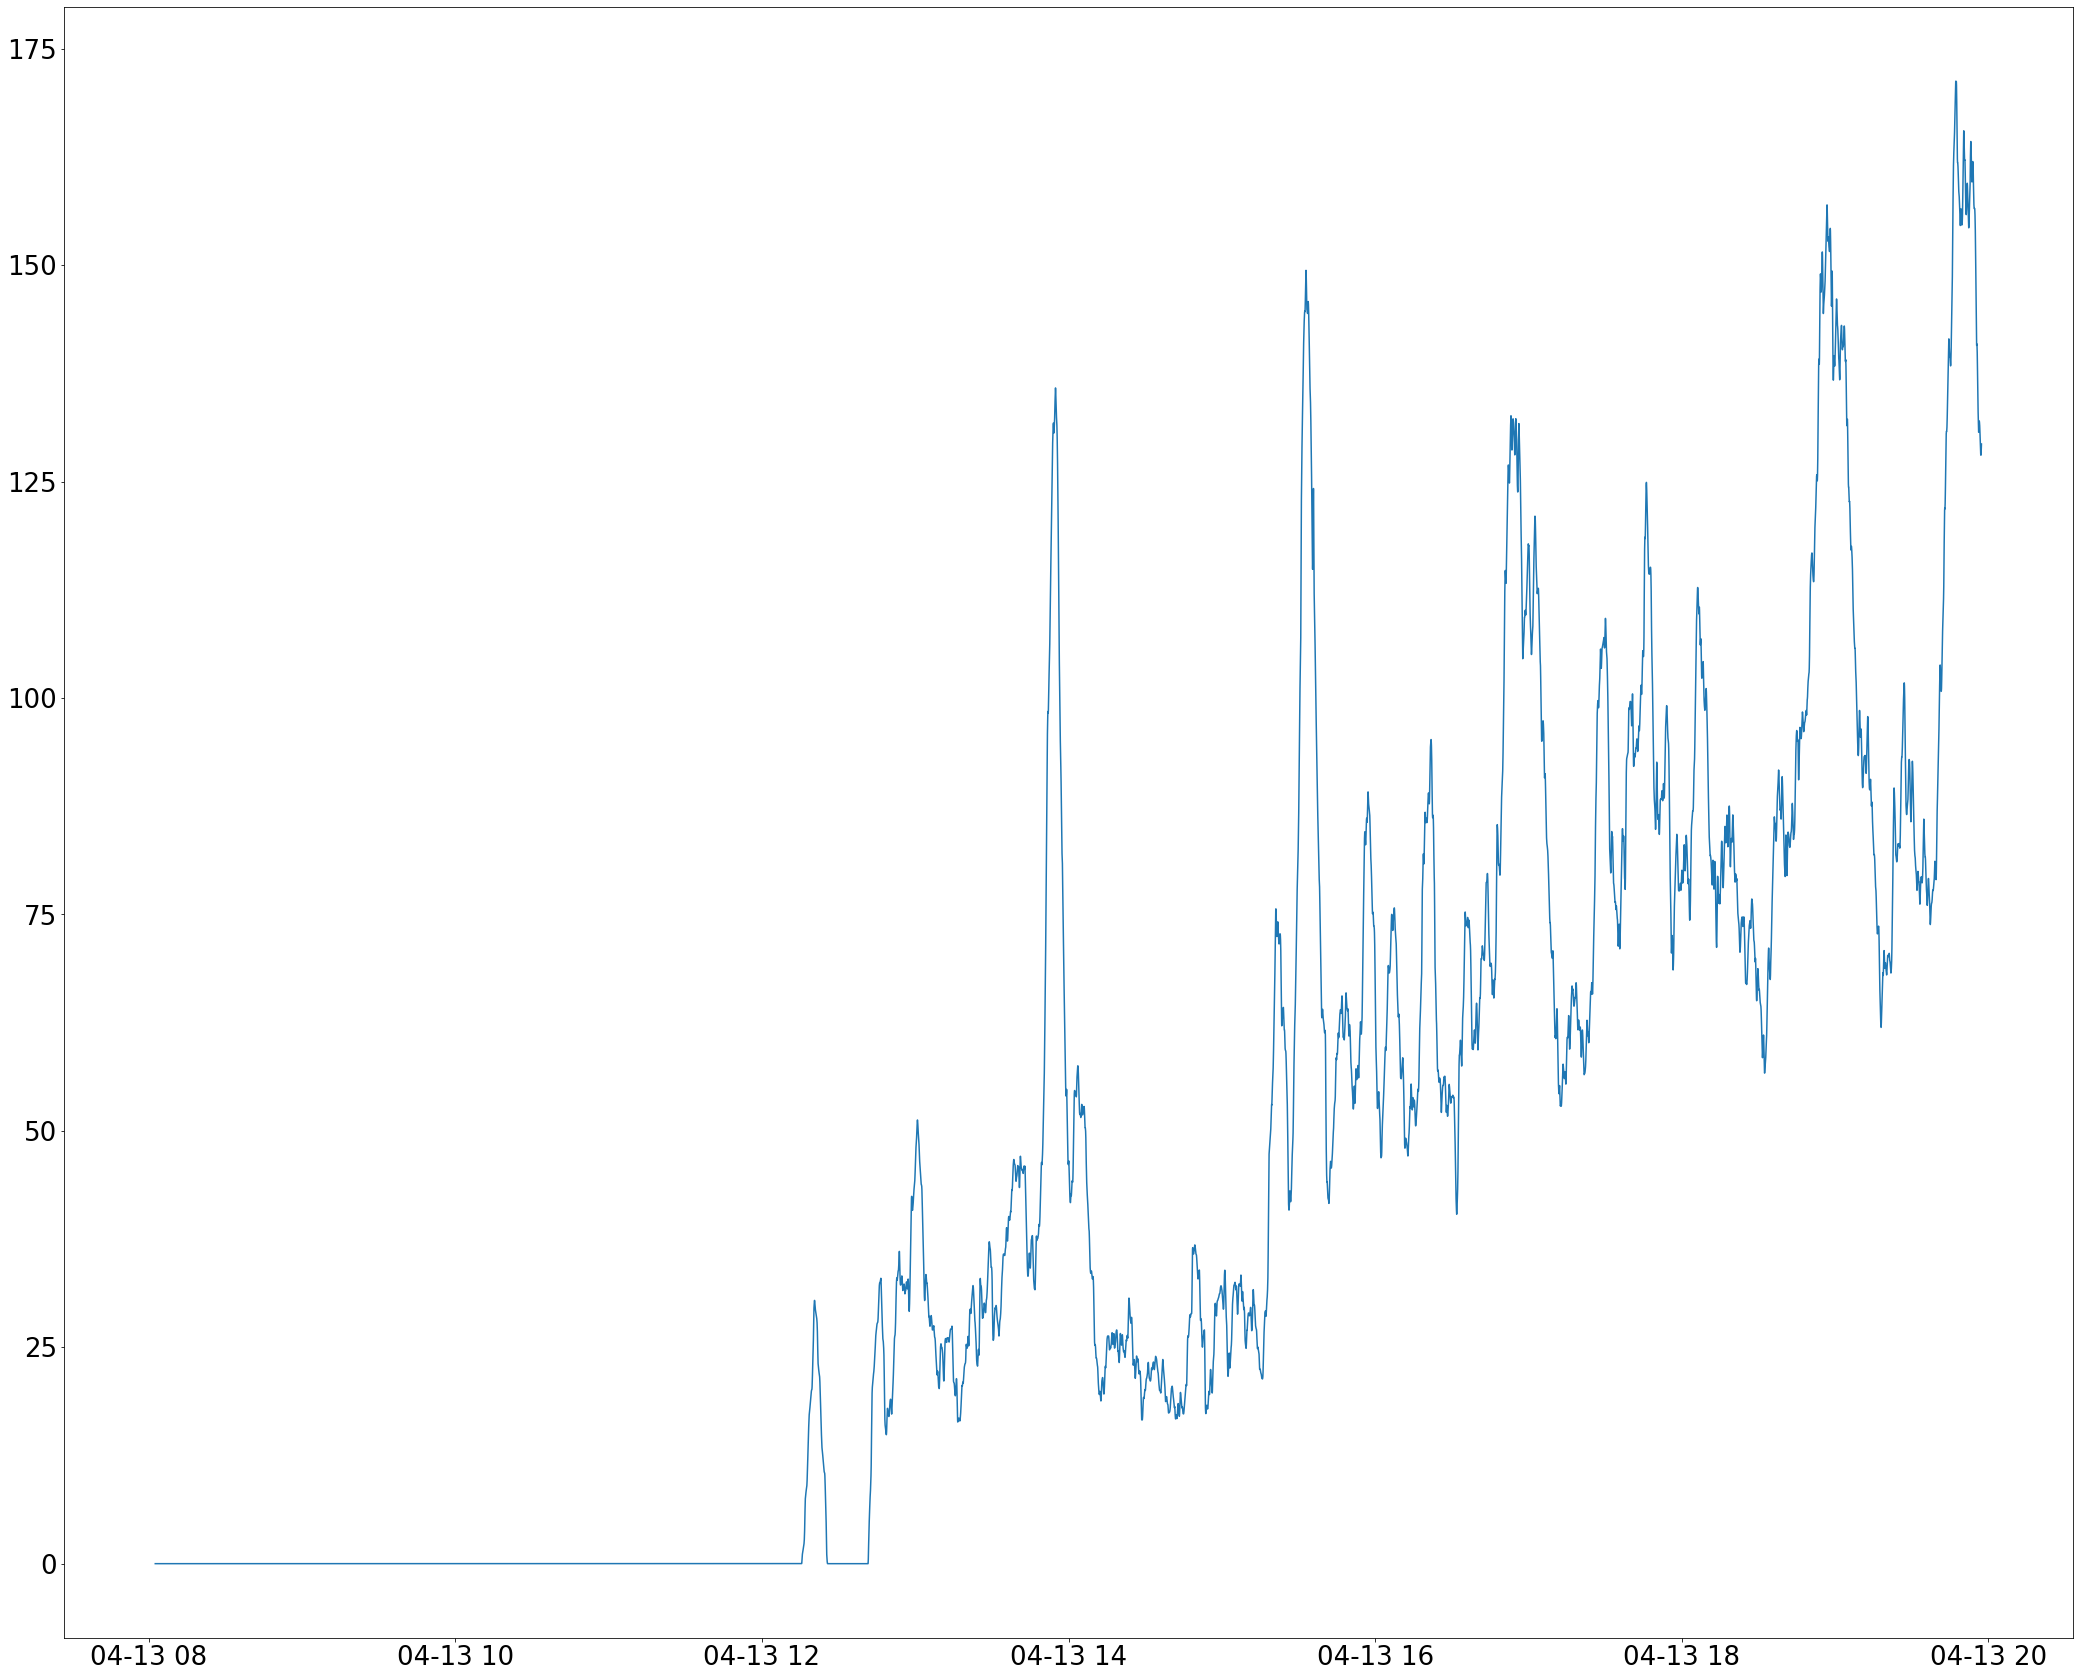

In [130]:
fig1 = plt.figure(figsize=(36,30))
data_frame = mergedDataDp03['4-13-22'].set_index("Date_Time").rolling(60*5, center = True).mean().dropna()
decay_frame = decayFrame['4-13-22']['A16'][decayFrame['4-13-22']['A16'] > 10]
for index, slope in decay_frame.items():
    x = np.linspace(1,-1,301)
    y = slope*x + data_frame['A16'].loc[index]
    x_indexes = pd.date_range(start = index - pd.Timedelta(seconds = 60*2.5),
                                   end   = index + pd.Timedelta(seconds = 60*2.5),
                                   freq  = '1S')
    plt.plot(x_indexes, y)
plt.plot(data_frame.index, data_frame['A16'])

In [82]:
decayFrame['4-13-22']['A16'][decayFrame['4-13-22']['A16'] > 20]

Date_Time
2022-04-13 15:33:29    35.4
2022-04-13 15:38:09    29.1
2022-04-13 16:20:49    26.1
2022-04-13 17:47:49    22.2
2022-04-13 18:43:09    22.2
2022-04-13 18:56:29    35.4
Name: A16, dtype: float64